In [1]:
from _config import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.manifold import TSNE

-------------------------------------------------
----- Environment variables from .env file: -----
-------------------------------------------------
-------------------------------------------------


In [2]:
df = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\discharge_table_complete_seasons.csv', index_col=0, parse_dates=True)
complete_seasons = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\complete_seasons.csv', index_col=0, dtype=str)

display(df.head())
display(df.info())

10000009  10000010  10000011  10000014  10000016  10000017  \
2001-01-01  1.002974  0.756018  0.649853  0.962598  0.625556       NaN   
2001-01-02  1.426323  0.899791  0.978229  1.186935  0.983393       NaN   
2001-01-03  2.759233  1.304584  1.882787  1.893259  1.558488       NaN   
2001-01-04  2.321638  1.142382  1.593618  1.661372  1.010999       NaN   
2001-01-05  2.050273  1.142149  1.865694  1.517573  1.099160       NaN   

            1000102  1000219  1000228  1000315  ...  9000173  9000293  \
2001-01-01      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-02      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-03      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-04      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-05      NaN      NaN      NaN      NaN  ...      NaN      NaN   

            9000451  9001110  season  season_year  22000047  24000034  \
2001-01-01      NaN      NaN       4         2000  0.841516       NaN   
2001-01-02      NaN      NaN       4         2000  0.952326       NaN   
2001-01-03      NaN      NaN       4         2000  0.986051       NaN   
2001-01-04      NaN      NaN       4         2000  0.896118       NaN   
2001-01-05      NaN      NaN       4         2000  0.891301       NaN   

            25000592  26000084  
2001-01-01       NaN       NaN  
2001-01-02       NaN       NaN  
2001-01-03       NaN       NaN  
2001-01-04       NaN       NaN  
2001-01-05       NaN       NaN  

[5 rows x 572 columns]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8035 entries, 2001-01-01 to 2022-12-31
Columns: 572 entries, 10000009 to 26000084
dtypes: float64(570), int64(2)
memory usage: 35.1 MB


None

### Start with Spring (1)

In [ ]:
#Start with spring and work our way down to winter
season = 1
season_year = 2022
season_key = f"{season_year}_{season}" 
cids = complete_seasons.loc[season_key].dropna().values
season_df = df[(df["season"] == season) & (df["season_year"] == season_year)]
#Sprint(season_df)
#print((season_df).columns)
season_df = season_df[cids]
display(season_df.info())
season_df.to_csv("season_df.csv", index = True)
print(season_df)
print("season_df.csv")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 92 entries, 2022-03-01 to 2022-05-31
Columns: 347 entries, 10000009 to 9000451
dtypes: float64(347)
memory usage: 250.1 KB


None

            10000009  10000010  10000011  10000014  10000016  10000017  \
2022-03-01  1.115454  0.984012  0.882743  1.165024  0.712393  0.818439   
2022-03-02  1.085123  0.964011  0.823391  1.123501  0.694165  0.795471   
2022-03-03  1.047531  0.951134  0.783915  1.085320  0.689516  0.789613   
2022-03-04  0.994452  0.926964  0.743141  1.037464  0.662037  0.754989   
2022-03-05  0.959065  0.907446  0.770558  1.006291  0.646855  0.735861   
...              ...       ...       ...       ...       ...       ...   
2022-05-27  0.708217  0.497653  0.216485  0.721023  0.422859  0.453627   
2022-05-28  0.683462  0.472489  0.202464  0.690948  0.408763  0.435867   
2022-05-29  0.651924  0.465047  0.198825  0.669980  0.393936  0.417185   
2022-05-30  0.638727  0.463079  0.190554  0.658647  0.381368  0.401350   
2022-05-31  0.635491  0.446441  0.190047  0.659012  0.379105  0.398497   

             1000102   1000315  11000011  11000016  ...  66000034  67000017  \
2022-03-01  0.874886  0.866100  

In [4]:
# #redo of csv 

# #Starting with spring (1)

# season = 1
# season_year = 2022
# season_key = f"{season_year}_{season}"
# #loading the selected feature columns for this season
# cids = complete_seasons.loc[season_key].dropna().values
# #filtering rows for the correct season and year
# season_df = df[(df["season"] == season) & (df["season_year"] == season_year)]
# #my date was DatetimeIndex
# season_df = season_df.reset_index()
# season_df = season_df.rename(columns={"index": "date"})
# #making sure date is preserved
# cols_to_keep = ["date"] + list(cids)
# season_df = season_df[cols_to_keep]
# display(season_df.info())
# season_df.to_csv("season_df.csv", index = False)

# print(season_df)
# print("Saved: season_df.csv")

          2022-03-01  2022-03-02  2022-03-03  2022-03-04  2022-03-05  \
10000009   -0.757164   -0.661627   -0.586025   -0.528645   -0.460077   
10000010   -0.920941   -0.820941   -0.718855   -0.625429   -0.536450   
10000011   -1.047123   -1.005916   -0.949273   -0.889046   -0.738980   
10000014   -0.695399   -0.611144   -0.533954   -0.466962   -0.390205   
10000016   -1.259379   -1.175903   -1.079351   -1.005356   -0.922003   
...              ...         ...         ...         ...         ...   
8000001    -0.087972   -0.088026   -0.069337   -0.073242   -0.079175   
9000015     0.388600    0.622407    0.683905    0.816061    0.977639   
9000172    -0.783776   -0.716462   -0.655099   -0.599118   -0.535789   
9000293     0.104563    0.165150    0.196009    0.227492    0.312976   
9000451    -0.484368   -0.604002   -0.578919   -0.245251   -0.369896   

          2022-03-06  2022-03-07  2022-03-08  2022-03-09  2022-03-10  ...  \
10000009   -0.407214   -0.356000   -0.296307   -0.245342  

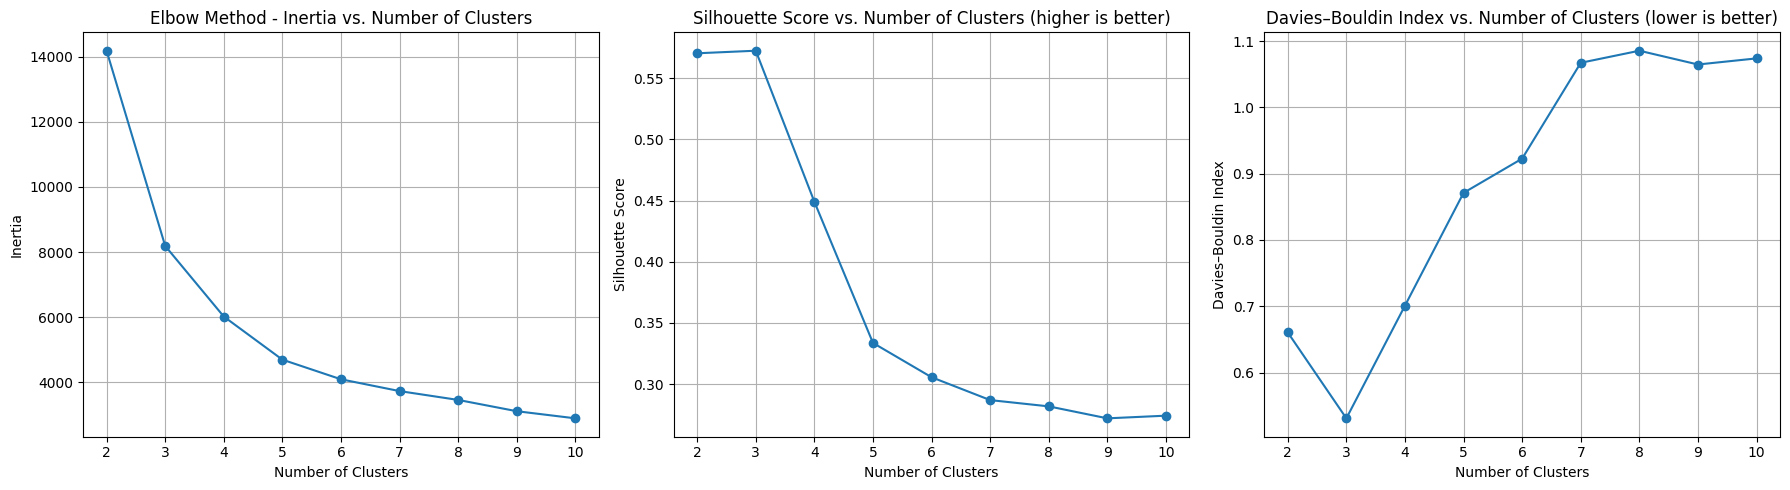

In [5]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
#import numpy as np

# Transpose the data to have catchments as rows and days as features
data = season_df.T.copy()
#print("data is: " + {data})
# Normalize each catchment's time series
# scaler = StandardScaler()
# data_scaled = scaler.fit_transform(data)
data_scaled = (data - data.mean()) / data.std(ddof=0)
print(data_scaled)
# Try different numbers of clusters and calculate the inertia, silhouette, and Davies–Bouldin
inertias = []
silhouette_scores = []
dbi_scores = []  # Davies–Bouldin Index
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, labels))
    dbi_scores.append(davies_bouldin_score(data_scaled, labels))

# Plot elbow method (inertia)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot elbow method (inertia)
axes[0].plot(cluster_range, inertias, marker='o')
axes[0].set_title('Elbow Method - Inertia vs. Number of Clusters')
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('Inertia')
axes[0].grid(True)

# Plot silhouette score
axes[1].plot(cluster_range, silhouette_scores, marker='o')
axes[1].set_title('Silhouette Score vs. Number of Clusters (higher is better)')
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('Silhouette Score')
axes[1].grid(True)

# Plot Davies–Bouldin Index
axes[2].plot(cluster_range, dbi_scores, marker='o')
axes[2].set_title('Davies–Bouldin Index vs. Number of Clusters (lower is better)')
axes[2].set_xlabel('Number of Clusters')
axes[2].set_ylabel('Davies–Bouldin Index')
axes[2].grid(True)

plt.tight_layout()
plt.show()

Cluster
10000009        0
10000010        1
10000011        1
10000014        0
10000016        1

            10000009  10000010  10000011  10000014  10000016  10000017  \
2022-03-01  1.115454  0.984012  0.882743  1.165024  0.712393  0.818439   
2022-03-02  1.085123  0.964011  0.823391  1.123501  0.694165  0.795471   
2022-03-03  1.047531  0.951134  0.783915  1.085320  0.689516  0.789613   
2022-03-04  0.994452  0.926964  0.743141  1.037464  0.662037  0.754989   
2022-03-05  0.959065  0.907446  0.770558  1.006291  0.646855  0.735861   
...              ...       ...       ...       ...       ...       ...   
2022-05-27  0.708217  0.497653  0.216485  0.721023  0.422859  0.453627   
2022-05-28  0.683462  0.472489  0.202464  0.690948  0.408763  0.435867   
2022-05-29  0.651924  0.465047  0.198825  0.669980  0.393936  0.417185   
2022-05-30  0.638727  0.463079  0.190554  0.658647  0.381368  0.401350   
2022-05-31  0.635491  0.446441  0.190047  0.659012  0.379105  0.398497   

             1000102   1000315  11000011  11000016  ...  66000034  67000017  \
2022-03-01  0.874886  0.866100  

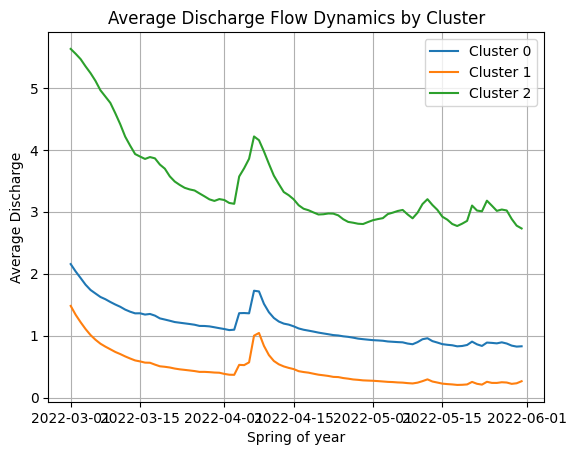

In [6]:
kmeans_final = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_final = kmeans_final.fit_predict(data_scaled)

# Assign cluster labels to each catchment
clustered_data = pd.DataFrame(index=data.index)
clustered_data['Cluster'] = labels_final
# Show the first few rows of the clustered catchments
display(clustered_data.head())

# Prepare for visualization: average discharge pattern per cluster
cluster_means = season_df.T.copy()
print(season_df.copy())
cluster_means['Cluster'] = labels_final
cluster_avg = cluster_means.groupby('Cluster').mean().T

# Plot the average discharge flow over the seaason for each cluster
plt.figure()
for cluster in cluster_avg.columns:
    plt.plot(cluster_avg.index, cluster_avg[cluster], label=f'Cluster {cluster}')
plt.title('Average Discharge Flow Dynamics by Cluster')
plt.xlabel('Spring of year')
plt.ylabel('Average Discharge')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
from pathlib import Path

out_path = Path(r'C:\Users\kscar\Documents\Github\02807_Project\output\season_clustering')
out_path.mkdir(parents=True, exist_ok=True)
pd.DataFrame(labels_final, index=data.index, columns=['Cluster']).to_csv(out_path / f'KMeans_clustering_season_{str(season)}_seasonYear_{str(season_year)}.csv', index=True)
#print(out_path)

In [8]:
df = pd.read_csv("season_df.csv", index_col=0, parse_dates=True)
df

10000009  10000010  10000011  10000014  10000016  10000017  \
2022-03-01  1.115454  0.984012  0.882743  1.165024  0.712393  0.818439   
2022-03-02  1.085123  0.964011  0.823391  1.123501  0.694165  0.795471   
2022-03-03  1.047531  0.951134  0.783915  1.085320  0.689516  0.789613   
2022-03-04  0.994452  0.926964  0.743141  1.037464  0.662037  0.754989   
2022-03-05  0.959065  0.907446  0.770558  1.006291  0.646855  0.735861   
...              ...       ...       ...       ...       ...       ...   
2022-05-27  0.708217  0.497653  0.216485  0.721023  0.422859  0.453627   
2022-05-28  0.683462  0.472489  0.202464  0.690948  0.408763  0.435867   
2022-05-29  0.651924  0.465047  0.198825  0.669980  0.393936  0.417185   
2022-05-30  0.638727  0.463079  0.190554  0.658647  0.381368  0.401350   
2022-05-31  0.635491  0.446441  0.190047  0.659012  0.379105  0.398497   

             1000102   1000315  11000011  11000016  ...  66000034  67000017  \
2022-03-01  0.874886  0.866100  2.578474  1.854215  ...  0.964924  1.331673   
2022-03-02  0.801584  0.802383  2.491169  1.716739  ...  0.870609  1.209226   
2022-03-03  0.751073  0.758478  2.398096  1.610702  ...  0.804119  1.128910   
2022-03-04  0.679297  0.696089  2.297597  1.518069  ...  0.902017  1.022600   
2022-03-05  0.630899  0.654020  2.200620  1.430553  ...  0.743421  0.933484   
...              ...       ...       ...       ...  ...       ...       ...   
2022-05-27  0.163807  0.248012  0.509766  0.602529  ...  0.203195  0.165064   
2022-05-28  0.145434  0.232042  0.527065  0.573393  ...  0.187542  0.127325   
2022-05-29  0.141510  0.228630  0.512652  0.560226  ...  0.177445  0.113193   
2022-05-30  0.134979  0.222954  0.502822  0.548867  ...  0.164519  0.108078   
2022-05-31  0.131483  0.219915  0.496963  0.543505  ...  0.180019  0.100308   

            67000019   7000003   7000333   8000001   9000015   9000172  \
2022-03-01  1.677404  1.771620  0.962073  1.652524  2.035003  1.094096   
2022-03-02  1.399457  1.582589  0.911214  1.521181  2.061259  1.043437   
2022-03-03  1.294621  1.448918  0.862502  1.422500  1.969141  0.997403   
2022-03-04  1.220928  1.302001  0.814004  1.312008  1.932127  0.945310   
2022-03-05  1.140219  1.178161  0.775150  1.216511  1.930799  0.907892   
...              ...       ...       ...       ...       ...       ...   
2022-05-27  0.138430  0.213130  0.310167  0.425342  1.075581  0.547774   
2022-05-28  0.121568  0.189144  0.294411  0.397268  1.153296  0.527484   
2022-05-29  0.117190  0.177530  0.284676  0.384655  1.077444  0.529524   
2022-05-30  0.100039  0.168734  0.278976  0.369296  0.922316  0.514493   
2022-05-31  0.087233  0.163957  0.277355  0.365009  0.878182  0.520251   

             9000293   9000451  
2022-03-01  1.807046  1.334390  
2022-03-02  1.713648  1.128930  
2022-03-03  1.615066  1.052687  
2022-03-04  1.521713  1.192065  
2022-03-05  1.481562  1.020017  
...              ...       ...  
2022-05-27  0.103236  0.264343  
2022-05-28  0.073818  0.248850  
2022-05-29  0.068885  0.237838  
2022-05-30  0.061623  0.230590  
2022-05-31  0.059781  0.229876  

[92 rows x 347 columns]

<Axes: >

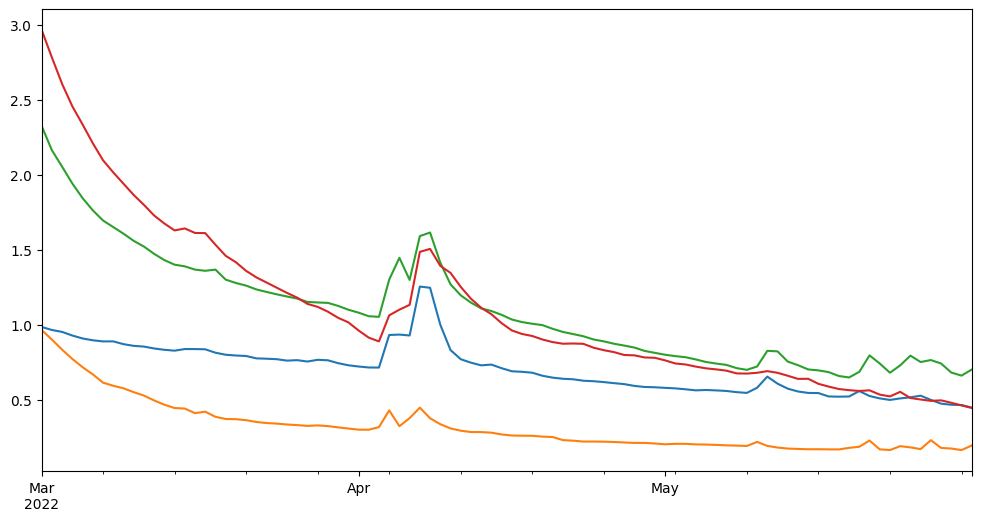

In [9]:
df.T.loc[df.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))


In [10]:
# import pandas as pd
# print(pd.read_csv("season_df.csv").columns)
# #print(season_df) THIS IS WHERE I LOSE THE DATES
# #df = pd.read_csv("season_df.csv", index_col=0, parse_dates=["date"], date_parser=lambda x: pd.to_datetime(x, format="%Y-%m-%d"))
# #df

<Axes: >

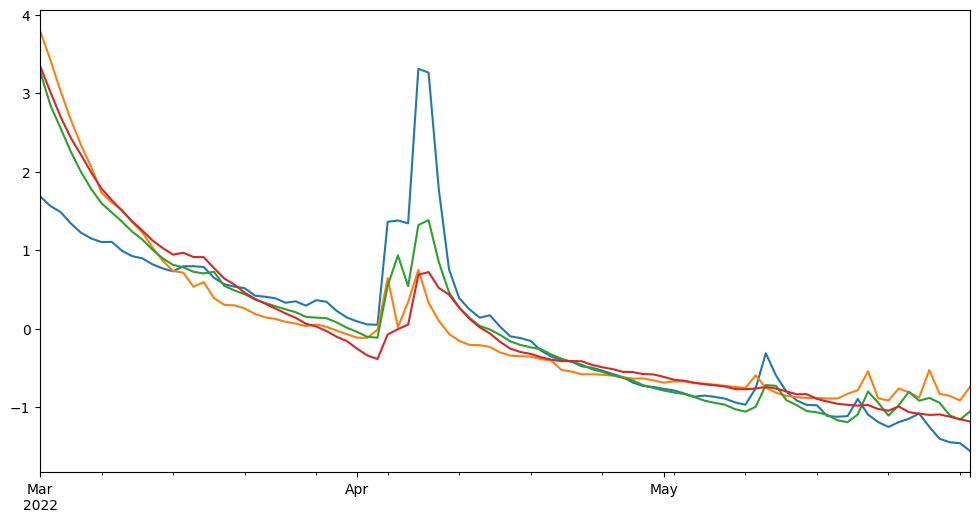

In [11]:
#1st method of scaling
df_scaled = (df-df.mean())/df.std(ddof=0)

#2nd method of scaling
df_scaled.T.loc[df_scaled.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))

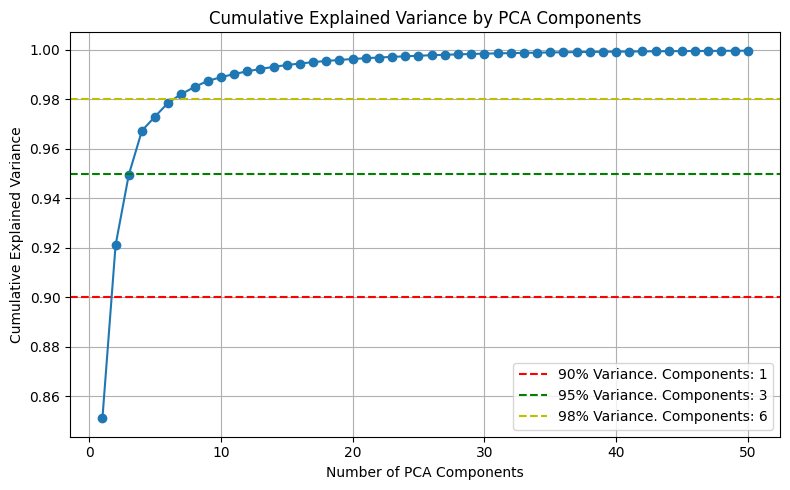

In [12]:
max_components = 50
pca_full = PCA(n_components=max_components) #remember to import PCA 
pca_full.fit(df_scaled)

explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, max_components + 1), cumulative_variance, marker='o')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of PCA Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.axhline(y=0.9, color='r', linestyle='--', label=f'90% Variance. Components: {sum(~(cumulative_variance > 0.90))}')
plt.axhline(y=0.95, color='g', linestyle='--', label=f'95% Variance. Components: {sum(~(cumulative_variance > 0.95))}')
plt.axhline(y=0.98, color='y', linestyle='--', label=f'98% Variance. Components: {sum(~(cumulative_variance > 0.98))}')
plt.legend()
plt.tight_layout()
plt.show()

In [13]:
pca = PCA(n_components=21)
pca_result = pca.fit_transform(df_scaled)
pca_result

array([[ 6.20590306e+01, -7.68289253e+00, -1.02349373e+01, ...,
        -7.07932102e-01, -3.00534853e-01, -7.70375630e-01],
       [ 5.37134914e+01, -7.53358226e+00, -7.25345902e+00, ...,
         2.21946107e-01,  2.22102699e-01,  4.59443063e-01],
       [ 4.66942380e+01, -7.07088448e+00, -5.11696480e+00, ...,
         9.57515777e-01,  3.14538017e-01,  8.87954420e-01],
       ...,
       [-1.65518128e+01, -1.03064276e+00, -2.99006650e+00, ...,
        -3.23000828e-01,  5.69596890e-01,  3.60174521e-01],
       [-1.68037790e+01, -1.06454772e+00, -3.99494790e+00, ...,
         6.17397391e-01,  4.22435418e-01, -4.06249698e-01],
       [-1.51527091e+01,  1.10595025e-01, -5.08888582e+00, ...,
         4.49705892e-02, -4.23559808e-01, -4.31994446e-02]],
      shape=(92, 21))

C:\Users\kscar\AppData\Local\Temp\ipykernel_53928\1787641122.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


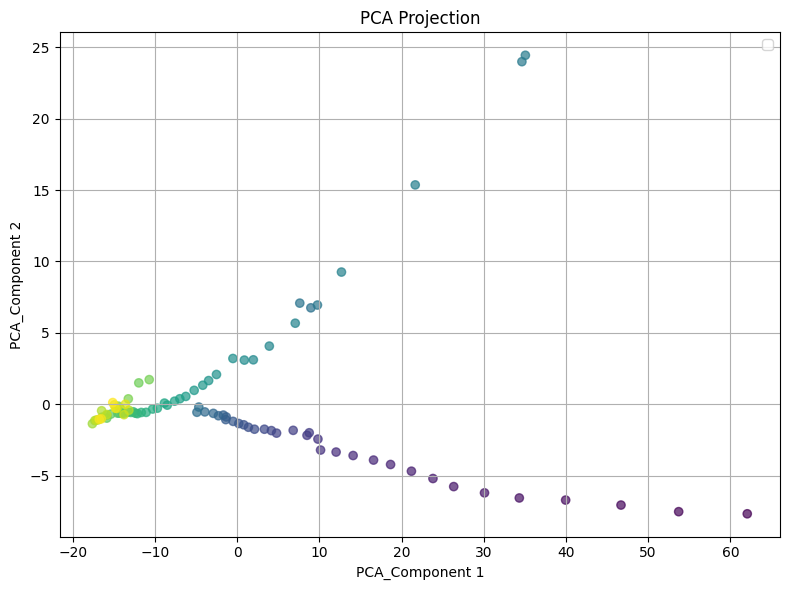

In [14]:
plt.figure(figsize=(8,6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df.index, alpha=0.7)
plt.title("PCA Projection")
plt.xlabel("PCA_Component 1")
plt.ylabel("PCA_Component 2")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


C:\Users\kscar\AppData\Local\Temp\ipykernel_53928\2567467783.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


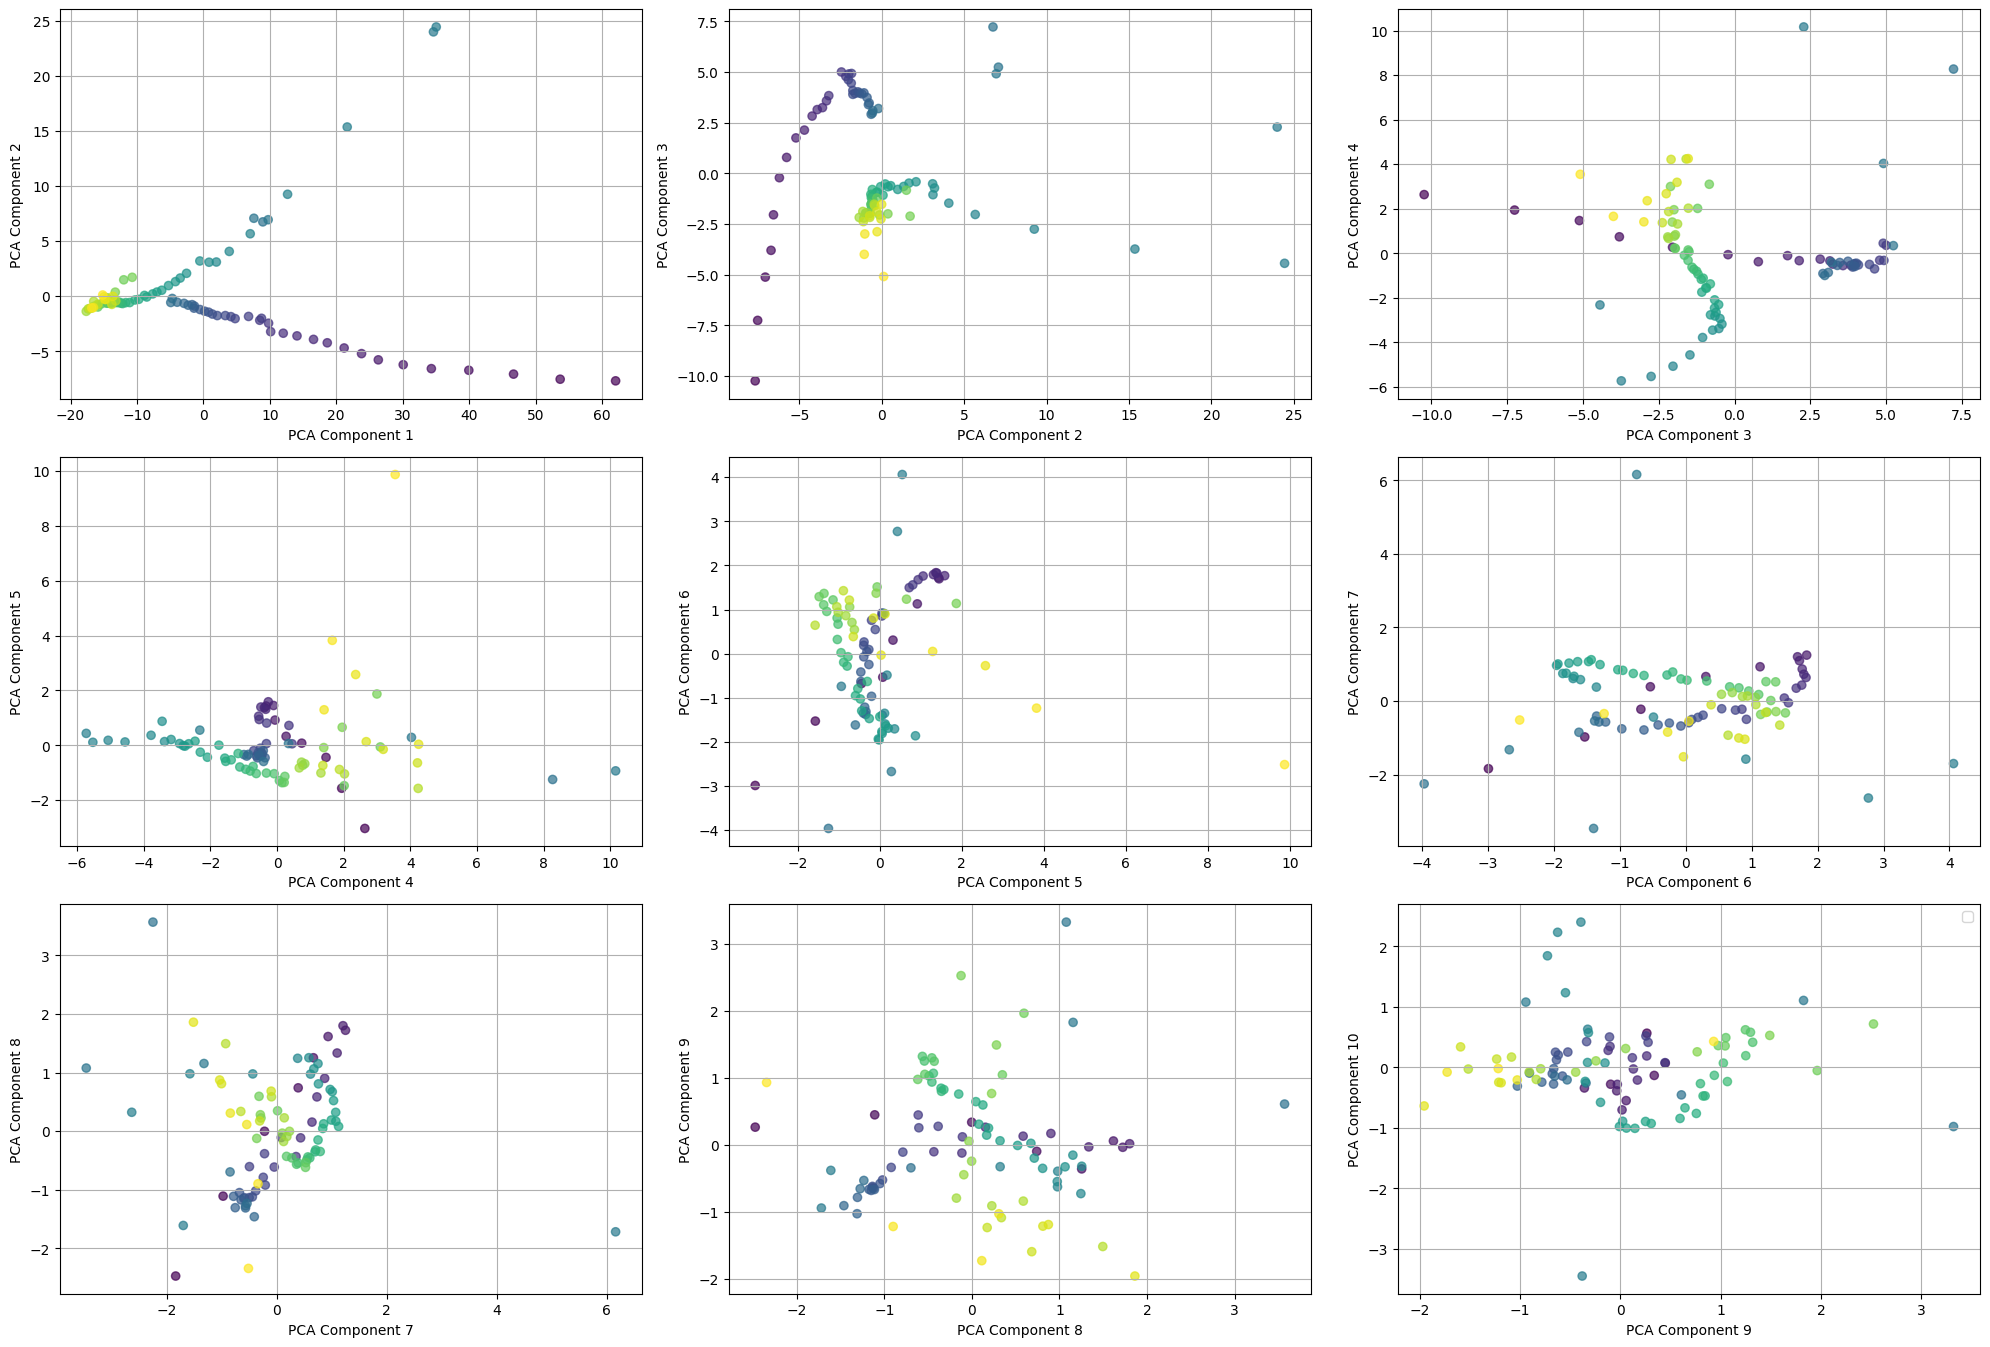

In [15]:
plt.figure(figsize=(20,40))
for i in range(9):
    plt.subplot(9, 3, i+1)
    plt.scatter(pca_result[:, i], pca_result[:, i+1], c=df.index, alpha=0.7)
    plt.xlabel(f"PCA Component {i+1}")
    plt.ylabel(f"PCA Component {i+2}")
    plt.grid(True)
    plt.tight_layout()
plt.legend()
plt.show()

In [16]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_result)

kmeans_silhouette = silhouette_score(pca_result, kmeans_labels)
kmeans_db_index = davies_bouldin_score(pca_result, kmeans_labels)
print(f"KMeans Silhouette Score is {kmeans_silhouette:.3f}")
print(f"KMeans Davies-Bouldin Index is {kmeans_db_index:.3f}")

KMeans Silhouette Score is 0.482
KMeans Davies-Bouldin Index is 0.857


<Axes: xlabel='k'>

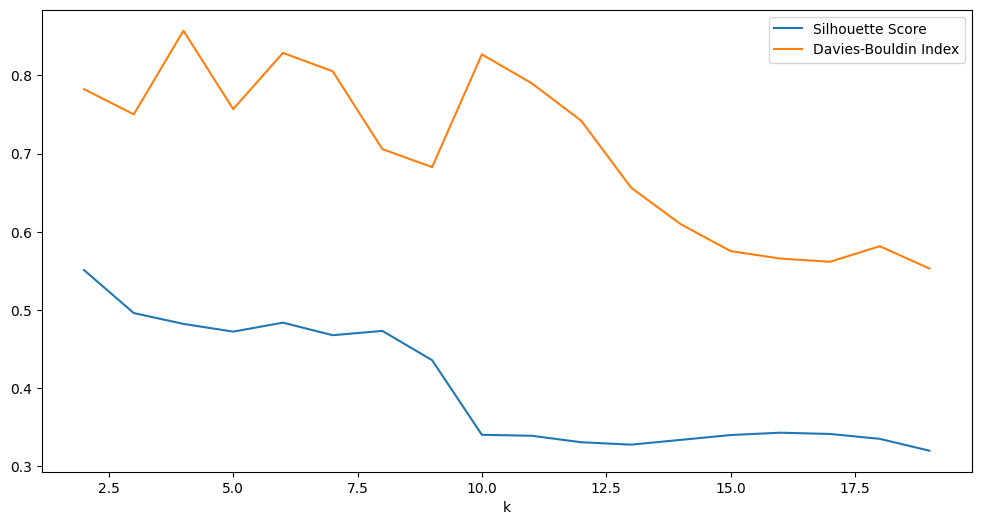

In [17]:
eval_results=[]

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(pca_result)

    db_index = davies_bouldin_score(pca_result, labels)
    silhouette = silhouette_score(pca_result, labels)

    eval_results.append({"k": k, "Silhouette Score":  silhouette, "Davies-Bouldin Index": db_index})
eval_df = pd.DataFrame(eval_results)
eval_df.plot(x="k", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.50            3         0     92               NaN   
1    0.76            3         2     86         -0.251049   
2    1.01            3         4     76         -0.374835   
3    1.27            3         6     55         -0.103639   
4    1.52            3         4     47         -0.000265   
5    1.78            3         3     46         -0.023252   
6    2.03            3         3     41          0.046254   
7    2.29            3         4     37          0.058309   
8    2.54            3         3     34          0.144612   
9    2.80            3         3     26          0.186367   
10   3.05            3         3     25          0.177326   
11   3.31            3         2     22          0.268583   
12   3.56            3         2     21          0.283632   
13   3.82            3         2     16          0.366851   
14   4.07            3         2     14          0.380934   
15   4.33            3         2     14          0.380934   
16   4.58            3         2     13          0.380331   
17   4.84            3         2     13          0.380331   
18   5.09            3         2     13          0.380331   
19   5.35            3         2     13          0.380331   
20   5.60            3         1     12               NaN   
21   5.86            3         1     12               NaN   
22   6.11            3         1     12               NaN   
23   6.37            3         1     11               NaN   
24   6.62            3         1     11               NaN   
25   6.88            3         1     11               NaN   
26   7.13            3         1     11               NaN   
27   7.39            3         1     10               NaN   
28   7.64            3         2      7          0.207401   
29   7.90            3         2      5          0.158251   
30   8.15            3         2      4          0.169563   
31   8.41            3         2      4          0.169563   
32   8.66            3         2      4          0.169563   
33   8.92            3         2      4          0.169563   
34   9.17            3         2      4          0.169563   
35   9.43            3         2      4          0.169563   
36   9.68            3         2      3          0.152119   
37   9.94            3         2      3          0.152119   
38  10.19            3         2      3          0.152119   
39  10.45            3         2      3          0.152119   
40  10.70            3         2      3          0.152119   
41  10.96            3         2      3          0.152119   
42  11.21            3         1      3               NaN   
43  11.47            3         1      2               NaN   
44  11.72            3         1      2               NaN   
45  11.98            3         1      2               NaN   
46  12.23            3         1      2               NaN   
47  12.49            3         1      2               NaN   
48  12.74            3         1      2               NaN   
49  13.00            3         1      2               NaN   

    Davies-Bouldin Index  
0                    NaN  
1               1.109686  
2               2.391565  
3               1.756447  
4               1.683857  
5               1.703314  
6               2.426430  
7               2.536034  
8               2.457417  
9               2.075999  
10              2.224021  
11              2.544849  
12              2.365062  
13              1.377506  
14              1.165234  
15              1.165234  
16              1.244046  
17              1.244046  
18              1.244046  
19              1.244046  
20                   NaN  
21                   NaN  
22                   NaN  
23                   NaN  
24                   NaN  
25                   NaN  
26                   NaN  
27                   NaN  
28              1.078177  
29              1.330725  
30              1.006162  
31              1.006162  
32 

<Axes: xlabel='eps'>

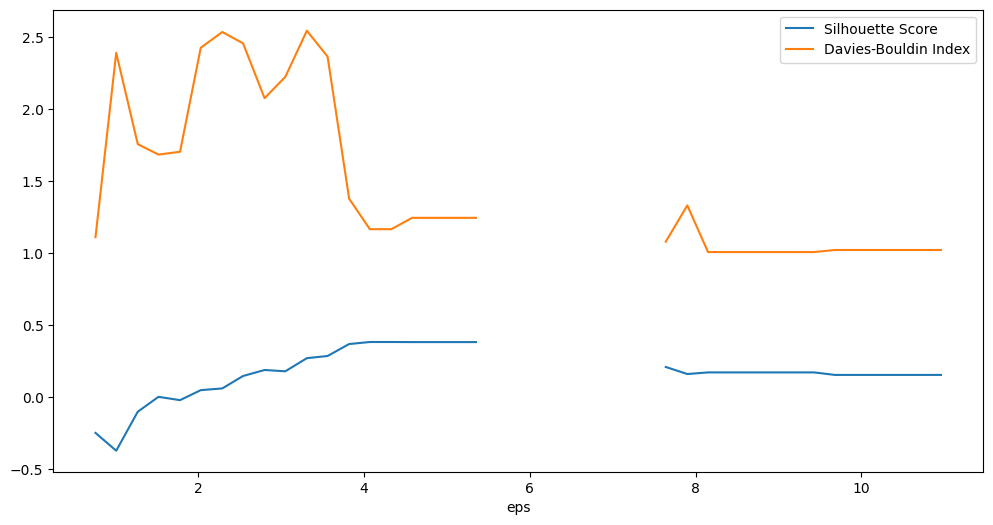

In [18]:
eps_values = np.linspace(0.5, 13.0, 50)
min_samples = 3

dbscan_results = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1:
        silhouette = silhouette_score(pca_result, labels)
        db_index = davies_bouldin_score(pca_result, labels)
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

dbscan_eval_df = pd.DataFrame(dbscan_results)
display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

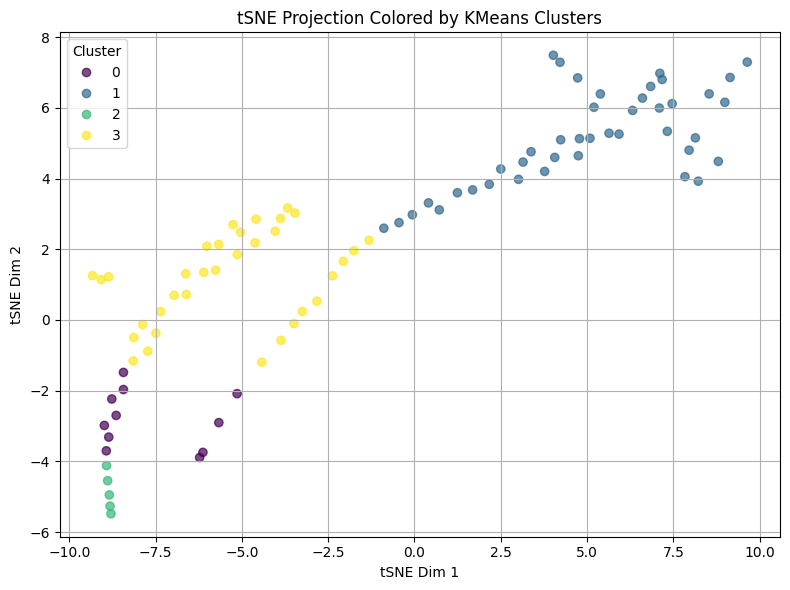

In [19]:
tSNE = TSNE(n_components=2, random_state=42, perplexity=22)
tSNE_result = tSNE.fit_transform(pca_result)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(tSNE_result[:, 0], tSNE_result[:,1], c=kmeans_labels, alpha=0.7)
plt.title("tSNE Projection Colored by KMeans Clusters")
plt.xlabel("tSNE Dim 1")
plt.ylabel("tSNE Dim 2")
plt.grid(True)
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.tight_layout()
plt.show()

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.05            2         2    343          0.999858   
1    0.05            2         2    343          0.999858   
2    0.06            2         2    343          0.999858   
3    0.06            2         2    343          0.999858   
4    0.07            2         2    343          0.999858   
..    ...          ...       ...    ...               ...   
195  0.98            2        38    180          0.269724   
196  0.99            2        38    180          0.269724   
197  0.99            2        37    178          0.229296   
198  1.00            2        36    178          0.227572   
199  1.00            2        35    177          0.232540   

     Davies-Bouldin Index  
0                0.000142  
1                0.000142  
2                0.000142  
3                0.000142  
4                0.000142  
..                    ...  
195              0.639802  
196              0.639802  
197              0.650574  
198              0.658416  
199              0.657767  

[200 rows x 6 columns]

<Axes: xlabel='eps'>

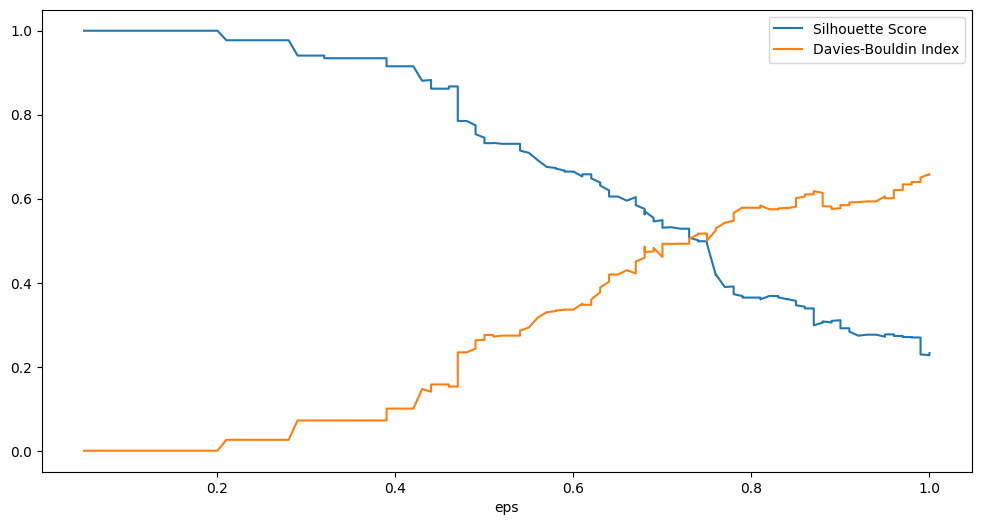

In [20]:
#For dbscan spatial plotting

data = season_df.T.copy()
data_scaled = (data - data.mean()) / data.std(ddof=0)

pca = PCA(n_components=5)
pca_result = pca.fit_transform(data_scaled)

obs_ids = data.index

eps_values = np.linspace(0.05, 1.0, 200)
min_samples = 2

dbscan_results = []

#addtions
dbscan_lavels = None
best_eps = None
best_silhouette = -999

#x = pca_result.values

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1 and n_noise < len(labels):
        mask = labels != -1
        silhouette = silhouette_score(pca_result[mask], labels[mask])
        db_index = davies_bouldin_score(pca_result[mask], labels[mask])
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

    if silhouette is not None and silhouette > best_silhouette:
        best_silhouette = silhouette
        best_labels = labels.copy()
        best_eps = eps

#saving for dbscan for spatial plotting
dbscan_eval_df = pd.DataFrame(dbscan_results)
dbscan_eval_df.to_csv(out_path / f"DBSCAN_Scores_season{str(season)}_seasonYear_{str(season_year)}.csv", index=False)

# print(f"eps={eps:.2f}, clusters={n_clusters}, noise={n_noise}")
# print("obs_ids length:", len(obs_ids))
# print("best_labels length:", len(best_labels))
# print("pca_result rows:", pca_result.shape[0])
# print("data_scaled rows:", data_scaled.shape[0])
# print("season_df.T rows:", season_df.T.shape[0])

# print("NaNs in data:", data.isna().sum().sum())
# print("NaNs in data_scaled:", data_scaled.isna().sum().sum())

#Use this file here 
dbscan_labels_df = pd.DataFrame({
    "obsstednr": obs_ids, #pca_result.index.to_list(), 
    "Cluster":best_labels,
    "eps_used": best_eps,
    "min_samples": min_samples})
dbscan_labels_df.to_csv(out_path / f"DBSCAN_Cluster_labels_season_{str(season)}_seasonYear{str(season_year)}.csv", index=False)
# from pathlib import Path



display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

In [21]:
# dbscan = DBSCAN(eps=3.0, min_samples=5)
# dbscan_labels = dbscan.fit_predict(tSNE_result)

# dbscan_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
# dbscan_noise= list(dbscan_labels).count(-1)
# if dbscan_clusters > 1:
#     dbscan_silhouette = silhouette_score(tSNE_result, dbscan_labels)
#     dbscan_db_index = davies_bouldin_score(tSNE_result, dbscan_labels)
# else:
#     dbscan_silhouette =None
#     dbscan_db_index = None
# print(f"DBSCAN Clusters on tSNE: {dbscan_clusters}")
# print(f"DBSCAN Noise: {dbscan_noise}")
# print(f"DBSCAN Silhouette: {dbscan_silhouette}")
# print(f"DBSCAN Davies-Bouldin Index: {dbscan_db_index}")

# plt.figure(figsize=(8,6))
# scatter=plt.scatter(tSNE_result[:, 0], tSNE_result[:, 1], c=dbscan_labels, alpha=0.7, cmap='tab10')
# plt.title("tSNE Projection Colored by DBSCAN Clusters")
# plt.xlabel("tSNE Dim 1")
# plt.ylabel("tSNE Dim 2")
# plt.grid(True)
# plt.legend(*scatter.legend_elements(), title="Cluster")
# plt.tight_layout()
# plt.show()

# cluster_df = pd.DataFrame({
#     "Catchment_ID": catchment_ids,
#     "KMeans_Cluster": kmeans_labels,
#     "DBSCAN tSNE Cluster": dbscan_labels
# })

# cluster_df.to_csv("catchment_clusters.csv", index = False)
# print(f"Cluster assignments saved to catchment_clusters.csv")

#### Summer (2)

In [22]:
df = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\discharge_table_complete_seasons.csv', index_col=0, parse_dates=True)
complete_seasons = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\complete_seasons.csv', index_col=0, dtype=str)

display(df.head())
display(df.info())

10000009  10000010  10000011  10000014  10000016  10000017  \
2001-01-01  1.002974  0.756018  0.649853  0.962598  0.625556       NaN   
2001-01-02  1.426323  0.899791  0.978229  1.186935  0.983393       NaN   
2001-01-03  2.759233  1.304584  1.882787  1.893259  1.558488       NaN   
2001-01-04  2.321638  1.142382  1.593618  1.661372  1.010999       NaN   
2001-01-05  2.050273  1.142149  1.865694  1.517573  1.099160       NaN   

            1000102  1000219  1000228  1000315  ...  9000173  9000293  \
2001-01-01      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-02      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-03      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-04      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-05      NaN      NaN      NaN      NaN  ...      NaN      NaN   

            9000451  9001110  season  season_year  22000047  24000034  \
2001-01-01      NaN      NaN       4         2000  0.841516       NaN   
2001-01-02      NaN      NaN       4         2000  0.952326       NaN   
2001-01-03      NaN      NaN       4         2000  0.986051       NaN   
2001-01-04      NaN      NaN       4         2000  0.896118       NaN   
2001-01-05      NaN      NaN       4         2000  0.891301       NaN   

            25000592  26000084  
2001-01-01       NaN       NaN  
2001-01-02       NaN       NaN  
2001-01-03       NaN       NaN  
2001-01-04       NaN       NaN  
2001-01-05       NaN       NaN  

[5 rows x 572 columns]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8035 entries, 2001-01-01 to 2022-12-31
Columns: 572 entries, 10000009 to 26000084
dtypes: float64(570), int64(2)
memory usage: 35.1 MB


None

In [23]:
#Start with spring and work our way down to winter
season = 2
season_year = 2022
season_key = f"{season_year}_{season}" 
cids = complete_seasons.loc[season_key].dropna().values
season_df = df[(df["season"] == season) & (df["season_year"] == season_year)]
#Sprint(season_df)
#print((season_df).columns)
season_df = season_df[cids] #this is where i lose dates
display(season_df.info())
season_df.to_csv("season_df.csv", index = True)
print(season_df)
print("season_df.csv")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 92 entries, 2022-06-01 to 2022-08-31
Columns: 335 entries, 10000009 to 9000451
dtypes: float64(335)
memory usage: 241.5 KB


None

            10000009  10000010  10000011  10000014  10000016  10000017  \
2022-06-01  0.625517  0.448157  0.187313  0.648327  0.377347  0.396283   
2022-06-02  0.623139  0.446657  0.182590  0.642089  0.360755  0.375378   
2022-06-03  0.626148  0.436628  0.180179  0.642746  0.386791  0.408183   
2022-06-04  0.616140  0.435715  0.180774  0.625204  0.375333  0.393745   
2022-06-05  0.600905  0.435865  0.184665  0.599432  0.349099  0.360691   
...              ...       ...       ...       ...       ...       ...   
2022-08-27  0.938669  0.527145  0.150948  0.553509  0.387899  0.409579   
2022-08-28  1.117917  0.599628  0.154768  0.743922  0.462528  0.503610   
2022-08-29  1.088515  0.688929  0.179044  0.672338  0.364363  0.379923   
2022-08-30  1.044438  0.679388  0.145893  0.602467  0.321713  0.326184   
2022-08-31  0.823376  0.633558  0.166896  0.582382  0.290681  0.287085   

             1000102   1000315  11000011  11000016  ...  66000034  67000017  \
2022-06-01  0.127495  0.216449  

          2022-06-01  2022-06-02  2022-06-03  2022-06-04  2022-06-05  \
10000009    0.388793    0.449222    0.500339    0.521633    0.521050   
10000010   -0.045556    0.006127    0.017265    0.056245    0.091116   
10000011   -0.684358   -0.656865   -0.636408   -0.601350   -0.563270   
10000014    0.444655    0.496798    0.542644    0.545011    0.517213   
10000016   -0.218969   -0.209546   -0.109766   -0.099505   -0.134912   
...              ...         ...         ...         ...         ...   
8000001    -0.269667   -0.231284   -0.206711   -0.181365   -0.170046   
9000015     0.959506    1.004609    1.065473    1.107994    1.072217   
9000172     0.116351    0.176368    0.196126    0.228150    0.248295   
9000293    -0.992587   -0.966493   -0.958344   -0.934319   -0.908642   
9000451    -0.600516   -0.570594   -0.555604   -0.539837   -0.528145   

          2022-06-06  2022-06-07  2022-06-08  2022-06-09  2022-06-10  ...  \
10000009    0.429518    0.401762    0.565944    0.463544  

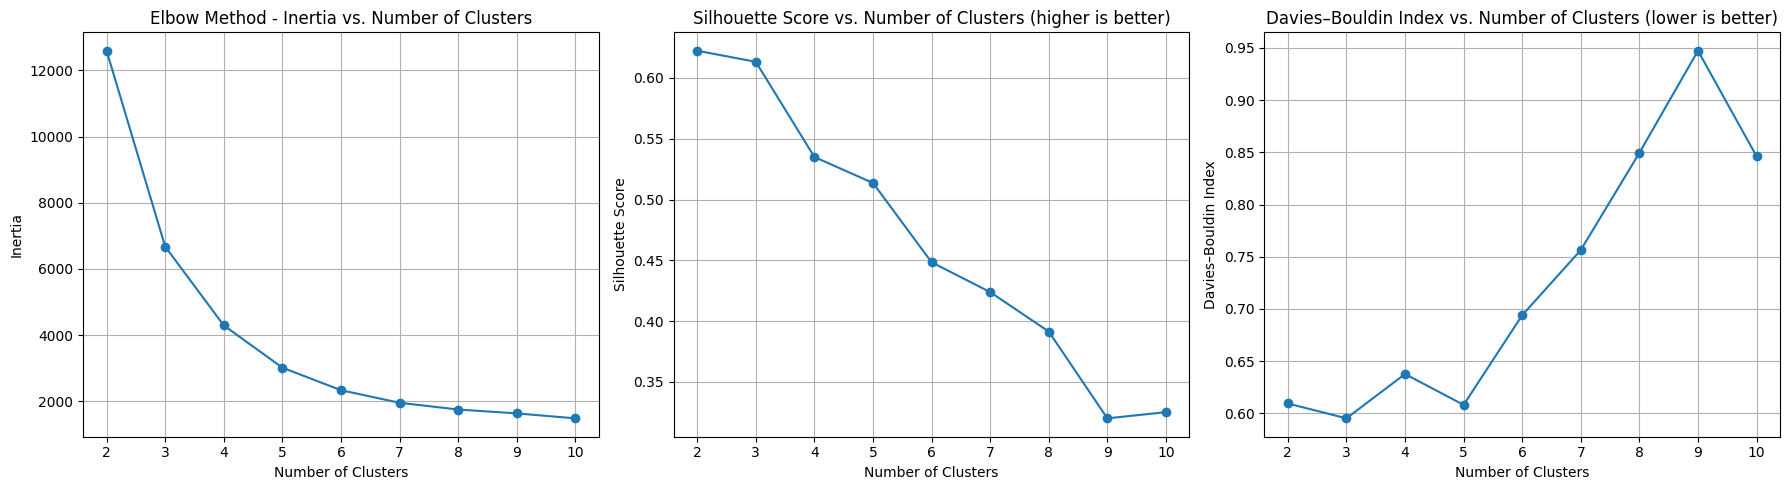

In [24]:
# Transpose the data to have catchments as rows and days as features
data = season_df.T.copy()
#print("data is: " + {data})
# Normalize each catchment's time series
# scaler = StandardScaler()
# data_scaled = scaler.fit_transform(data)
data_scaled = (data - data.mean()) / data.std(ddof=0)
print(data_scaled)
# Try different numbers of clusters and calculate the inertia, silhouette, and Davies–Bouldin
inertias = []
silhouette_scores = []
dbi_scores = []  # Davies–Bouldin Index
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, labels))
    dbi_scores.append(davies_bouldin_score(data_scaled, labels))

# Plot elbow method (inertia)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot elbow method (inertia)
axes[0].plot(cluster_range, inertias, marker='o')
axes[0].set_title('Elbow Method - Inertia vs. Number of Clusters')
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('Inertia')
axes[0].grid(True)

# Plot silhouette score
axes[1].plot(cluster_range, silhouette_scores, marker='o')
axes[1].set_title('Silhouette Score vs. Number of Clusters (higher is better)')
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('Silhouette Score')
axes[1].grid(True)

# Plot Davies–Bouldin Index
axes[2].plot(cluster_range, dbi_scores, marker='o')
axes[2].set_title('Davies–Bouldin Index vs. Number of Clusters (lower is better)')
axes[2].set_xlabel('Number of Clusters')
axes[2].set_ylabel('Davies–Bouldin Index')
axes[2].grid(True)

plt.tight_layout()
plt.show()

Cluster
10000009        2
10000010        2
10000011        0
10000014        2
10000016        0

            10000009  10000010  10000011  10000014  10000016  10000017  \
2022-06-01  0.625517  0.448157  0.187313  0.648327  0.377347  0.396283   
2022-06-02  0.623139  0.446657  0.182590  0.642089  0.360755  0.375378   
2022-06-03  0.626148  0.436628  0.180179  0.642746  0.386791  0.408183   
2022-06-04  0.616140  0.435715  0.180774  0.625204  0.375333  0.393745   
2022-06-05  0.600905  0.435865  0.184665  0.599432  0.349099  0.360691   
...              ...       ...       ...       ...       ...       ...   
2022-08-27  0.938669  0.527145  0.150948  0.553509  0.387899  0.409579   
2022-08-28  1.117917  0.599628  0.154768  0.743922  0.462528  0.503610   
2022-08-29  1.088515  0.688929  0.179044  0.672338  0.364363  0.379923   
2022-08-30  1.044438  0.679388  0.145893  0.602467  0.321713  0.326184   
2022-08-31  0.823376  0.633558  0.166896  0.582382  0.290681  0.287085   

             1000102   1000315  11000011  11000016  ...  66000034  67000017  \
2022-06-01  0.127495  0.216449  

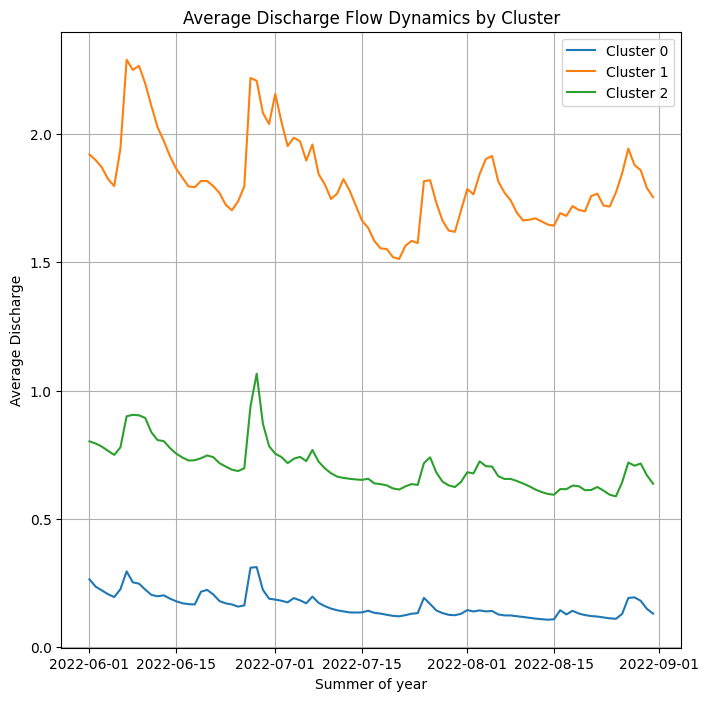

In [25]:
kmeans_final = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_final = kmeans_final.fit_predict(data_scaled)

# Assign cluster labels to each catchment
clustered_data = pd.DataFrame(index=data.index)
clustered_data['Cluster'] = labels_final
# Show the first few rows of the clustered catchments
display(clustered_data.head())

# Prepare for visualization: average discharge pattern per cluster
cluster_means = season_df.T.copy()
print(season_df.copy())
cluster_means['Cluster'] = labels_final
cluster_avg = cluster_means.groupby('Cluster').mean().T

# Plot the average discharge flow over the seaason for each cluster
plt.figure(figsize=(8, 8))
for cluster in cluster_avg.columns:
    plt.plot(cluster_avg.index, cluster_avg[cluster], label=f'Cluster {cluster}')
plt.title('Average Discharge Flow Dynamics by Cluster')
plt.xlabel('Summer of year')
plt.ylabel('Average Discharge')
plt.legend()
plt.grid(True)
plt.show()

In [26]:
from pathlib import Path

out_path = Path(r'C:\Users\kscar\Documents\Github\02807_Project\output\season_clustering')
out_path.mkdir(parents=True, exist_ok=True)
pd.DataFrame(labels_final, index=data.index, columns=['Cluster']).to_csv(out_path / f'KMeans_clustering_season_{str(season)}_seasonYear_{str(season_year)}.csv', index=True)

In [27]:
df = pd.read_csv("season_df.csv", index_col=0, parse_dates=True)
df

10000009  10000010  10000011  10000014  10000016  10000017  \
2022-06-01  0.625517  0.448157  0.187313  0.648327  0.377347  0.396283   
2022-06-02  0.623139  0.446657  0.182590  0.642089  0.360755  0.375378   
2022-06-03  0.626148  0.436628  0.180179  0.642746  0.386791  0.408183   
2022-06-04  0.616140  0.435715  0.180774  0.625204  0.375333  0.393745   
2022-06-05  0.600905  0.435865  0.184665  0.599432  0.349099  0.360691   
...              ...       ...       ...       ...       ...       ...   
2022-08-27  0.938669  0.527145  0.150948  0.553509  0.387899  0.409579   
2022-08-28  1.117917  0.599628  0.154768  0.743922  0.462528  0.503610   
2022-08-29  1.088515  0.688929  0.179044  0.672338  0.364363  0.379923   
2022-08-30  1.044438  0.679388  0.145893  0.602467  0.321713  0.326184   
2022-08-31  0.823376  0.633558  0.166896  0.582382  0.290681  0.287085   

             1000102   1000315  11000011  11000016  ...  66000034  67000017  \
2022-06-01  0.127495  0.216449  0.486388  0.539514  ...  0.194698  0.095030   
2022-06-02  0.124509  0.213853  0.483574  0.601089  ...  0.180081  0.085966   
2022-06-03  0.122737  0.212313  0.482262  0.678236  ...  0.153619  0.076382   
2022-06-04  0.119592  0.209579  0.481748  0.573081  ...  0.134847  0.069807   
2022-06-05  0.114374  0.205043  0.479187  0.557177  ...  0.099220  0.067672   
...              ...       ...       ...       ...  ...       ...       ...   
2022-08-27  0.106943  0.198584  0.348863  0.367766  ...  0.009185  0.003263   
2022-08-28  0.102121  0.194393  0.348709  0.360482  ...  0.016711  0.007462   
2022-08-29  0.095800  0.188898  0.346745  0.347747  ...  0.016756  0.004962   
2022-08-30  0.089370  0.183309  0.342987  0.338996  ...  0.010291  0.004343   
2022-08-31  0.077887  0.173328  0.339690  0.333388  ...  0.003950  0.003657   

            67000019   7000003   7000333   8000001   9000015   9000172  \
2022-06-01  0.076107  0.158173  0.274455  0.356645  0.858559  0.514270   
2022-06-02  0.067100  0.156479  0.278417  0.352097  0.844347  0.514463   
2022-06-03  0.062191  0.154340  0.279523  0.348758  0.847862  0.506799   
2022-06-04  0.055556  0.148093  0.273019  0.343597  0.843465  0.502360   
2022-06-05  0.047181  0.143455  0.268035  0.335613  0.812482  0.496202   
...              ...       ...       ...       ...       ...       ...   
2022-08-27  0.006116  0.105060  0.217270  0.259953  0.566473  0.517646   
2022-08-28  0.008689  0.109939  0.231360  0.260722  0.546890  0.483049   
2022-08-29  0.008409  0.117877  0.232268  0.262461  0.538249  0.469090   
2022-08-30  0.006155  0.104496  0.216295  0.259870  0.530061  0.444687   
2022-08-31  0.004636  0.096917  0.207744  0.248576  0.524796  0.433378   

             9000293   9000451  
2022-06-01  0.061452  0.221548  
2022-06-02  0.059267  0.216952  
2022-06-03  0.053876  0.211880  
2022-06-04  0.051686  0.204622  
2022-06-05  0.052086  0.198148  
...              ...       ...  
2022-08-27  0.014324  0.104661  
2022-08-28  0.013313  0.104838  
2022-08-29  0.013227  0.102351  
2022-08-30  0.013354  0.097917  
2022-08-31  0.014489  0.103971  

[92 rows x 335 columns]

<Axes: >

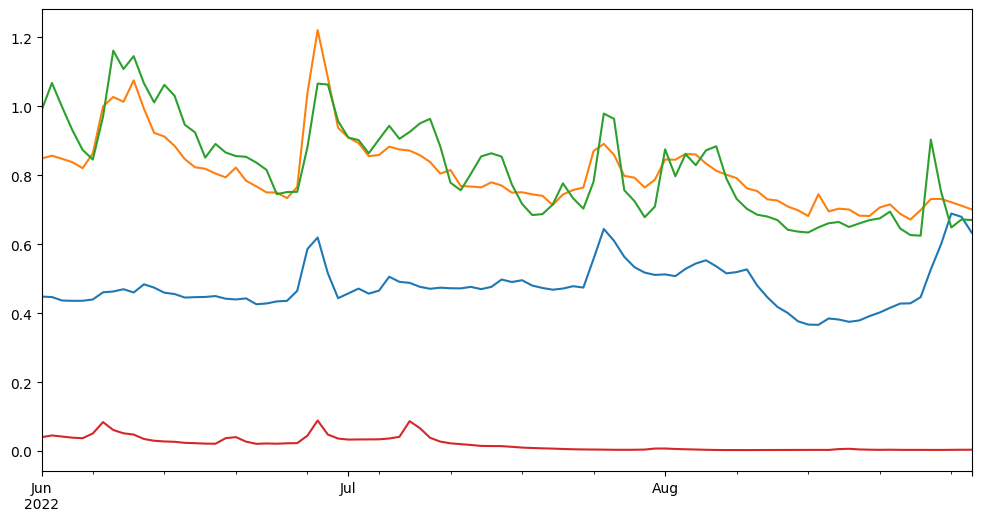

In [28]:
df.T.loc[df.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))


<Axes: >

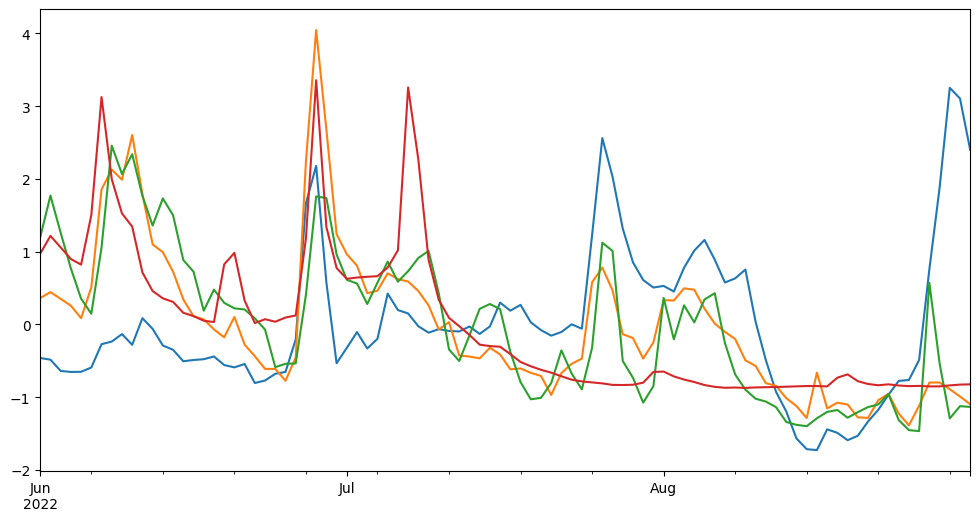

In [29]:
#1st method of scaling
df_scaled = (df-df.mean())/df.std(ddof=0)

#2nd method of scaling
df_scaled.T.loc[df_scaled.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))

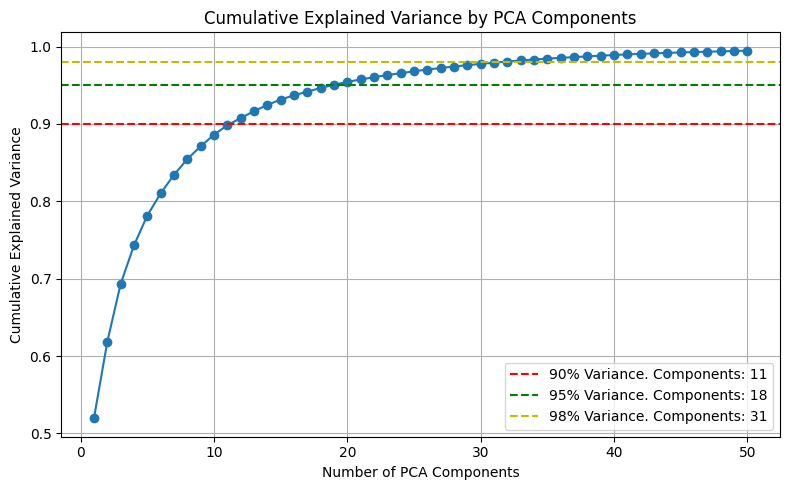

In [30]:
max_components = 50
pca_full = PCA(n_components=max_components) #remember to import PCA 
pca_full.fit(df_scaled)

explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, max_components + 1), cumulative_variance, marker='o')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of PCA Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.axhline(y=0.9, color='r', linestyle='--', label=f'90% Variance. Components: {sum(~(cumulative_variance > 0.90))}')
plt.axhline(y=0.95, color='g', linestyle='--', label=f'95% Variance. Components: {sum(~(cumulative_variance > 0.95))}')
plt.axhline(y=0.98, color='y', linestyle='--', label=f'98% Variance. Components: {sum(~(cumulative_variance > 0.98))}')
plt.legend()
plt.tight_layout()
plt.show()

In [31]:
pca = PCA(n_components=21)
pca_result = pca.fit_transform(df_scaled)
pca_result

array([[ 2.50420116e+01, -1.59859095e+01,  8.98687797e+00, ...,
         7.73329237e-01, -2.22730859e-01,  3.05248522e+00],
       [ 2.14032994e+01, -1.41342405e+01,  4.45182822e+00, ...,
        -2.77613959e-02,  2.29614689e-02, -6.44957039e-02],
       [ 1.84144619e+01, -1.18716391e+01,  2.83908881e+00, ...,
        -1.29084586e-01,  2.42139050e-01, -1.14555421e+00],
       ...,
       [-4.80696201e+00,  6.58609846e-01,  1.98820443e+01, ...,
         1.11889053e+00,  2.84179447e+00, -8.99279797e-02],
       [-9.74748120e+00,  1.12097823e-01,  1.26912990e+01, ...,
        -5.36404531e-01, -1.03892796e+00,  2.70997851e-01],
       [-1.23963769e+01,  5.70757750e-02,  8.13306269e+00, ...,
        -1.30062610e+00, -2.38226375e+00, -2.03092658e-02]],
      shape=(92, 21))

C:\Users\kscar\AppData\Local\Temp\ipykernel_53928\1787641122.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


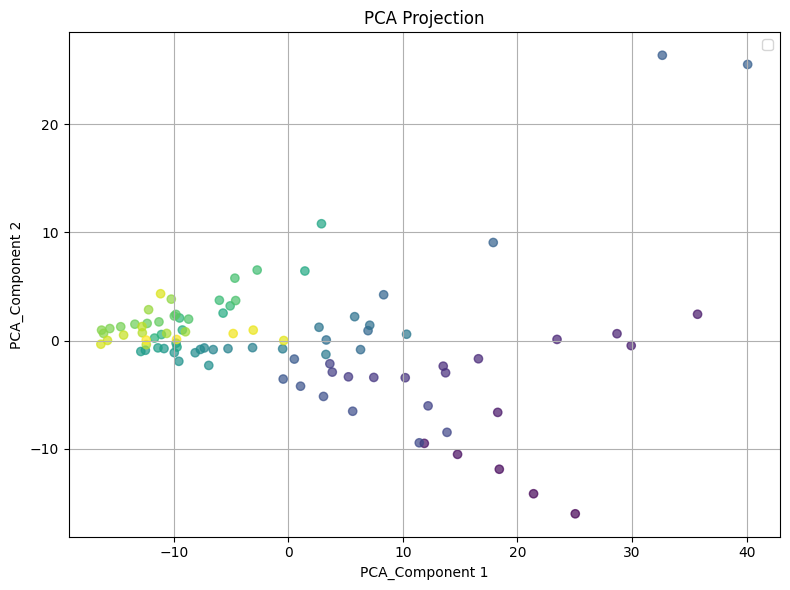

In [32]:
plt.figure(figsize=(8,6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df.index, alpha=0.7)
plt.title("PCA Projection")
plt.xlabel("PCA_Component 1")
plt.ylabel("PCA_Component 2")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


C:\Users\kscar\AppData\Local\Temp\ipykernel_53928\2567467783.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


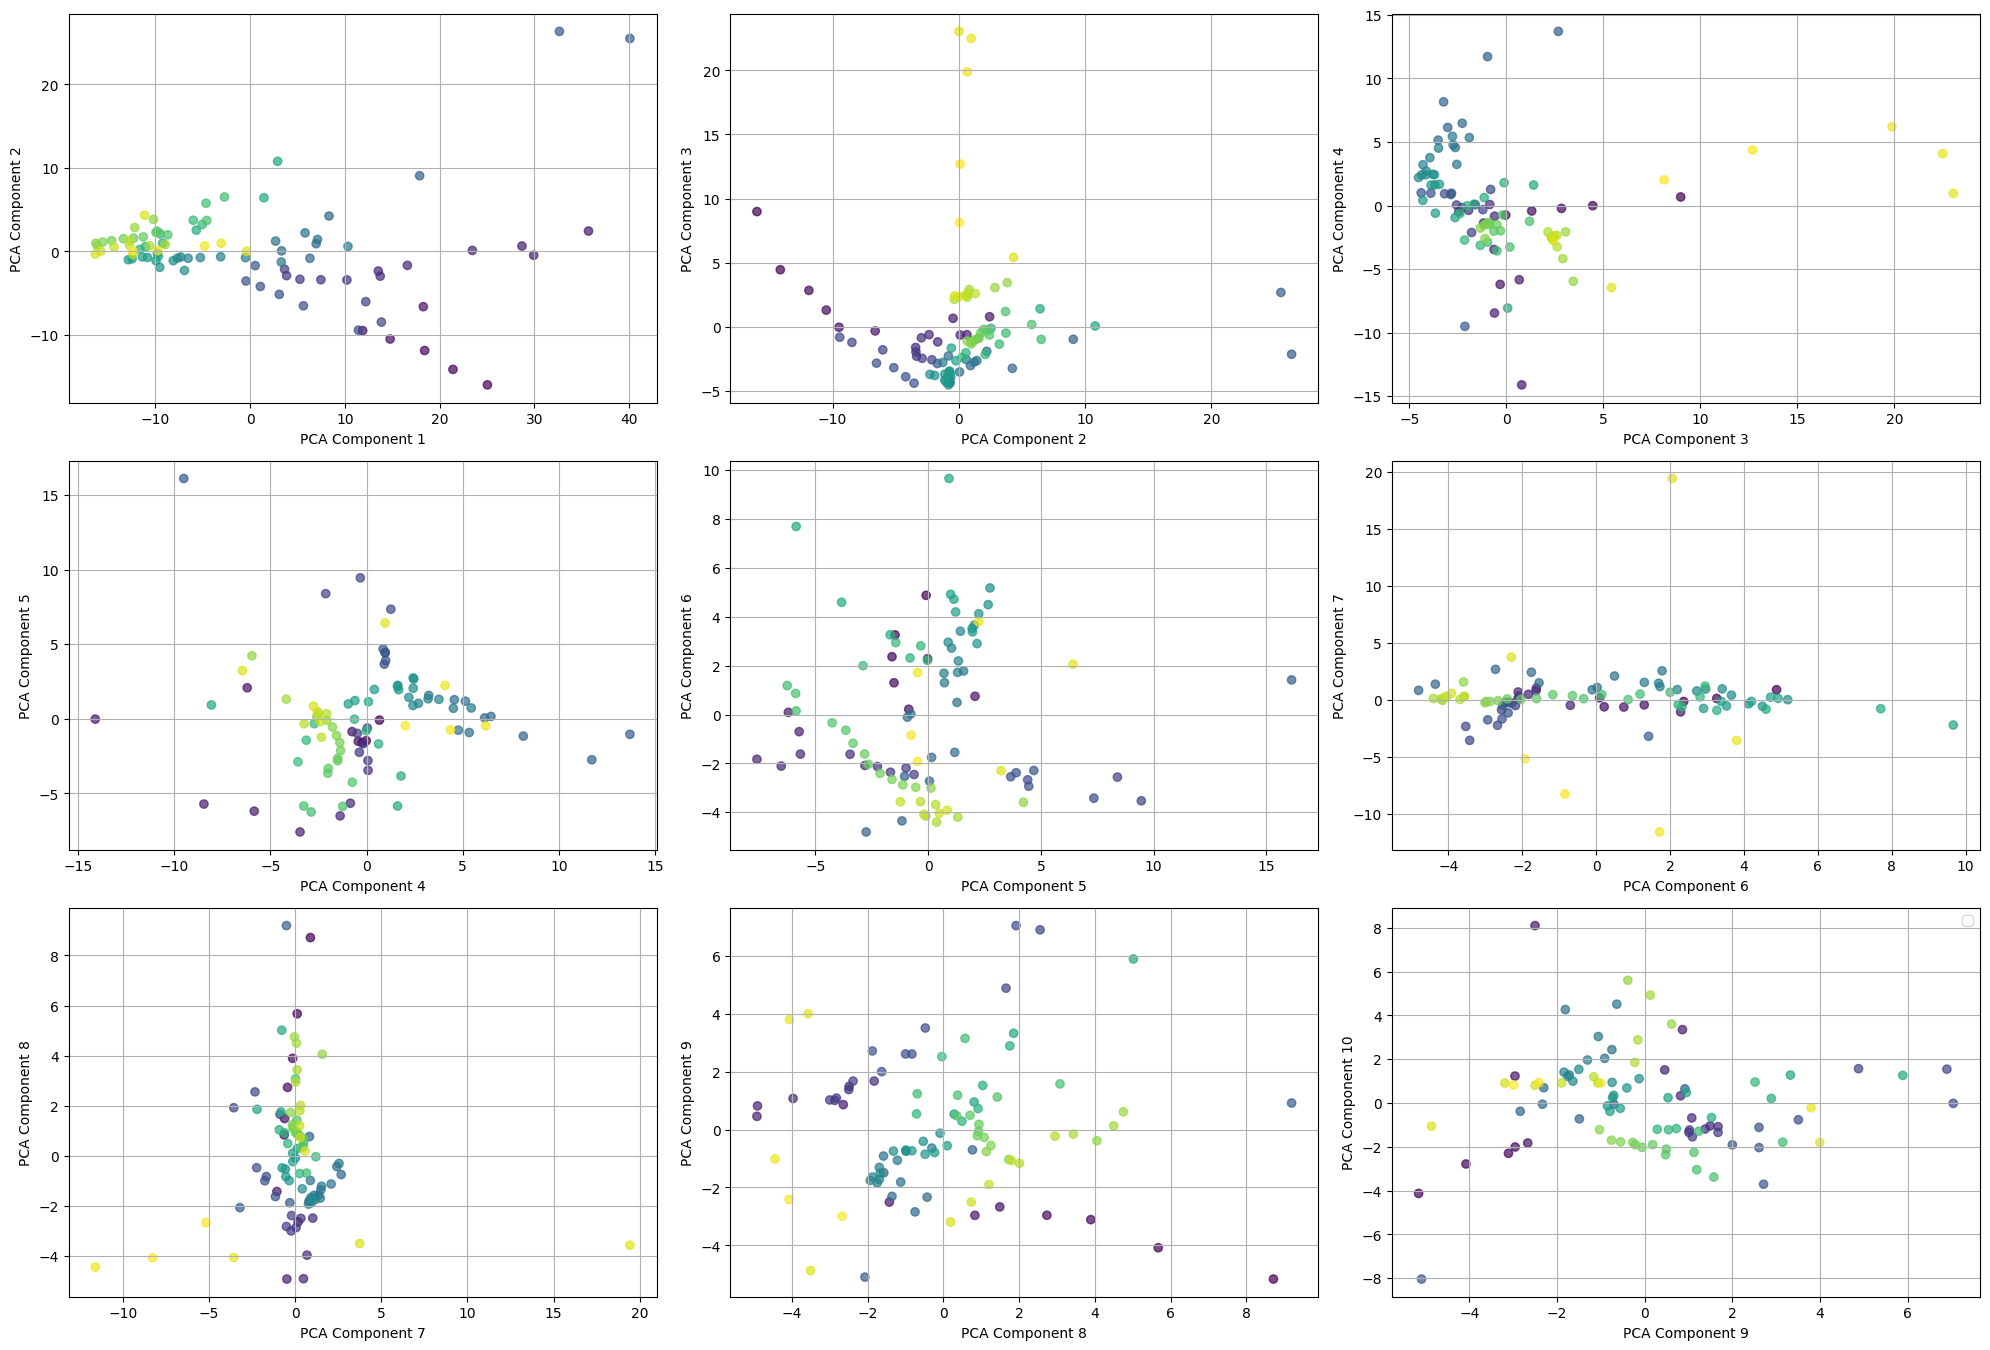

In [33]:
plt.figure(figsize=(20,40))
for i in range(9):
    plt.subplot(9, 3, i+1)
    plt.scatter(pca_result[:, i], pca_result[:, i+1], c=df.index, alpha=0.7)
    plt.xlabel(f"PCA Component {i+1}")
    plt.ylabel(f"PCA Component {i+2}")
    plt.grid(True)
    plt.tight_layout()
plt.legend()
plt.show()

In [34]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_result)

kmeans_silhouette = silhouette_score(pca_result, kmeans_labels)
kmeans_db_index = davies_bouldin_score(pca_result, kmeans_labels)
print(f"KMeans Silhouette Score is {kmeans_silhouette:.3f}")
print(f"KMeans Davies-Bouldin Index is {kmeans_db_index:.3f}")

KMeans Silhouette Score is 0.197
KMeans Davies-Bouldin Index is 1.548


<Axes: xlabel='k'>

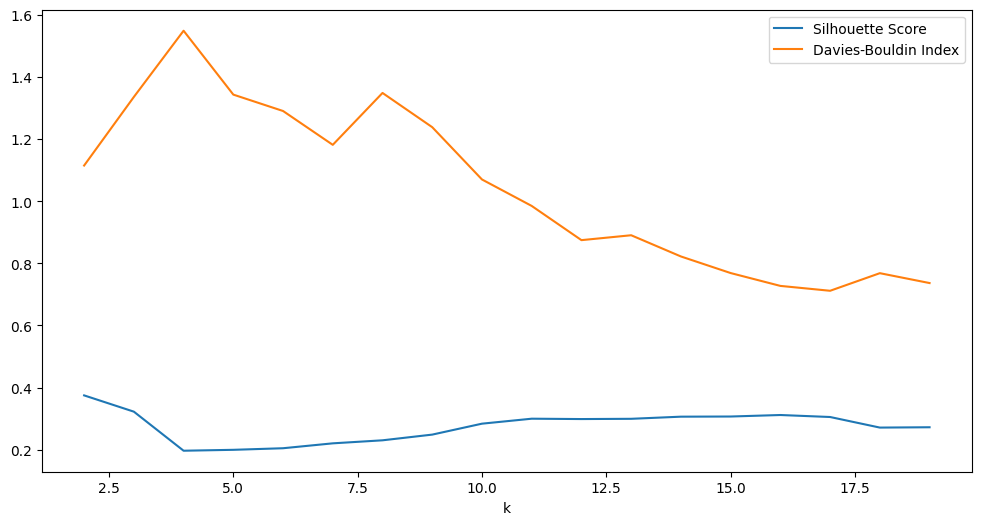

In [35]:
eval_results=[]

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(pca_result)

    db_index = davies_bouldin_score(pca_result, labels)
    silhouette = silhouette_score(pca_result, labels)

    eval_results.append({"k": k, "Silhouette Score":  silhouette, "Davies-Bouldin Index": db_index})
eval_df = pd.DataFrame(eval_results)
eval_df.plot(x="k", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.50            3         0     92               NaN   
1    0.76            3         0     92               NaN   
2    1.01            3         0     92               NaN   
3    1.27            3         1     89               NaN   
4    1.52            3         1     89               NaN   
5    1.78            3         2     82         -0.176001   
6    2.03            3         2     82         -0.176001   
7    2.29            3         5     69         -0.166606   
8    2.54            3         5     66         -0.130593   
9    2.80            3         5     64         -0.113595   
10   3.05            3         4     59         -0.050752   
11   3.31            3         4     58         -0.037308   
12   3.56            3         5     52         -0.039016   
13   3.82            3         5     51         -0.032145   
14   4.07            3         6     47         -0.009303   
15   4.33            3         6     47         -0.009303   
16   4.58            3         7     43          0.010579   
17   4.84            3         7     39          0.052668   
18   5.09            3         6     37          0.083265   
19   5.35            3         7     32          0.083774   
20   5.60            3         7     31          0.090776   
21   5.86            3         7     29          0.087969   
22   6.11            3         7     23          0.103285   
23   6.37            3         6     23          0.074054   
24   6.62            3         5     23          0.065576   
25   6.88            3         4     23          0.068845   
26   7.13            3         4     23          0.068845   
27   7.39            3         4     23          0.068845   
28   7.64            3         4     23          0.068845   
29   7.90            3         3     22          0.168917   
30   8.15            3         3     22          0.168917   
31   8.41            3         3     21          0.183687   
32   8.66            3         4     15          0.247767   
33   8.92            3         4     15          0.247767   
34   9.17            3         4     15          0.247767   
35   9.43            3         4     15          0.247767   
36   9.68            3         3     15          0.228399   
37   9.94            3         3     15          0.228399   
38  10.19            3         2     14          0.258392   
39  10.45            3         2     14          0.258392   
40  10.70            3         2     12          0.274247   
41  10.96            3         1     12               NaN   
42  11.21            3         1     11               NaN   
43  11.47            3         1     11               NaN   
44  11.72            3         1     11               NaN   
45  11.98            3         2      8          0.201429   
46  12.23            3         2      8          0.201429   
47  12.49            3         2      8          0.201429   
48  12.74            3         2      7          0.200820   
49  13.00            3         2      7          0.200820   

    Davies-Bouldin Index  
0                    NaN  
1                    NaN  
2                    NaN  
3                    NaN  
4                    NaN  
5               1.387397  
6               1.387397  
7               1.625183  
8               1.646605  
9               1.656310  
10              1.774529  
11              1.769345  
12              1.673884  
13              1.667284  
14              1.673797  
15              1.673797  
16              1.700005  
17              1.739057  
18              1.749856  
19              1.852414  
20              1.851674  
21              1.870206  
22              1.777949  
23              1.837902  
24              1.957873  
25              2.016038  
26              2.016038  
27              2.016038  
28              2.016038  
29              2.194437  
30              2.194437  
31              2.320007  
32 

<Axes: xlabel='eps'>

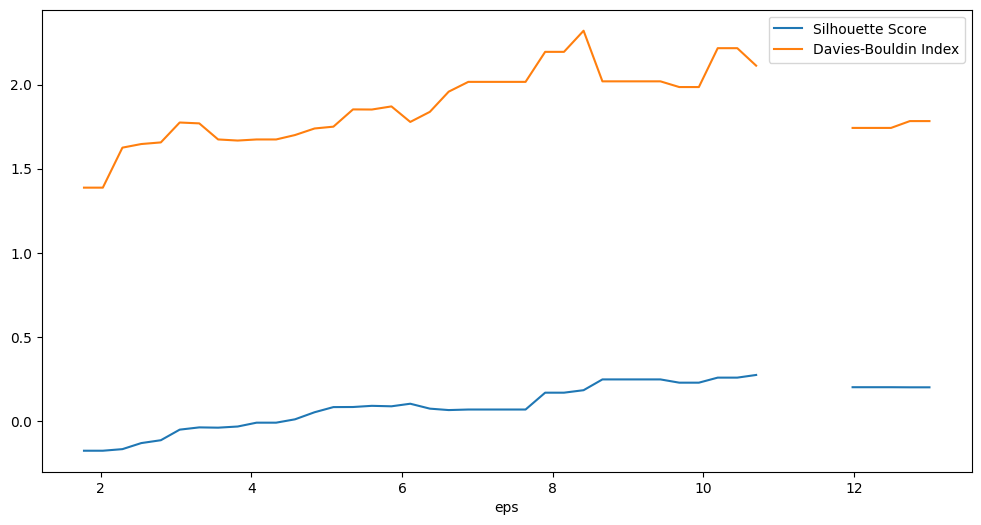

In [36]:
eps_values = np.linspace(0.5, 13.0, 50)
min_samples = 3

dbscan_results = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1:
        silhouette = silhouette_score(pca_result, labels)
        db_index = davies_bouldin_score(pca_result, labels)
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

dbscan_eval_df = pd.DataFrame(dbscan_results)
display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

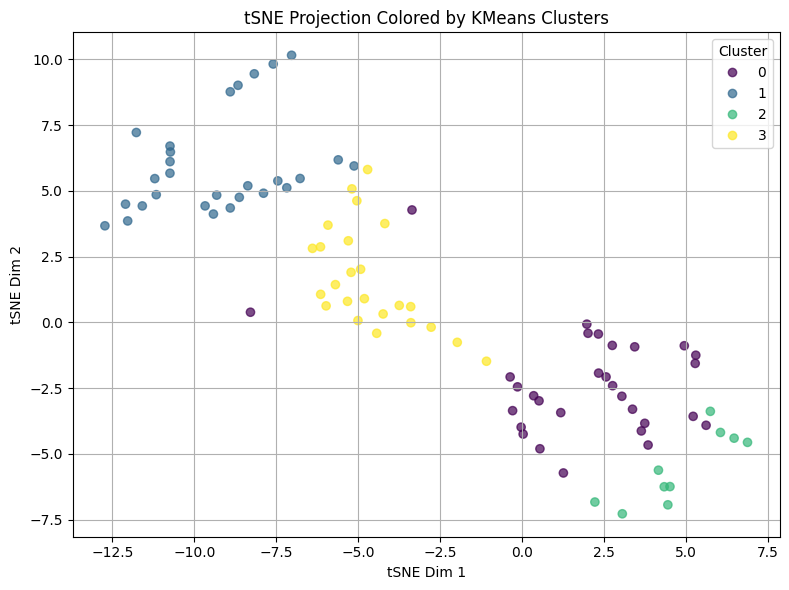

In [37]:
tSNE = TSNE(n_components=2, random_state=42, perplexity=22)
tSNE_result = tSNE.fit_transform(pca_result)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(tSNE_result[:, 0], tSNE_result[:,1], c=kmeans_labels, alpha=0.7)
plt.title("tSNE Projection Colored by KMeans Clusters")
plt.xlabel("tSNE Dim 1")
plt.ylabel("tSNE Dim 2")
plt.grid(True)
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.tight_layout()
plt.show()

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.05            2         3    329          0.998200   
1    0.05            2         3    329          0.998200   
2    0.06            2         3    329          0.998200   
3    0.06            2         3    329          0.998200   
4    0.07            2         3    329          0.998200   
..    ...          ...       ...    ...               ...   
195  0.98            2        13     80          0.160111   
196  0.99            2        13     80          0.160111   
197  0.99            2        13     79          0.158407   
198  1.00            2        13     79          0.158407   
199  1.00            2        13     77          0.150985   

     Davies-Bouldin Index  
0                0.001915  
1                0.001915  
2                0.001915  
3                0.001915  
4                0.001915  
..                    ...  
195              0.751093  
196              0.751093  
197              0.769865  
198              0.769865  
199              0.761298  

[200 rows x 6 columns]

<Axes: xlabel='eps'>

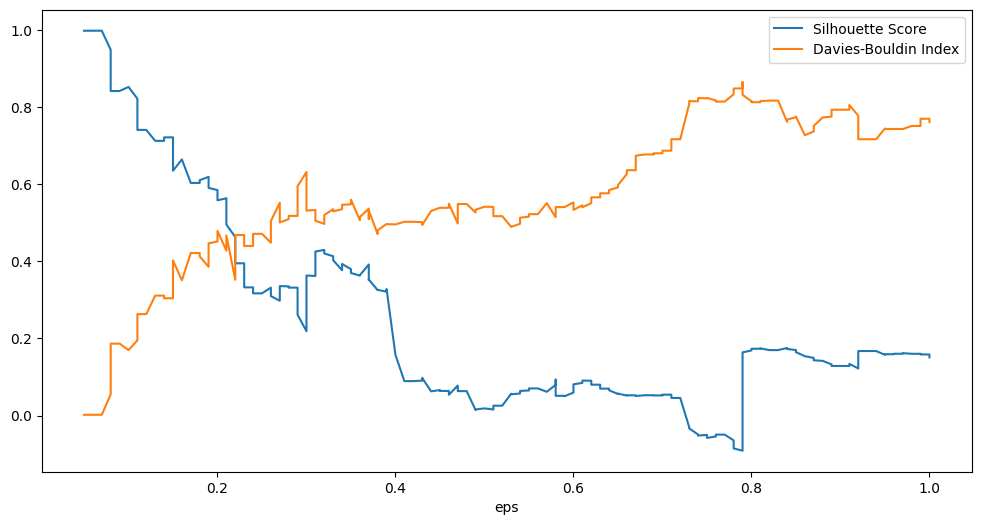

In [38]:
#For dbscan spatial plotting

data = season_df.T.copy()
data_scaled = (data - data.mean()) / data.std(ddof=0)

pca = PCA(n_components=5)
pca_result = pca.fit_transform(data_scaled)

obs_ids = data.index

eps_values = np.linspace(0.05, 1.0, 200)
min_samples = 2

dbscan_results = []

#addtions
dbscan_lavels = None
best_eps = None
best_silhouette = -999

#x = pca_result.values

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1 and n_noise < len(labels):
        mask = labels != -1
        silhouette = silhouette_score(pca_result[mask], labels[mask])
        db_index = davies_bouldin_score(pca_result[mask], labels[mask])
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

    if silhouette is not None and silhouette > best_silhouette:
        best_silhouette = silhouette
        best_labels = labels.copy()
        best_eps = eps

#saving for dbscan for spatial plotting
dbscan_eval_df = pd.DataFrame(dbscan_results)
dbscan_eval_df.to_csv(out_path / f"DBSCAN_Scores_season{str(season)}_seasonYear_{str(season_year)}.csv", index=False)

# print(f"eps={eps:.2f}, clusters={n_clusters}, noise={n_noise}")
# print("obs_ids length:", len(obs_ids))
# print("best_labels length:", len(best_labels))
# print("pca_result rows:", pca_result.shape[0])
# print("data_scaled rows:", data_scaled.shape[0])
# print("season_df.T rows:", season_df.T.shape[0])

# print("NaNs in data:", data.isna().sum().sum())
# print("NaNs in data_scaled:", data_scaled.isna().sum().sum())

#Use this file here 
dbscan_labels_df = pd.DataFrame({
    "obsstednr": obs_ids, #pca_result.index.to_list(), 
    "Cluster":best_labels,
    "eps_used": best_eps,
    "min_samples": min_samples})
dbscan_labels_df.to_csv(out_path / f"DBSCAN_Cluster_labels_season_{str(season)}_seasonYear{str(season_year)}.csv", index=False)
# from pathlib import Path



display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

#### Fall (3)

In [39]:
df = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\discharge_table_complete_seasons.csv', index_col=0, parse_dates=True)
complete_seasons = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\complete_seasons.csv', index_col=0, dtype=str)

display(df.head())
display(df.info())

10000009  10000010  10000011  10000014  10000016  10000017  \
2001-01-01  1.002974  0.756018  0.649853  0.962598  0.625556       NaN   
2001-01-02  1.426323  0.899791  0.978229  1.186935  0.983393       NaN   
2001-01-03  2.759233  1.304584  1.882787  1.893259  1.558488       NaN   
2001-01-04  2.321638  1.142382  1.593618  1.661372  1.010999       NaN   
2001-01-05  2.050273  1.142149  1.865694  1.517573  1.099160       NaN   

            1000102  1000219  1000228  1000315  ...  9000173  9000293  \
2001-01-01      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-02      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-03      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-04      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-05      NaN      NaN      NaN      NaN  ...      NaN      NaN   

            9000451  9001110  season  season_year  22000047  24000034  \
2001-01-01      NaN      NaN       4         2000  0.841516       NaN   
2001-01-02      NaN      NaN       4         2000  0.952326       NaN   
2001-01-03      NaN      NaN       4         2000  0.986051       NaN   
2001-01-04      NaN      NaN       4         2000  0.896118       NaN   
2001-01-05      NaN      NaN       4         2000  0.891301       NaN   

            25000592  26000084  
2001-01-01       NaN       NaN  
2001-01-02       NaN       NaN  
2001-01-03       NaN       NaN  
2001-01-04       NaN       NaN  
2001-01-05       NaN       NaN  

[5 rows x 572 columns]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8035 entries, 2001-01-01 to 2022-12-31
Columns: 572 entries, 10000009 to 26000084
dtypes: float64(570), int64(2)
memory usage: 35.1 MB


None

In [40]:
#Start with spring and work our way down to winter
season = 3
season_year = 2022
season_key = f"{season_year}_{season}" 
cids = complete_seasons.loc[season_key].dropna().values
season_df = df[(df["season"] == season) & (df["season_year"] == season_year)]
#Sprint(season_df)
#print((season_df).columns)
season_df = season_df[cids] #this is where i lose dates
display(season_df.info())
season_df.to_csv("season_df.csv", index = True)
print(season_df)
print("season_df.csv")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 91 entries, 2022-09-01 to 2022-11-30
Columns: 339 entries, 10000009 to 9000451
dtypes: float64(339)
memory usage: 241.7 KB


None

            10000009  10000010  10000011  10000014  10000016  10000017  \
2022-09-01  0.728996  0.592901  0.130140  0.568273  0.295052  0.292592   
2022-09-02  0.688271  0.569209  0.125860  0.558429  0.304597  0.304619   
2022-09-03  0.662555  0.551514  0.124865  0.544117  0.297924  0.296210   
2022-09-04  0.646601  0.537564  0.124141  0.532364  0.302625  0.302134   
2022-09-05  0.633859  0.524072  0.124433  0.526514  0.306038  0.306434   
...              ...       ...       ...       ...       ...       ...   
2022-11-26  0.968739  0.624644  0.398821  0.827196  0.529928  0.588534   
2022-11-27  0.944472  0.581175  0.384589  0.799617  0.492238  0.541045   
2022-11-28  0.886261  0.567671  0.360462  0.777567  0.476825  0.521625   
2022-11-29  0.865418  0.568608  0.331981  0.769774  0.459070  0.499253   
2022-11-30  0.830594  0.527164  0.312406  0.767171  0.469754  0.512715   

             1000102   1000315  11000011  11000016  ...  66000034  67000017  \
2022-09-01  0.065360  0.162439  

          2022-09-01  2022-09-02  2022-09-03  2022-09-04  2022-09-05  \
10000009    1.146964    1.074172    1.035407    1.014538    0.989235   
10000010    0.776984    0.743794    0.721992    0.704607    0.676797   
10000011   -0.481054   -0.486434   -0.482226   -0.470532   -0.460523   
10000014    0.710032    0.713879    0.701115    0.689825    0.683747   
10000016   -0.032732    0.009535    0.006232    0.036802    0.056300   
...              ...         ...         ...         ...         ...   
8000001    -0.174699   -0.204100   -0.185916   -0.190345   -0.223245   
9000015     0.590665    0.646302    0.707240    0.752064    0.767188   
9000172     0.320576    0.350334    0.361008    0.360734    0.361601   
9000293    -0.780488   -0.774018   -0.773874   -0.768099   -0.759474   
9000451    -0.569436   -0.549163   -0.544513   -0.548847   -0.551894   

          2022-09-06  2022-09-07  2022-09-08  2022-09-09  2022-09-10  ...  \
10000009    1.002074    0.967806    0.803917    0.453043  

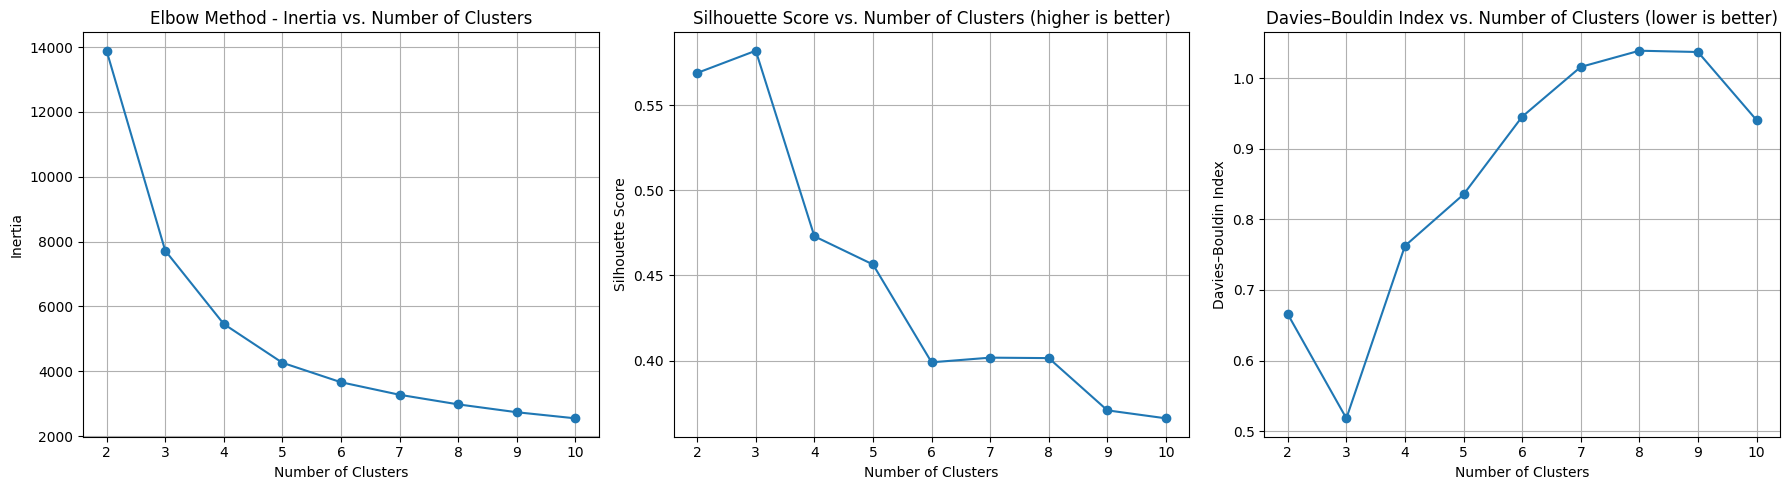

In [41]:
# Transpose the data to have catchments as rows and days as features
data = season_df.T.copy()
#print("data is: " + {data})
# Normalize each catchment's time series
# scaler = StandardScaler()
# data_scaled = scaler.fit_transform(data)
data_scaled = (data - data.mean()) / data.std(ddof=0)
print(data_scaled)
# Try different numbers of clusters and calculate the inertia, silhouette, and Davies–Bouldin
inertias = []
silhouette_scores = []
dbi_scores = []  # Davies–Bouldin Index
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, labels))
    dbi_scores.append(davies_bouldin_score(data_scaled, labels))

# Plot elbow method (inertia)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot elbow method (inertia)
axes[0].plot(cluster_range, inertias, marker='o')
axes[0].set_title('Elbow Method - Inertia vs. Number of Clusters')
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('Inertia')
axes[0].grid(True)

# Plot silhouette score
axes[1].plot(cluster_range, silhouette_scores, marker='o')
axes[1].set_title('Silhouette Score vs. Number of Clusters (higher is better)')
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('Silhouette Score')
axes[1].grid(True)

# Plot Davies–Bouldin Index
axes[2].plot(cluster_range, dbi_scores, marker='o')
axes[2].set_title('Davies–Bouldin Index vs. Number of Clusters (lower is better)')
axes[2].set_xlabel('Number of Clusters')
axes[2].set_ylabel('Davies–Bouldin Index')
axes[2].grid(True)

plt.tight_layout()
plt.show()

Cluster
10000009        1
10000010        1
10000011        0
10000014        1
10000016        0

            10000009  10000010  10000011  10000014  10000016  10000017  \
2022-09-01  0.728996  0.592901  0.130140  0.568273  0.295052  0.292592   
2022-09-02  0.688271  0.569209  0.125860  0.558429  0.304597  0.304619   
2022-09-03  0.662555  0.551514  0.124865  0.544117  0.297924  0.296210   
2022-09-04  0.646601  0.537564  0.124141  0.532364  0.302625  0.302134   
2022-09-05  0.633859  0.524072  0.124433  0.526514  0.306038  0.306434   
...              ...       ...       ...       ...       ...       ...   
2022-11-26  0.968739  0.624644  0.398821  0.827196  0.529928  0.588534   
2022-11-27  0.944472  0.581175  0.384589  0.799617  0.492238  0.541045   
2022-11-28  0.886261  0.567671  0.360462  0.777567  0.476825  0.521625   
2022-11-29  0.865418  0.568608  0.331981  0.769774  0.459070  0.499253   
2022-11-30  0.830594  0.527164  0.312406  0.767171  0.469754  0.512715   

             1000102   1000315  11000011  11000016  ...  66000034  67000017  \
2022-09-01  0.065360  0.162439  

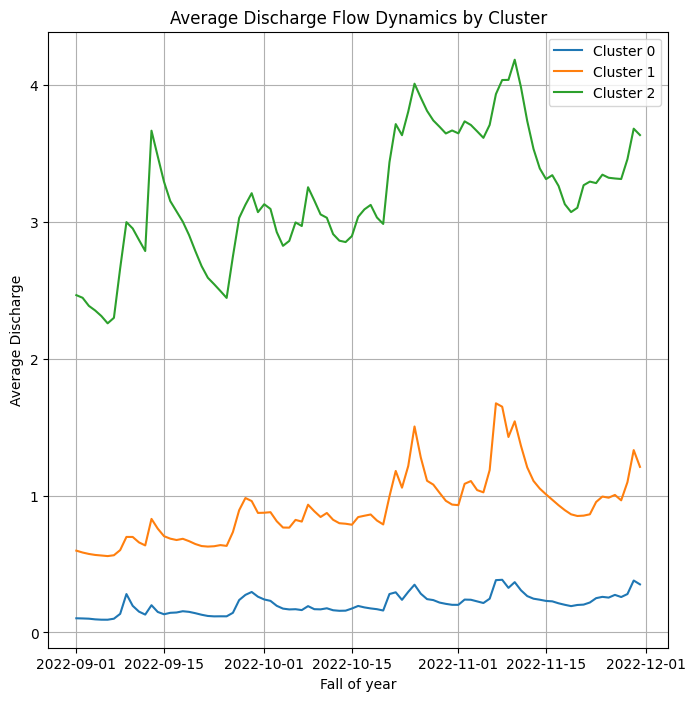

In [42]:
kmeans_final = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_final = kmeans_final.fit_predict(data_scaled)

# Assign cluster labels to each catchment
clustered_data = pd.DataFrame(index=data.index)
clustered_data['Cluster'] = labels_final
# Show the first few rows of the clustered catchments
display(clustered_data.head())

# Prepare for visualization: average discharge pattern per cluster
cluster_means = season_df.T.copy()
print(season_df.copy())
cluster_means['Cluster'] = labels_final
cluster_avg = cluster_means.groupby('Cluster').mean().T

# Plot the average discharge flow over the seaason for each cluster
plt.figure(figsize=(8, 8))
for cluster in cluster_avg.columns:
    plt.plot(cluster_avg.index, cluster_avg[cluster], label=f'Cluster {cluster}')
plt.title('Average Discharge Flow Dynamics by Cluster')
plt.xlabel('Fall of year')
plt.ylabel('Average Discharge')
plt.legend()
plt.grid(True)
plt.show()

In [43]:
from pathlib import Path

out_path = Path(r'C:\Users\kscar\Documents\Github\02807_Project\output\season_clustering')
out_path.mkdir(parents=True, exist_ok=True)
pd.DataFrame(labels_final, index=data.index, columns=['Cluster']).to_csv(out_path / f'KMeans_clustering_season_{str(season)}_seasonYear_{str(season_year)}.csv', index=True)

In [44]:
df = pd.read_csv("season_df.csv", index_col=0, parse_dates=True)
df

10000009  10000010  10000011  10000014  10000016  10000017  \
2022-09-01  0.728996  0.592901  0.130140  0.568273  0.295052  0.292592   
2022-09-02  0.688271  0.569209  0.125860  0.558429  0.304597  0.304619   
2022-09-03  0.662555  0.551514  0.124865  0.544117  0.297924  0.296210   
2022-09-04  0.646601  0.537564  0.124141  0.532364  0.302625  0.302134   
2022-09-05  0.633859  0.524072  0.124433  0.526514  0.306038  0.306434   
...              ...       ...       ...       ...       ...       ...   
2022-11-26  0.968739  0.624644  0.398821  0.827196  0.529928  0.588534   
2022-11-27  0.944472  0.581175  0.384589  0.799617  0.492238  0.541045   
2022-11-28  0.886261  0.567671  0.360462  0.777567  0.476825  0.521625   
2022-11-29  0.865418  0.568608  0.331981  0.769774  0.459070  0.499253   
2022-11-30  0.830594  0.527164  0.312406  0.767171  0.469754  0.512715   

             1000102   1000315  11000011  11000016  ...  66000034  67000017  \
2022-09-01  0.065360  0.162439  0.335720  0.329587  ...  0.003192  0.003570   
2022-09-02  0.061003  0.158652  0.333798  0.327095  ...  0.006315  0.003652   
2022-09-03  0.064805  0.161957  0.329766  0.324018  ...  0.009976  0.003613   
2022-09-04  0.057584  0.155680  0.326905  0.320154  ...  0.004009  0.003449   
2022-09-05  0.056860  0.155051  0.326374  0.317204  ...  0.001426  0.003416   
...              ...       ...       ...       ...  ...       ...       ...   
2022-11-26  1.625322  1.518397  1.391723  1.642067  ...  0.214787  0.150866   
2022-11-27  1.310405  1.244663  1.389123  1.444332  ...  0.171957  0.143194   
2022-11-28  1.036305  1.006409  1.453812  2.183136  ...  0.206053  0.131237   
2022-11-29  0.852939  0.847023  1.582789  3.226367  ...  0.153820  0.121296   
2022-11-30  0.773150  0.777667  1.651703  2.708172  ...  0.135458  0.111203   

            67000019   7000003   7000333   8000001   9000015   9000172  \
2022-09-01  0.004019  0.096387  0.203086  0.242831  0.524365  0.425014   
2022-09-02  0.003658  0.095188  0.207465  0.227608  0.534075  0.427414   
2022-09-03  0.008662  0.093770  0.203922  0.229846  0.546287  0.423619   
2022-09-04  0.003857  0.095047  0.197057  0.222713  0.554260  0.416587   
2022-09-05  0.002033  0.093931  0.194036  0.207809  0.555834  0.413316   
...              ...       ...       ...       ...       ...       ...   
2022-11-26  0.129458  1.294835  0.873563  1.521782  1.914473  0.910698   
2022-11-27  0.111295  1.202814  0.802415  1.415045  1.875369  0.814199   
2022-11-28  0.110147  1.015043  0.752426  1.270161  2.291632  0.794412   
2022-11-29  0.110124  0.847646  0.700353  1.128607  2.979147  0.804561   
2022-11-30  0.113860  0.736959  0.672138  1.027618  2.338157  0.773316   

             9000293   9000451  
2022-09-01  0.019995  0.097629  
2022-09-02  0.022220  0.103254  
2022-09-03  0.021536  0.102797  
2022-09-04  0.019454  0.096589  
2022-09-05  0.019386  0.092326  
...              ...       ...  
2022-11-26  1.054000  0.652750  
2022-11-27  1.007870  0.595586  
2022-11-28  2.324206  0.718162  
2022-11-29  3.306417  1.111236  
2022-11-30  2.365706  1.038981  

[91 rows x 339 columns]

<Axes: >

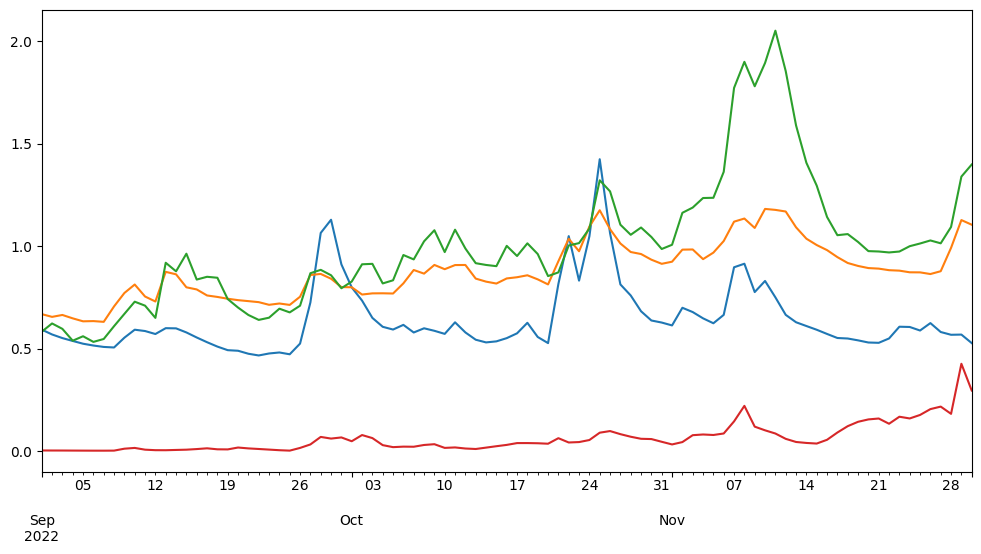

In [45]:
df.T.loc[df.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))


<Axes: >

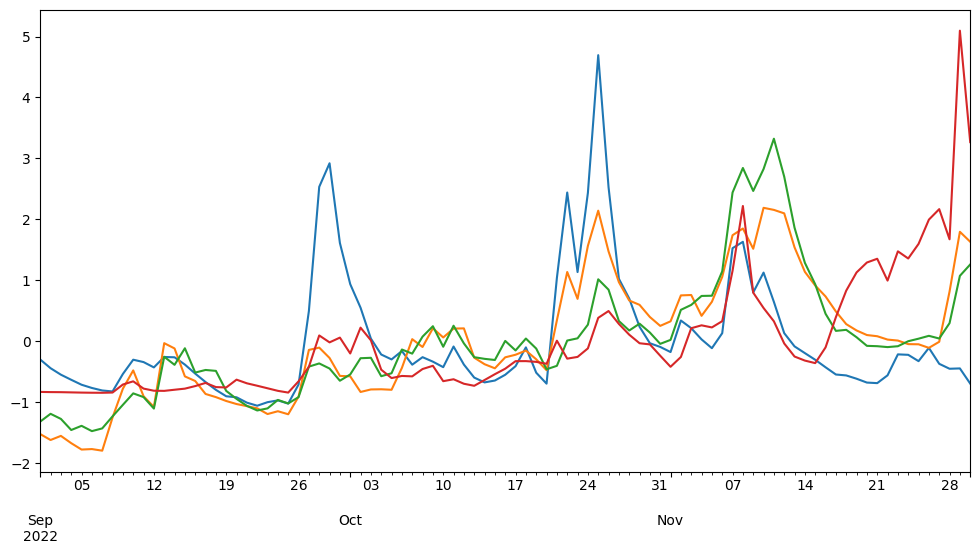

In [46]:
#1st method of scaling
df_scaled = (df-df.mean())/df.std(ddof=0)

#2nd method of scaling
df_scaled.T.loc[df_scaled.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))

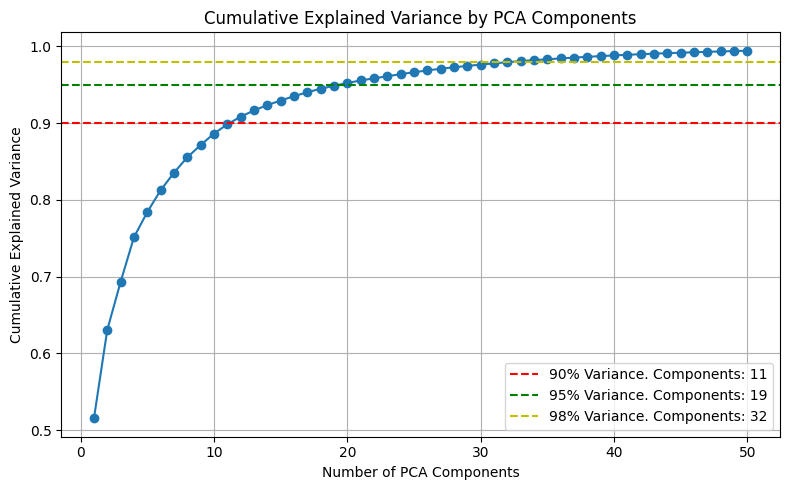

In [47]:
max_components = 50
pca_full = PCA(n_components=max_components) #remember to import PCA 
pca_full.fit(df_scaled)

explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, max_components + 1), cumulative_variance, marker='o')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of PCA Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.axhline(y=0.9, color='r', linestyle='--', label=f'90% Variance. Components: {sum(~(cumulative_variance > 0.90))}')
plt.axhline(y=0.95, color='g', linestyle='--', label=f'95% Variance. Components: {sum(~(cumulative_variance > 0.95))}')
plt.axhline(y=0.98, color='y', linestyle='--', label=f'98% Variance. Components: {sum(~(cumulative_variance > 0.98))}')
plt.legend()
plt.tight_layout()
plt.show()

In [48]:
pca = PCA(n_components=21)
pca_result = pca.fit_transform(df_scaled)
pca_result

array([[-20.24296809,  -4.29908916,  -2.10250319, ...,  -1.321659  ,
         -0.24560411,  -0.59791702],
       [-21.08587657,  -4.5536515 ,  -1.61288683, ...,  -0.99299441,
          0.14493833,  -0.51400299],
       [-21.68476313,  -5.22623399,  -1.74032896, ...,  -1.36337436,
         -0.04014715,   0.50873716],
       ...,
       [ 13.68604871,   0.06908188,   7.72332945, ...,   1.10282701,
          0.16186173,   2.03369013],
       [ 27.37507609,  -2.99596986,   9.79922092, ...,   0.60466197,
          0.25659607,  -0.77856754],
       [ 23.40255773,  -3.0963067 ,  10.92508466, ...,  -0.03908022,
         -0.30650236,  -0.29157198]], shape=(91, 21))

C:\Users\kscar\AppData\Local\Temp\ipykernel_53928\1787641122.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


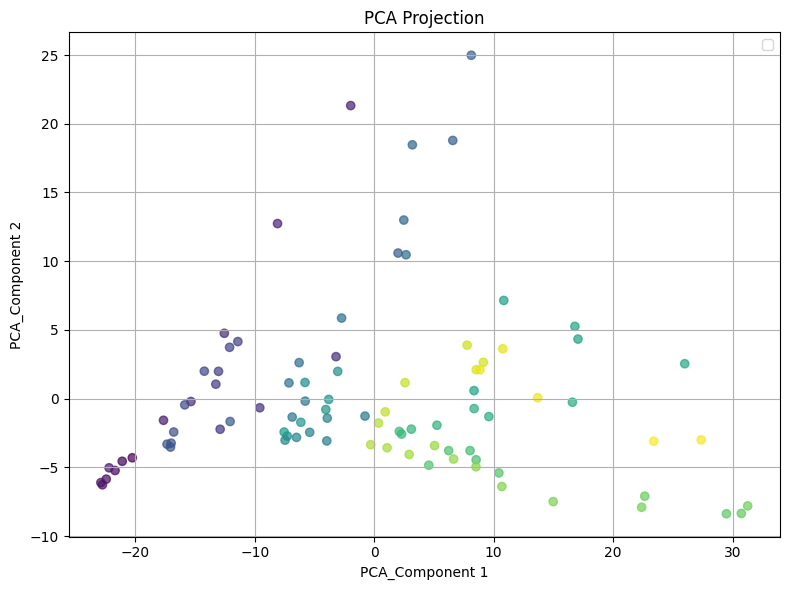

In [49]:
plt.figure(figsize=(8,6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df.index, alpha=0.7)
plt.title("PCA Projection")
plt.xlabel("PCA_Component 1")
plt.ylabel("PCA_Component 2")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


C:\Users\kscar\AppData\Local\Temp\ipykernel_53928\2567467783.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


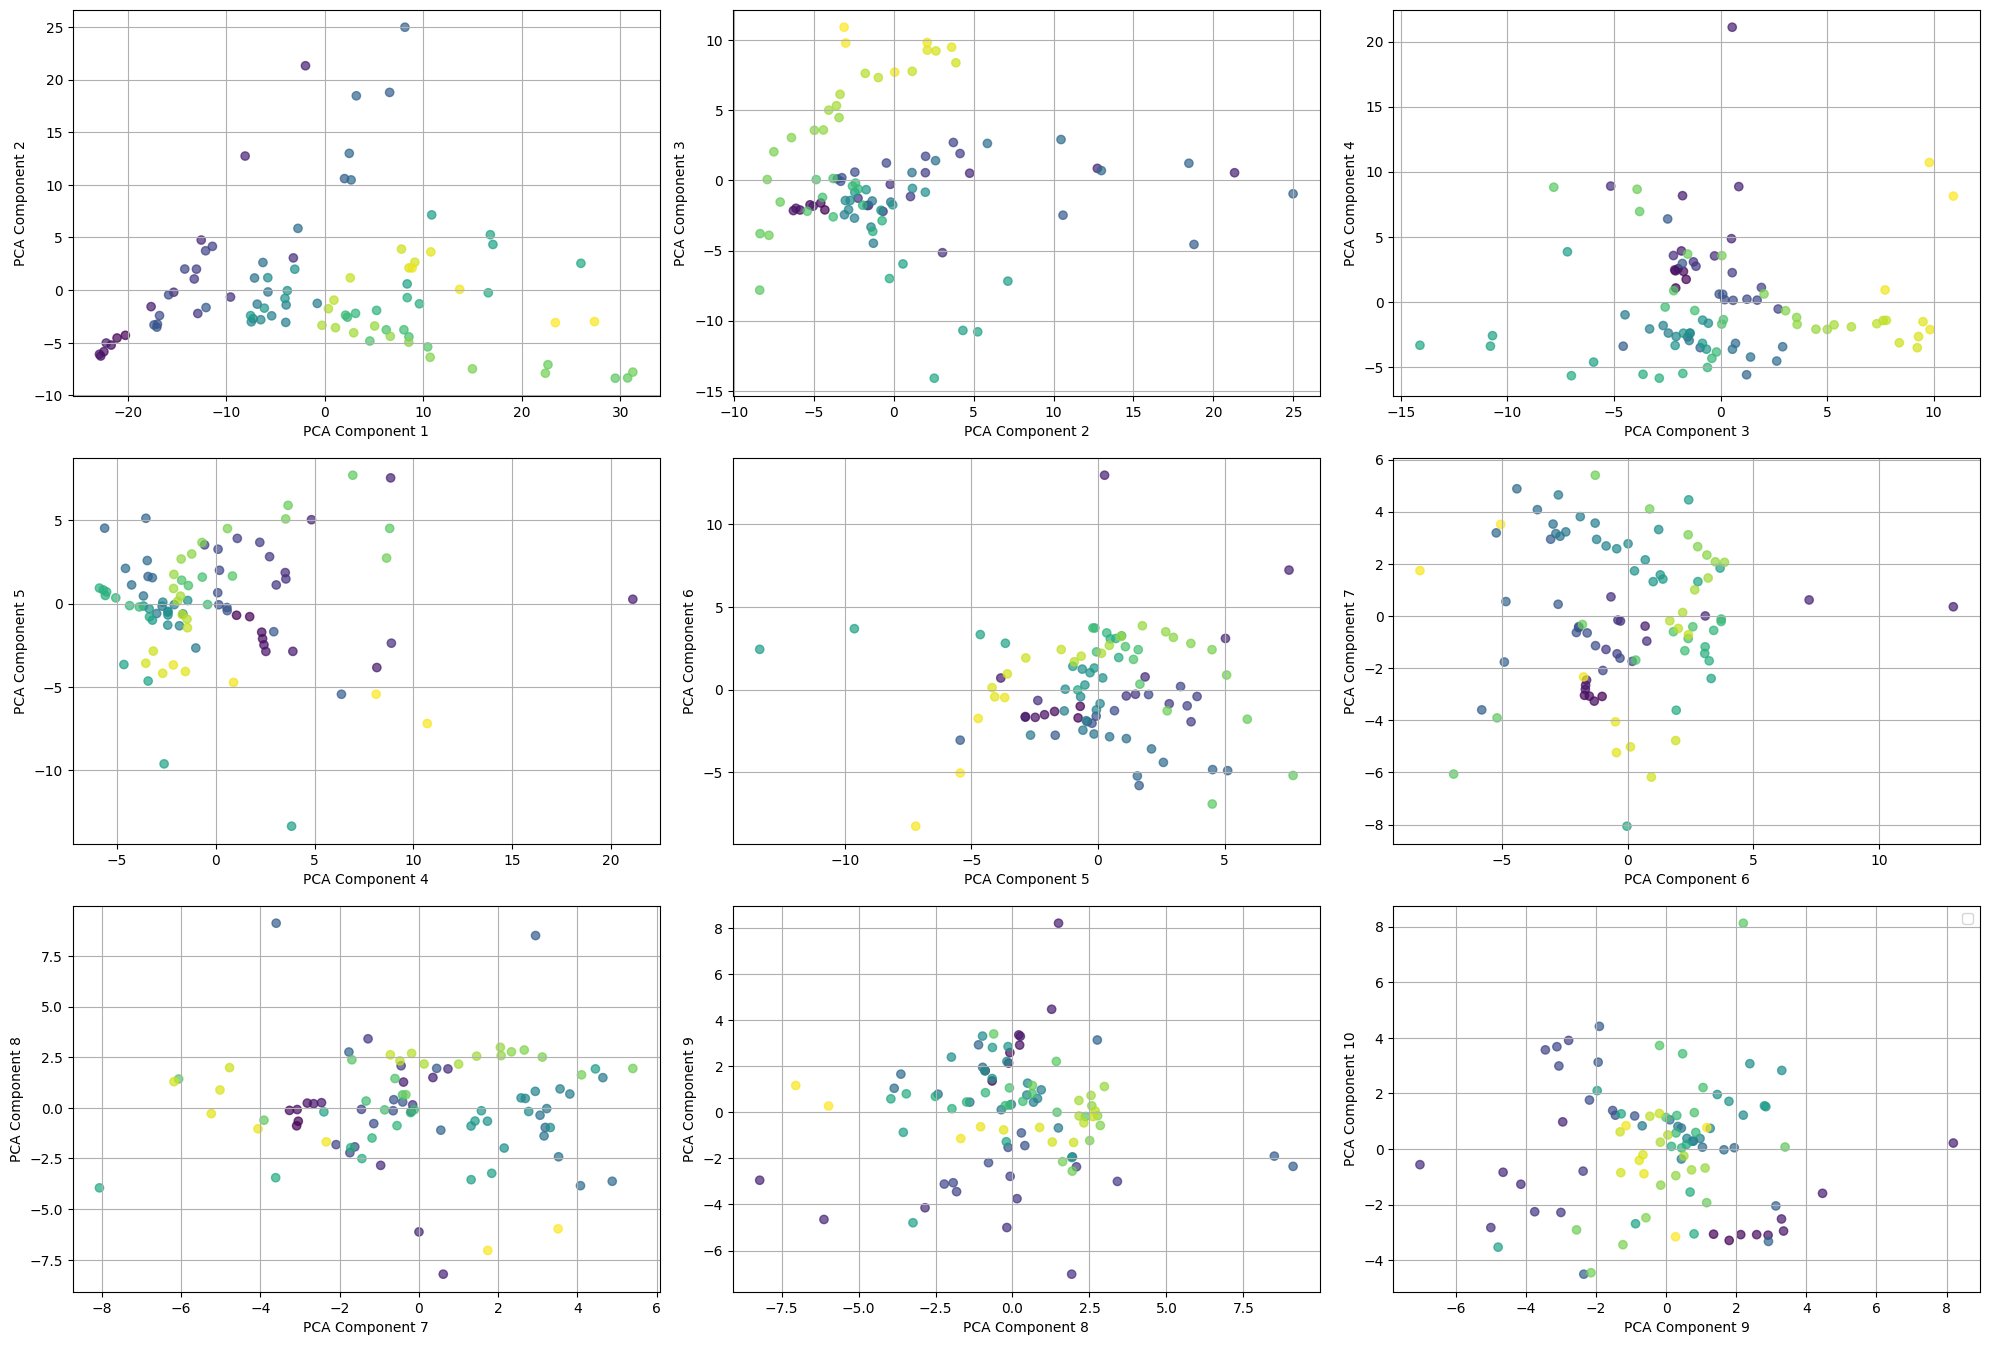

In [50]:
plt.figure(figsize=(20,40))
for i in range(9):
    plt.subplot(9, 3, i+1)
    plt.scatter(pca_result[:, i], pca_result[:, i+1], c=df.index, alpha=0.7)
    plt.xlabel(f"PCA Component {i+1}")
    plt.ylabel(f"PCA Component {i+2}")
    plt.grid(True)
    plt.tight_layout()
plt.legend()
plt.show()

In [51]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_result)

kmeans_silhouette = silhouette_score(pca_result, kmeans_labels)
kmeans_db_index = davies_bouldin_score(pca_result, kmeans_labels)
print(f"KMeans Silhouette Score is {kmeans_silhouette:.3f}")
print(f"KMeans Davies-Bouldin Index is {kmeans_db_index:.3f}")

KMeans Silhouette Score is 0.248
KMeans Davies-Bouldin Index is 1.404


<Axes: xlabel='k'>

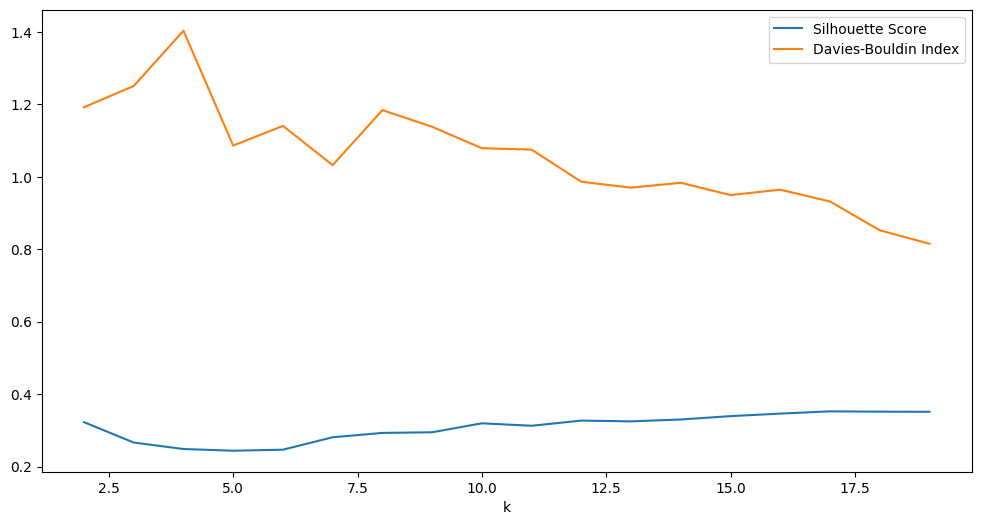

In [52]:
eval_results=[]

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(pca_result)

    db_index = davies_bouldin_score(pca_result, labels)
    silhouette = silhouette_score(pca_result, labels)

    eval_results.append({"k": k, "Silhouette Score":  silhouette, "Davies-Bouldin Index": db_index})
eval_df = pd.DataFrame(eval_results)
eval_df.plot(x="k", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.50            3         0     91               NaN   
1    0.76            3         0     91               NaN   
2    1.01            3         0     91               NaN   
3    1.27            3         1     88               NaN   
4    1.52            3         1     87               NaN   
5    1.78            3         2     84          0.038794   
6    2.03            3         3     80         -0.219190   
7    2.29            3         3     80         -0.219190   
8    2.54            3         4     74         -0.185966   
9    2.80            3         4     74         -0.185966   
10   3.05            3         5     69         -0.139068   
11   3.31            3         6     58         -0.036272   
12   3.56            3         8     51         -0.009016   
13   3.82            3         8     42          0.035914   
14   4.07            3         8     39          0.074273   
15   4.33            3         8     38          0.083665   
16   4.58            3         8     37          0.090747   
17   4.84            3         8     36          0.103973   
18   5.09            3         7     36          0.145004   
19   5.35            3         7     35          0.142856   
20   5.60            3         7     35          0.142856   
21   5.86            3         6     33          0.176837   
22   6.11            3         6     33          0.176837   
23   6.37            3         6     32          0.182735   
24   6.62            3         6     31          0.188770   
25   6.88            3         6     31          0.188770   
26   7.13            3         7     28          0.210941   
27   7.39            3         7     27          0.216614   
28   7.64            3         6     25          0.211368   
29   7.90            3         6     25          0.211368   
30   8.15            3         6     24          0.213080   
31   8.41            3         5     21          0.199248   
32   8.66            3         5     19          0.226877   
33   8.92            3         4     18          0.246182   
34   9.17            3         3     16          0.226907   
35   9.43            3         3     16          0.226907   
36   9.68            3         2     16          0.275598   
37   9.94            3         1     16               NaN   
38  10.19            3         1     16               NaN   
39  10.45            3         1     16               NaN   
40  10.70            3         1     15               NaN   
41  10.96            3         1     15               NaN   
42  11.21            3         1     15               NaN   
43  11.47            3         1     15               NaN   
44  11.72            3         1     15               NaN   
45  11.98            3         1     14               NaN   
46  12.23            3         1     13               NaN   
47  12.49            3         1     12               NaN   
48  12.74            3         1     12               NaN   
49  13.00            3         1     12               NaN   

    Davies-Bouldin Index  
0                    NaN  
1                    NaN  
2                    NaN  
3                    NaN  
4                    NaN  
5               0.791219  
6               1.557301  
7               1.557301  
8               1.512765  
9               1.512765  
10              1.600743  
11              1.651883  
12              1.649011  
13              1.829723  
14              1.814090  
15              1.810077  
16              1.802991  
17              1.807592  
18              1.839302  
19              1.835425  
20              1.835425  
21              1.826121  
22              1.826121  
23              1.832672  
24              1.854949  
25              1.854949  
26              1.678343  
27              1.635532  
28              1.638997  
29              1.638997  
30              1.667141  
31              1.788522  
32 

<Axes: xlabel='eps'>

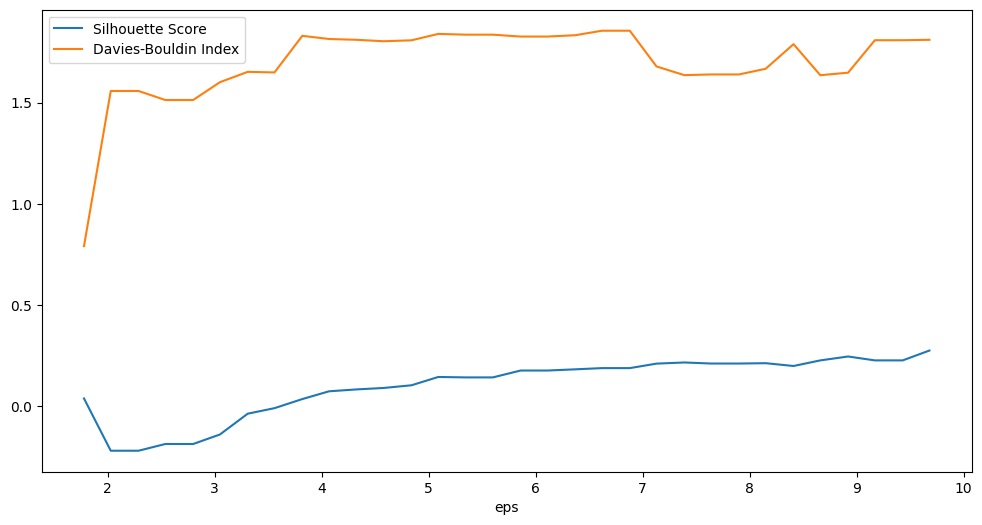

In [53]:
eps_values = np.linspace(0.5, 13.0, 50)
min_samples = 3

dbscan_results = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1:
        silhouette = silhouette_score(pca_result, labels)
        db_index = davies_bouldin_score(pca_result, labels)
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

dbscan_eval_df = pd.DataFrame(dbscan_results)
display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

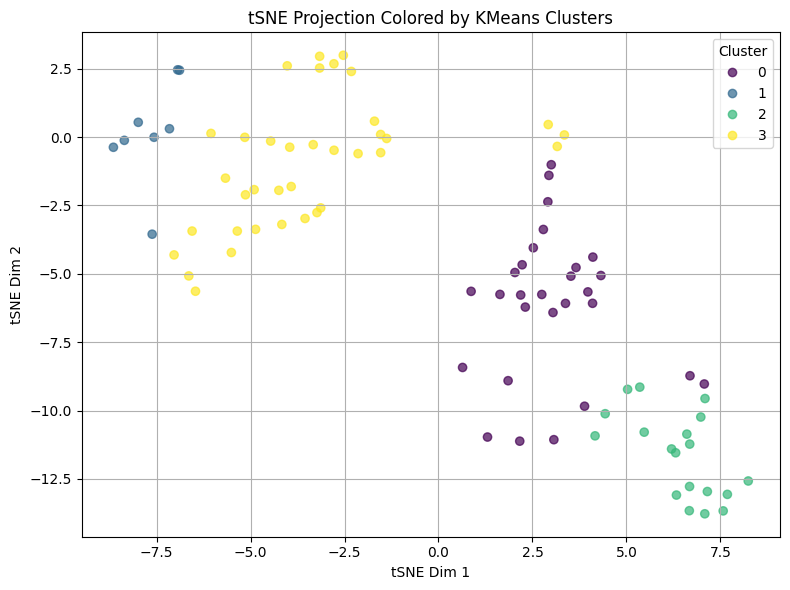

In [54]:
tSNE = TSNE(n_components=2, random_state=42, perplexity=22)
tSNE_result = tSNE.fit_transform(pca_result)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(tSNE_result[:, 0], tSNE_result[:,1], c=kmeans_labels, alpha=0.7)
plt.title("tSNE Projection Colored by KMeans Clusters")
plt.xlabel("tSNE Dim 1")
plt.ylabel("tSNE Dim 2")
plt.grid(True)
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.tight_layout()
plt.show()

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.05            2         4    331          0.987377   
1    0.05            2         4    331          0.987377   
2    0.06            2         4    331          0.987377   
3    0.06            2         4    331          0.987377   
4    0.07            2         4    331          0.987377   
..    ...          ...       ...    ...               ...   
195  0.98            2        19    130          0.218967   
196  0.99            2        20    128          0.222081   
197  0.99            2        19    128          0.414072   
198  1.00            2        19    128          0.414072   
199  1.00            2        20    124          0.400573   

     Davies-Bouldin Index  
0                0.014605  
1                0.014605  
2                0.014605  
3                0.014605  
4                0.014605  
..                    ...  
195              0.687052  
196              0.681214  
197              0.641493  
198              0.641493  
199              0.691899  

[200 rows x 6 columns]

<Axes: xlabel='eps'>

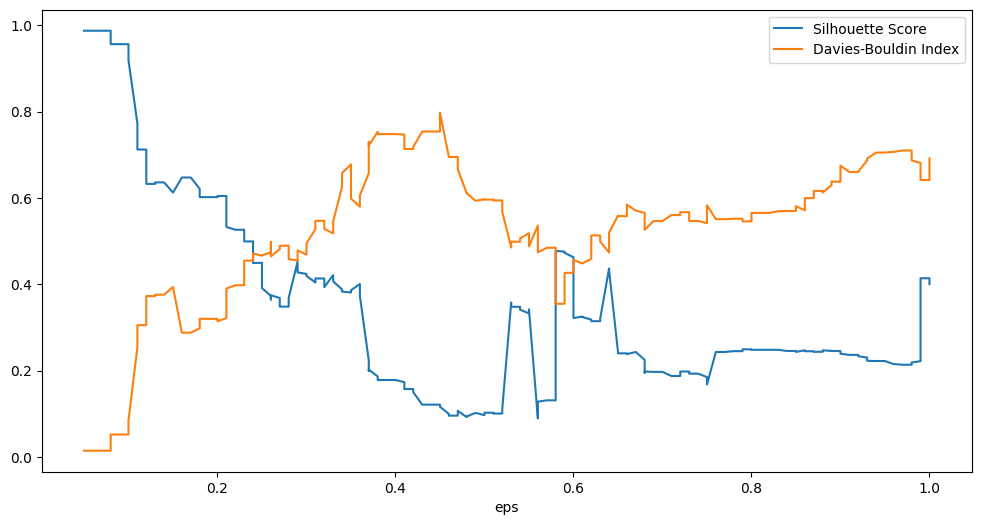

In [55]:
#For dbscan spatial plotting

data = season_df.T.copy()
data_scaled = (data - data.mean()) / data.std(ddof=0)

pca = PCA(n_components=5)
pca_result = pca.fit_transform(data_scaled)

obs_ids = data.index

eps_values = np.linspace(0.05, 1.0, 200)
min_samples = 2

dbscan_results = []

#addtions
dbscan_lavels = None
best_eps = None
best_silhouette = -999

#x = pca_result.values

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1 and n_noise < len(labels):
        mask = labels != -1
        silhouette = silhouette_score(pca_result[mask], labels[mask])
        db_index = davies_bouldin_score(pca_result[mask], labels[mask])
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

    if silhouette is not None and silhouette > best_silhouette:
        best_silhouette = silhouette
        best_labels = labels.copy()
        best_eps = eps

#saving for dbscan for spatial plotting
dbscan_eval_df = pd.DataFrame(dbscan_results)
dbscan_eval_df.to_csv(out_path / f"DBSCAN_Scores_season{str(season)}_seasonYear_{str(season_year)}.csv", index=False)

# print(f"eps={eps:.2f}, clusters={n_clusters}, noise={n_noise}")
# print("obs_ids length:", len(obs_ids))
# print("best_labels length:", len(best_labels))
# print("pca_result rows:", pca_result.shape[0])
# print("data_scaled rows:", data_scaled.shape[0])
# print("season_df.T rows:", season_df.T.shape[0])

# print("NaNs in data:", data.isna().sum().sum())
# print("NaNs in data_scaled:", data_scaled.isna().sum().sum())

#Use this file here 
dbscan_labels_df = pd.DataFrame({
    "obsstednr": obs_ids, #pca_result.index.to_list(), 
    "Cluster":best_labels,
    "eps_used": best_eps,
    "min_samples": min_samples})
dbscan_labels_df.to_csv(out_path / f"DBSCAN_Cluster_labels_season_{str(season)}_seasonYear{str(season_year)}.csv", index=False)
# from pathlib import Path



display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

#### Winter (4)

In [56]:
df = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\discharge_table_complete_seasons.csv', index_col=0, parse_dates=True)
complete_seasons = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\complete_seasons.csv', index_col=0, dtype=str)

display(df.head())
display(df.info())

10000009  10000010  10000011  10000014  10000016  10000017  \
2001-01-01  1.002974  0.756018  0.649853  0.962598  0.625556       NaN   
2001-01-02  1.426323  0.899791  0.978229  1.186935  0.983393       NaN   
2001-01-03  2.759233  1.304584  1.882787  1.893259  1.558488       NaN   
2001-01-04  2.321638  1.142382  1.593618  1.661372  1.010999       NaN   
2001-01-05  2.050273  1.142149  1.865694  1.517573  1.099160       NaN   

            1000102  1000219  1000228  1000315  ...  9000173  9000293  \
2001-01-01      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-02      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-03      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-04      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-05      NaN      NaN      NaN      NaN  ...      NaN      NaN   

            9000451  9001110  season  season_year  22000047  24000034  \
2001-01-01      NaN      NaN       4         2000  0.841516       NaN   
2001-01-02      NaN      NaN       4         2000  0.952326       NaN   
2001-01-03      NaN      NaN       4         2000  0.986051       NaN   
2001-01-04      NaN      NaN       4         2000  0.896118       NaN   
2001-01-05      NaN      NaN       4         2000  0.891301       NaN   

            25000592  26000084  
2001-01-01       NaN       NaN  
2001-01-02       NaN       NaN  
2001-01-03       NaN       NaN  
2001-01-04       NaN       NaN  
2001-01-05       NaN       NaN  

[5 rows x 572 columns]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8035 entries, 2001-01-01 to 2022-12-31
Columns: 572 entries, 10000009 to 26000084
dtypes: float64(570), int64(2)
memory usage: 35.1 MB


None

In [57]:
season = 4
season_year = 2022
season_key = f"{season_year}_{season}" 
cids = complete_seasons.loc[season_key].dropna().values
season_df = df[(df["season"] == season) & (df["season_year"] == season_year)]
#Sprint(season_df)
#print((season_df).columns)
season_df = season_df[cids] #this is where i lose dates
display(season_df.info())
season_df.to_csv("season_df.csv", index = True)
print(season_df)
print("season_df.csv")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 31 entries, 2022-12-01 to 2022-12-31
Columns: 345 entries, 10000009 to 9000451
dtypes: float64(345)
memory usage: 83.8 KB


None

            10000009  10000010  10000011  10000014  10000016  10000017  \
2022-12-01  0.802051  0.521889  0.304175  0.751133  0.450587  0.488565   
2022-12-02  0.812978  0.520797  0.308248  0.751134  0.448455  0.485879   
2022-12-03  0.849815  0.512442  0.303399  0.759342  0.437480  0.472050   
2022-12-04  0.890209  0.507140  0.297142  0.766732  0.428558  0.460809   
2022-12-05  0.866147  0.497528  0.290802  0.747421  0.420870  0.451122   
2022-12-06  0.845840  0.496839  0.289265  0.752962  0.418912  0.448654   
2022-12-07  0.838122  0.506499  0.286776  0.776166  0.427046  0.458903   
2022-12-08  0.810996  0.493101  0.271625  0.750623  0.400749  0.425769   
2022-12-09  0.795549  0.490929  0.259586  0.742561  0.392359  0.415198   
2022-12-10  0.788964  0.486414  0.247101  0.738132  0.379694  0.399240   
2022-12-11  0.769872  0.479006  0.242971  0.709887  0.365186  0.380961   
2022-12-12  0.740097  0.473176  0.239356  0.696646  0.354624  0.367652   
2022-12-13  0.711194  0.465160  0.2334

          2022-12-01  2022-12-02  2022-12-03  2022-12-04  2022-12-05  \
10000009    0.329210    0.434778    0.591087    0.749579    0.749354   
10000010   -0.182371   -0.129002   -0.093369   -0.069602   -0.062682   
10000011   -0.579922   -0.539127   -0.517473   -0.518677   -0.518082   
10000014    0.236234    0.315446    0.407537    0.485527    0.487812   
10000016   -0.312570   -0.268589   -0.245451   -0.237647   -0.231552   
...              ...         ...         ...         ...         ...   
8000001     0.620760    0.689945    0.737716    0.721490    0.679639   
9000015     2.239556    1.936901    1.806099    1.733978    1.684105   
9000172     0.202417    0.232551    0.271799    0.278691    0.286912   
9000293     2.541248    2.177771    1.821534    1.568492    1.427803   
9000451     0.446072    0.238051    0.103954    0.009033   -0.067549   

          2022-12-06  2022-12-07  2022-12-08  2022-12-09  2022-12-10  ...  \
10000009    0.724870    0.724944    0.714714    0.698975  

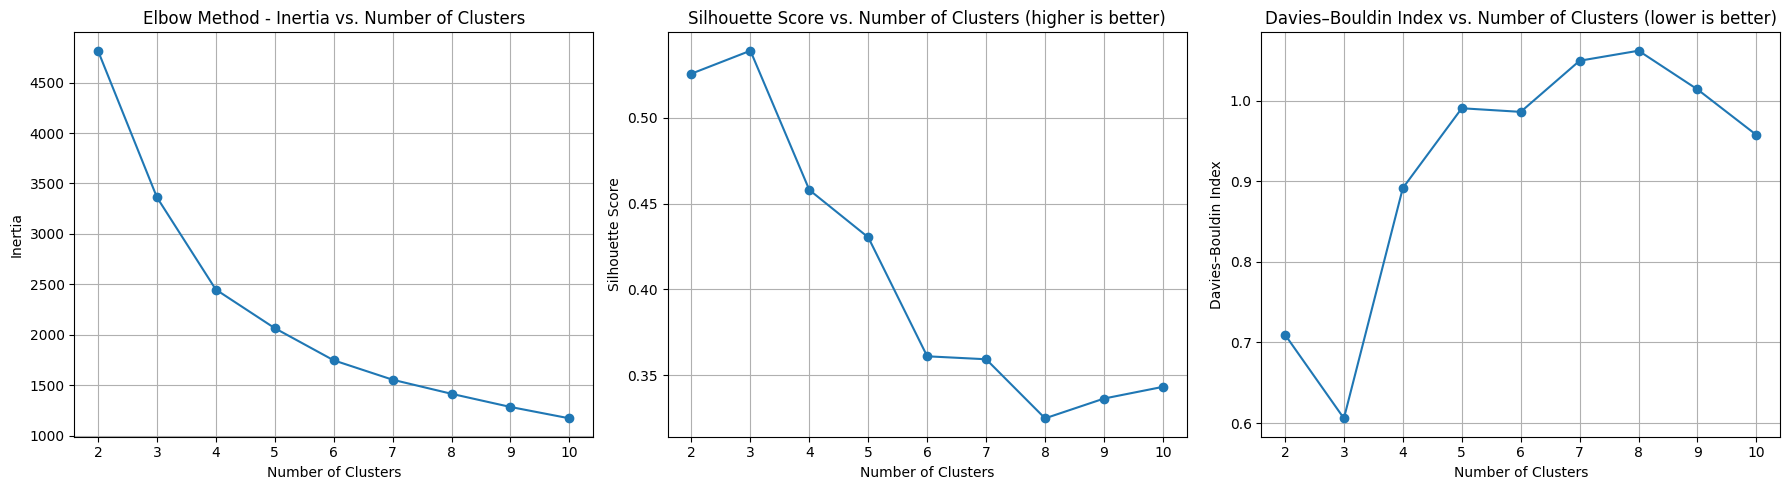

In [58]:
# Transpose the data to have catchments as rows and days as features
data = season_df.T.copy()
#print("data is: " + {data})
# Normalize each catchment's time series
# scaler = StandardScaler()
# data_scaled = scaler.fit_transform(data)
data_scaled = (data - data.mean()) / data.std(ddof=0)
print(data_scaled)
# Try different numbers of clusters and calculate the inertia, silhouette, and Davies–Bouldin
inertias = []
silhouette_scores = []
dbi_scores = []  # Davies–Bouldin Index
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, labels))
    dbi_scores.append(davies_bouldin_score(data_scaled, labels))

# Plot elbow method (inertia)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot elbow method (inertia)
axes[0].plot(cluster_range, inertias, marker='o')
axes[0].set_title('Elbow Method - Inertia vs. Number of Clusters')
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('Inertia')
axes[0].grid(True)

# Plot silhouette score
axes[1].plot(cluster_range, silhouette_scores, marker='o')
axes[1].set_title('Silhouette Score vs. Number of Clusters (higher is better)')
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('Silhouette Score')
axes[1].grid(True)

# Plot Davies–Bouldin Index
axes[2].plot(cluster_range, dbi_scores, marker='o')
axes[2].set_title('Davies–Bouldin Index vs. Number of Clusters (lower is better)')
axes[2].set_xlabel('Number of Clusters')
axes[2].set_ylabel('Davies–Bouldin Index')
axes[2].grid(True)

plt.tight_layout()
plt.show()

Cluster
10000009        1
10000010        0
10000011        0
10000014        1
10000016        0

            10000009  10000010  10000011  10000014  10000016  10000017  \
2022-12-01  0.802051  0.521889  0.304175  0.751133  0.450587  0.488565   
2022-12-02  0.812978  0.520797  0.308248  0.751134  0.448455  0.485879   
2022-12-03  0.849815  0.512442  0.303399  0.759342  0.437480  0.472050   
2022-12-04  0.890209  0.507140  0.297142  0.766732  0.428558  0.460809   
2022-12-05  0.866147  0.497528  0.290802  0.747421  0.420870  0.451122   
2022-12-06  0.845840  0.496839  0.289265  0.752962  0.418912  0.448654   
2022-12-07  0.838122  0.506499  0.286776  0.776166  0.427046  0.458903   
2022-12-08  0.810996  0.493101  0.271625  0.750623  0.400749  0.425769   
2022-12-09  0.795549  0.490929  0.259586  0.742561  0.392359  0.415198   
2022-12-10  0.788964  0.486414  0.247101  0.738132  0.379694  0.399240   
2022-12-11  0.769872  0.479006  0.242971  0.709887  0.365186  0.380961   
2022-12-12  0.740097  0.473176  0.239356  0.696646  0.354624  0.367652   
2022-12-13  0.711194  0.465160  0.2334

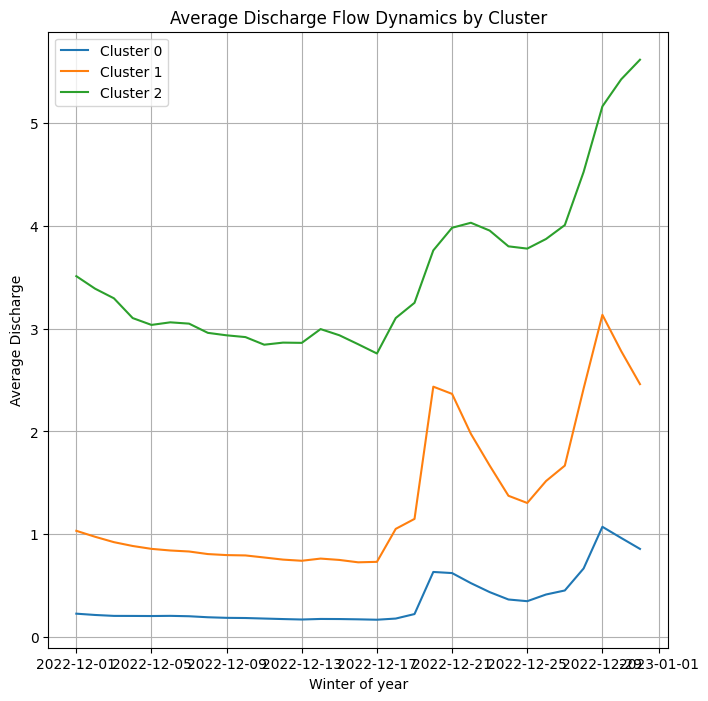

In [59]:
kmeans_final = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_final = kmeans_final.fit_predict(data_scaled)

# Assign cluster labels to each catchment
clustered_data = pd.DataFrame(index=data.index)
clustered_data['Cluster'] = labels_final
# Show the first few rows of the clustered catchments
display(clustered_data.head())

# Prepare for visualization: average discharge pattern per cluster
cluster_means = season_df.T.copy()
print(season_df.copy())
cluster_means['Cluster'] = labels_final
cluster_avg = cluster_means.groupby('Cluster').mean().T

# Plot the average discharge flow over the seaason for each cluster
plt.figure(figsize=(8, 8))
for cluster in cluster_avg.columns:
    plt.plot(cluster_avg.index, cluster_avg[cluster], label=f'Cluster {cluster}')
plt.title('Average Discharge Flow Dynamics by Cluster')
plt.xlabel('Winter of year')
plt.ylabel('Average Discharge')
plt.legend()
plt.grid(True)
plt.show()

In [60]:
from pathlib import Path

out_path = Path(r'C:\Users\kscar\Documents\Github\02807_Project\output\season_clustering')
out_path.mkdir(parents=True, exist_ok=True)
pd.DataFrame(labels_final, index=data.index, columns=['Cluster']).to_csv(out_path / f'KMeans_clustering_season_{str(season)}_seasonYear_{str(season_year)}.csv', index=True)

In [61]:
df = pd.read_csv("season_df.csv", index_col=0, parse_dates=True)
df

10000009  10000010  10000011  10000014  10000016  10000017  \
2022-12-01  0.802051  0.521889  0.304175  0.751133  0.450587  0.488565   
2022-12-02  0.812978  0.520797  0.308248  0.751134  0.448455  0.485879   
2022-12-03  0.849815  0.512442  0.303399  0.759342  0.437480  0.472050   
2022-12-04  0.890209  0.507140  0.297142  0.766732  0.428558  0.460809   
2022-12-05  0.866147  0.497528  0.290802  0.747421  0.420870  0.451122   
2022-12-06  0.845840  0.496839  0.289265  0.752962  0.418912  0.448654   
2022-12-07  0.838122  0.506499  0.286776  0.776166  0.427046  0.458903   
2022-12-08  0.810996  0.493101  0.271625  0.750623  0.400749  0.425769   
2022-12-09  0.795549  0.490929  0.259586  0.742561  0.392359  0.415198   
2022-12-10  0.788964  0.486414  0.247101  0.738132  0.379694  0.399240   
2022-12-11  0.769872  0.479006  0.242971  0.709887  0.365186  0.380961   
2022-12-12  0.740097  0.473176  0.239356  0.696646  0.354624  0.367652   
2022-12-13  0.711194  0.465160  0.233412  0.681548  0.341819  0.351519   
2022-12-14  0.711957  0.472147  0.236937  0.689495  0.341824  0.351524   
2022-12-15  0.712912  0.468057  0.262183  0.686528  0.327388  0.333335   
2022-12-16  0.778522  0.461856  0.216926  0.636659  0.278947  0.272300   
2022-12-17  0.739655  0.469790  0.230023  0.663028  0.318128  0.321667   
2022-12-18  0.733764  0.521651  0.242765  0.716779  0.357595  0.371396   
2022-12-19  0.848194  0.628330  0.358854  0.822967  0.433718  0.467310   
2022-12-20  1.577409  1.187736  1.551022  1.505425  0.894290  1.047627   
2022-12-21  2.385904  0.980775  1.043616  1.498717  0.737081  0.849545   
2022-12-22  1.647176  0.744145  0.608561  1.193077  0.674498  0.770691   
2022-12-23  1.236432  0.670044  0.469415  1.078153  0.642319  0.730145   
2022-12-24  1.000801  0.583577  0.372237  0.902295  0.553755  0.618555   
2022-12-25  0.905085  0.586890  0.347391  0.855259  0.563451  0.630772   
2022-12-26  1.027614  0.672751  0.426704  0.986161  0.667896  0.762373   
2022-12-27  1.197199  0.711026  0.506273  1.099073  0.673309  0.769193   
2022-12-28  1.509808  1.075519  1.245630  1.523981  1.030305  1.219004   
2022-12-29  2.297329  1.251847  1.374702  1.833015  1.052660  1.247172   
2022-12-30  2.387611  1.059313  1.047939  1.682578  0.908464  1.065486   
2022-12-31  1.981100  0.855645  0.719577  1.358867  0.792343  0.919174   

             1000102   1000315  11000011  11000016  ...  66000034  67000017  \
2022-12-01  0.689670  0.705105  1.685505  2.147355  ...  0.124996  0.103313   
2022-12-02  0.655704  0.675581  1.684938  1.739858  ...  0.119097  0.103305   
2022-12-03  0.624622  0.648564  1.661966  1.510291  ...  0.117310  0.129271   
2022-12-04  0.580080  0.609847  1.625574  1.363297  ...  0.125090  0.183469   
2022-12-05  0.544555  0.578968  1.573660  1.259770  ...  0.138023  0.277514   
2022-12-06  0.532923  0.568857  1.523816  1.232539  ...  0.231400  0.415000   
2022-12-07  0.585966  0.614963  1.478968  1.174932  ...  0.339016  0.523096   
2022-12-08  0.557348  0.590087  1.430357  1.096736  ...  0.318733  0.423954   
2022-12-09  0.511817  0.550511  1.395258  1.037642  ...  0.257059  0.325455   
2022-12-10  0.468518  0.512874  1.354111  0.987077  ...  0.217600  0.293076   
2022-12-11  0.451262  0.497875  1.301791  0.952017  ...  0.186036  0.278650   
2022-12-12  0.437312  0.485749  1.242758  0.906042  ...  0.235003  0.280763   
2022-12-13  0.410443  0.462394  1.201485  0.868379  ...  0.204767  0.265583   
2022-12-14  0.436193  0.484777  1.173058  0.875077  ...  0.176903  0.247440   
2022-12-15  0.363665  0.421733  1.146469  0.838418  ...  0.171185  0.209143   
2022-12-16  0.326096  0.389078  1.111025  0.793681  ...  0.098941  0.211218   
2022-12-17  0.311272  0.376192  1.086436  0.799418  ...  0.134872  0.191178   
2022-12-18  0.444065  0.491619  1.150517  1.825665  ...  0.115254  0.164542   
2022-12-19  0.852077  0.846273  1.208716  1.899806  ...  0.137781  0.168825   
2022-12-20  5.898739  5.232957  1.366629  3.561944  ...  1.0558

<Axes: >

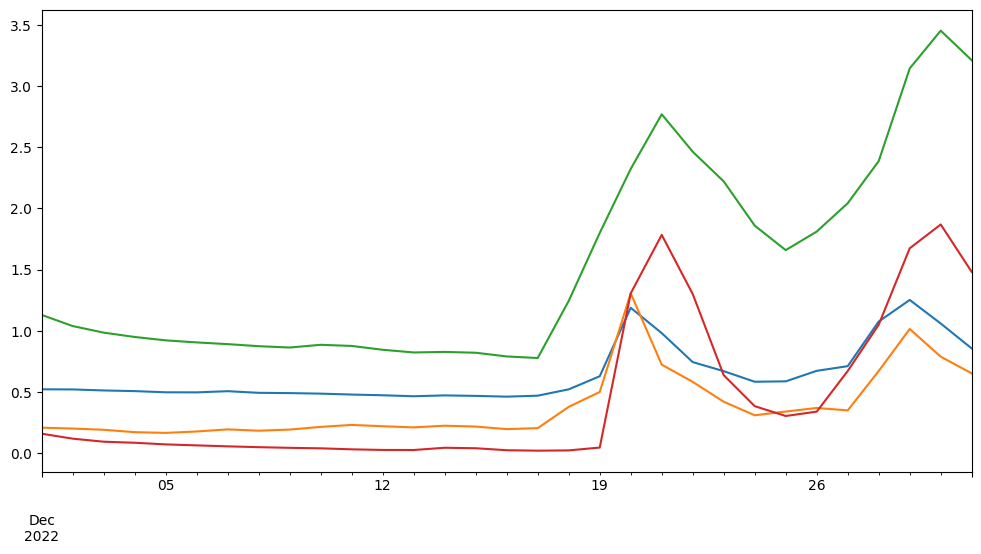

In [62]:
df.T.loc[df.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))


<Axes: >

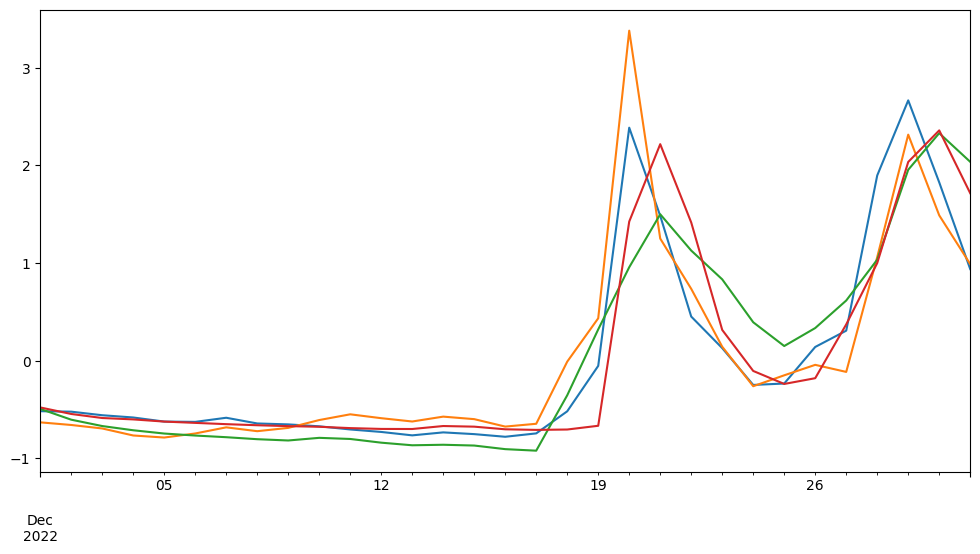

In [63]:
#1st method of scaling
df_scaled = (df-df.mean())/df.std(ddof=0)

#2nd method of scaling
df_scaled.T.loc[df_scaled.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))

In [64]:
max_components = 50
pca_full = PCA(n_components=max_components) #remember to import PCA 
pca_full.fit(df_scaled)

explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, max_components + 1), cumulative_variance, marker='o')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of PCA Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.axhline(y=0.9, color='r', linestyle='--', label=f'90% Variance. Components: {sum(~(cumulative_variance > 0.90))}')
plt.axhline(y=0.95, color='g', linestyle='--', label=f'95% Variance. Components: {sum(~(cumulative_variance > 0.95))}')
plt.axhline(y=0.98, color='y', linestyle='--', label=f'98% Variance. Components: {sum(~(cumulative_variance > 0.98))}')
plt.legend()
plt.tight_layout()
plt.show()

ValueError: n_components=50 must be between 0 and min(n_samples, n_features)=31 with svd_solver='full'

In [ ]:
pca = PCA(n_components=21)
pca_result = pca.fit_transform(df_scaled)
pca_result

array([[ 4.2592314 , -2.89864105, -3.93889336, ..., -0.47826274,
         2.6431186 ,  0.65040267],
       [ 8.39604916, -2.77324502, -6.30534042, ..., -0.96404752,
         0.64622796,  0.71129989],
       [12.23672248, -6.55741043, -9.05076093, ..., -1.22368541,
        -0.6485731 , -1.11670587],
       ...,
       [11.55054581, 18.26435142,  1.78045093, ..., -0.94873408,
        -0.48004634,  0.27199504],
       [ 8.25891056, 13.53390176,  5.31344985, ...,  0.47713375,
        -0.22180399, -0.18335606],
       [ 4.49967455,  9.92851121,  6.18044777, ...,  0.89114907,
        -0.44174347,  0.11026711]], shape=(90, 21))

C:\Users\kscar\AppData\Local\Temp\ipykernel_34284\1787641122.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


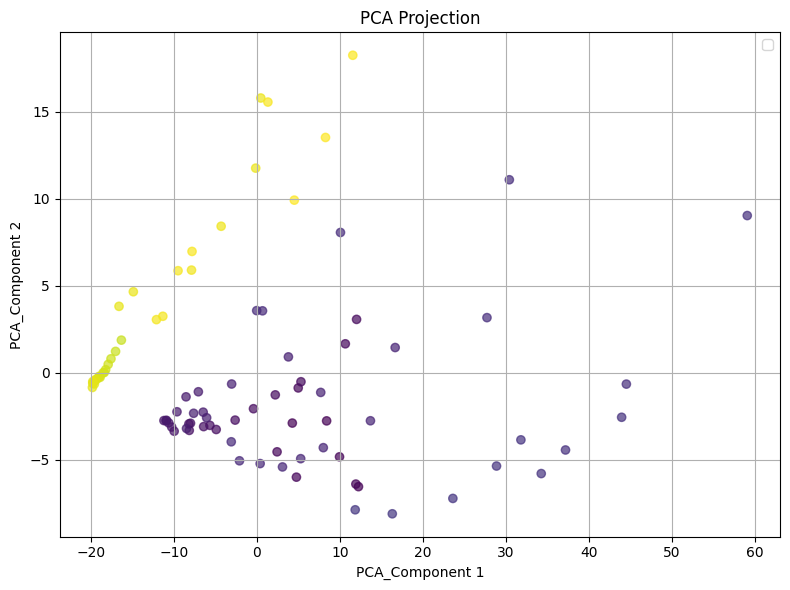

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df.index, alpha=0.7)
plt.title("PCA Projection")
plt.xlabel("PCA_Component 1")
plt.ylabel("PCA_Component 2")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


C:\Users\kscar\AppData\Local\Temp\ipykernel_34284\2567467783.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


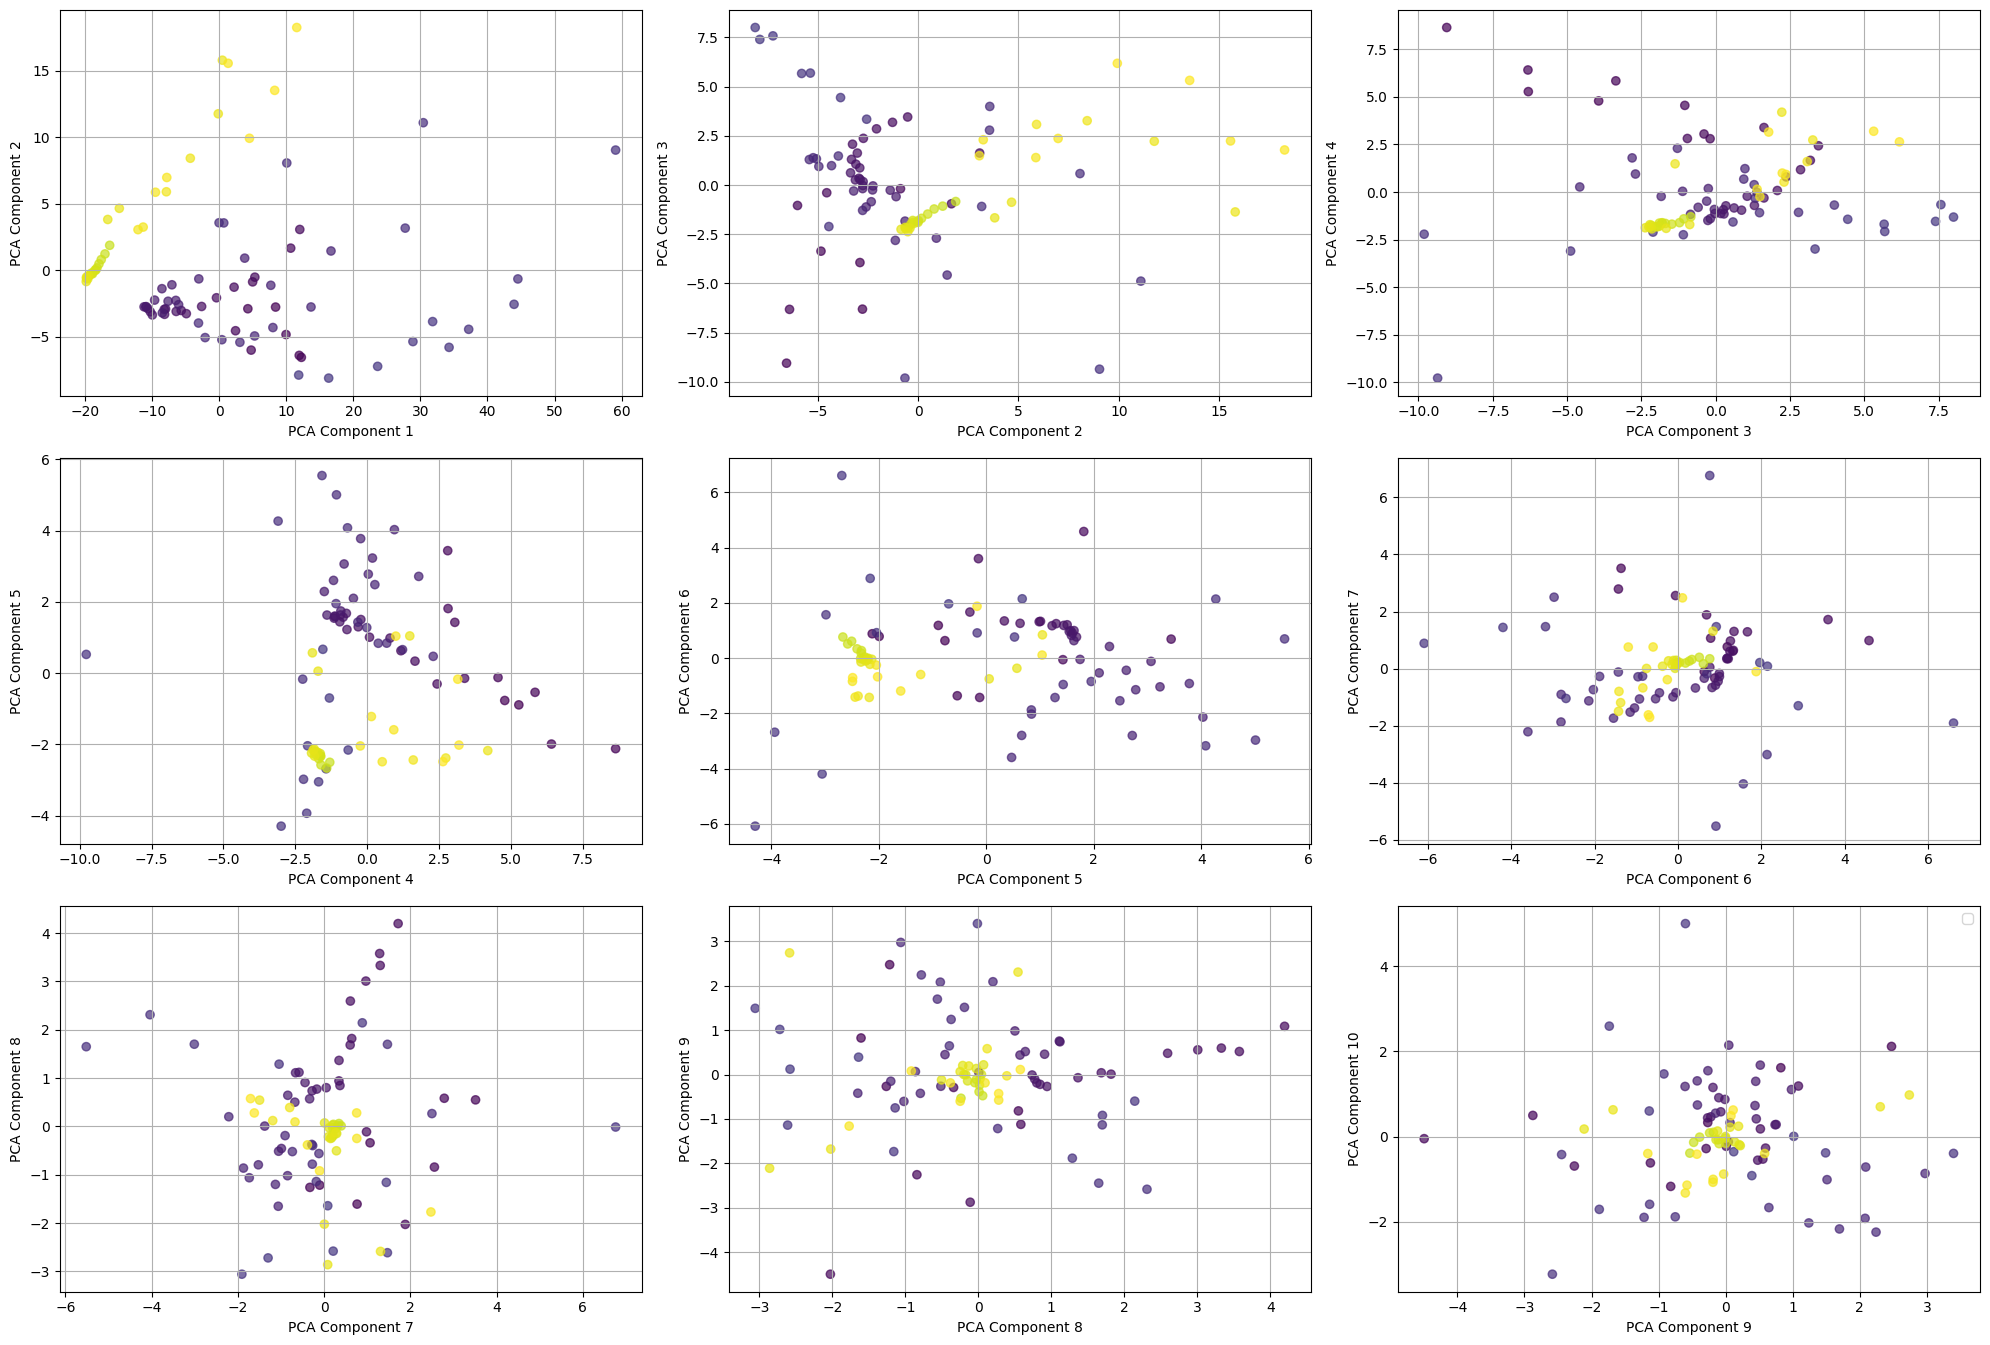

In [ ]:
plt.figure(figsize=(20,40))
for i in range(9):
    plt.subplot(9, 3, i+1)
    plt.scatter(pca_result[:, i], pca_result[:, i+1], c=df.index, alpha=0.7)
    plt.xlabel(f"PCA Component {i+1}")
    plt.ylabel(f"PCA Component {i+2}")
    plt.grid(True)
    plt.tight_layout()
plt.legend()
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_result)

kmeans_silhouette = silhouette_score(pca_result, kmeans_labels)
kmeans_db_index = davies_bouldin_score(pca_result, kmeans_labels)
print(f"KMeans Silhouette Score is {kmeans_silhouette:.3f}")
print(f"KMeans Davies-Bouldin Index is {kmeans_db_index:.3f}")

KMeans Silhouette Score is 0.367
KMeans Davies-Bouldin Index is 0.979


<Axes: xlabel='k'>

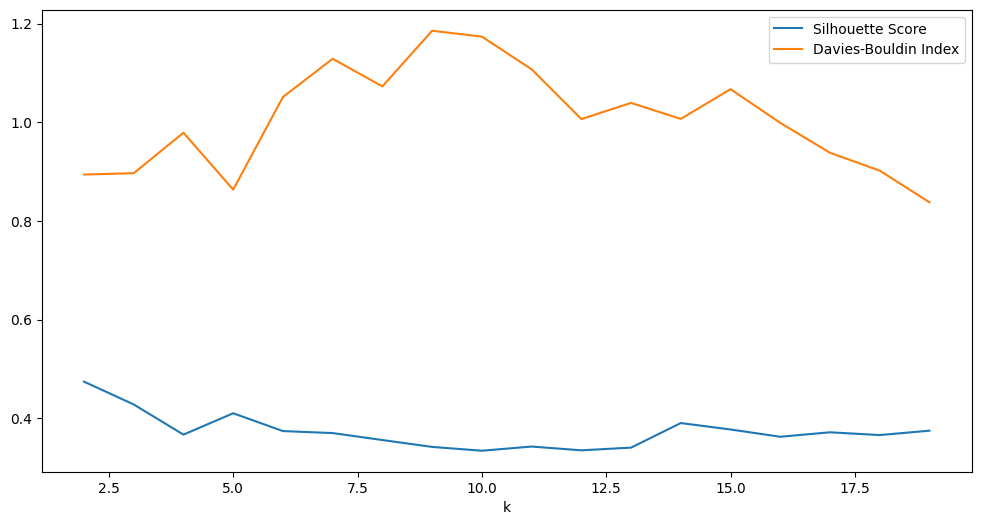

In [ ]:
eval_results=[]

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(pca_result)

    db_index = davies_bouldin_score(pca_result, labels)
    silhouette = silhouette_score(pca_result, labels)

    eval_results.append({"k": k, "Silhouette Score":  silhouette, "Davies-Bouldin Index": db_index})
eval_df = pd.DataFrame(eval_results)
eval_df.plot(x="k", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.50            3         3     80          0.001772   
1    0.76            3         2     75          0.073068   
2    1.01            3         2     71          0.014852   
3    1.27            3         2     67          0.079222   
4    1.52            3         2     67          0.079222   
5    1.78            3         3     64          0.021525   
6    2.03            3         4     61          0.039072   
7    2.29            3         2     60          0.152170   
8    2.54            3         2     58          0.179491   
9    2.80            3         4     52          0.090361   
10   3.05            3         4     46          0.092798   
11   3.31            3         3     46          0.157415   
12   3.56            3         4     42          0.181561   
13   3.82            3         4     41          0.173191   
14   4.07            3         4     41          0.173191   
15   4.33            3         4     38          0.207549   
16   4.58            3         4     38          0.207549   
17   4.84            3         4     37          0.220592   
18   5.09            3         3     37          0.270410   
19   5.35            3         3     37          0.270410   
20   5.60            3         3     37          0.270410   
21   5.86            3         3     37          0.270410   
22   6.11            3         4     31          0.151557   
23   6.37            3         3     31          0.196361   
24   6.62            3         3     27          0.224605   
25   6.88            3         3     25          0.213487   
26   7.13            3         2     25          0.279335   
27   7.39            3         2     23          0.292681   
28   7.64            3         2     23          0.292681   
29   7.90            3         2     22          0.285742   
30   8.15            3         1     22               NaN   
31   8.41            3         3     16          0.259185   
32   8.66            3         3     16          0.259185   
33   8.92            3         3     14          0.254585   
34   9.17            3         3     12          0.273824   
35   9.43            3         3      9          0.283064   
36   9.68            3         3      7          0.303437   
37   9.94            3         3      7          0.303437   
38  10.19            3         2      7          0.434621   
39  10.45            3         2      7          0.434621   
40  10.70            3         2      7          0.434621   
41  10.96            3         1      7               NaN   
42  11.21            3         1      7               NaN   
43  11.47            3         1      6               NaN   
44  11.72            3         1      6               NaN   
45  11.98            3         1      5               NaN   
46  12.23            3         1      4               NaN   
47  12.49            3         1      4               NaN   
48  12.74            3         1      4               NaN   
49  13.00            3         1      4               NaN   

    Davies-Bouldin Index  
0               0.734779  
1               0.774307  
2               0.884248  
3               0.874428  
4               0.874428  
5               1.062363  
6               1.030162  
7               0.948387  
8               0.938298  
9               1.097693  
10              1.288558  
11              1.268402  
12              1.215843  
13              1.228574  
14              1.228574  
15              1.119862  
16              1.119862  
17              1.106048  
18              0.963356  
19              0.963356  
20              0.963356  
21              0.963356  
22              1.362209  
23              1.484030  
24              1.315420  
25              1.317371  
26              1.131811  
27              1.112242  
28              1.112242  
29              1.141699  
30                   NaN  
31              1.374588  
32 

<Axes: xlabel='eps'>

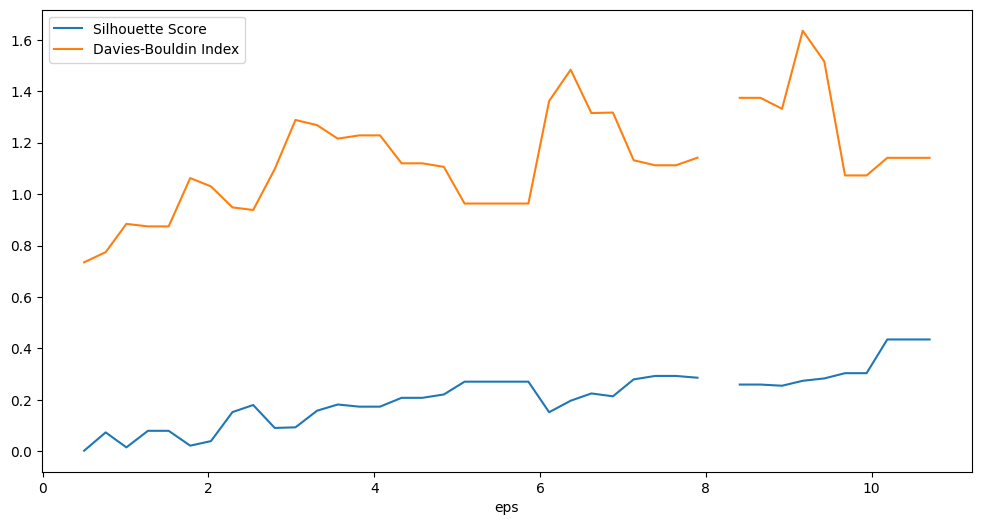

In [ ]:
eps_values = np.linspace(0.5, 13.0, 50)
min_samples = 3

dbscan_results = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1:
        silhouette = silhouette_score(pca_result, labels)
        db_index = davies_bouldin_score(pca_result, labels)
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

dbscan_eval_df = pd.DataFrame(dbscan_results)
display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

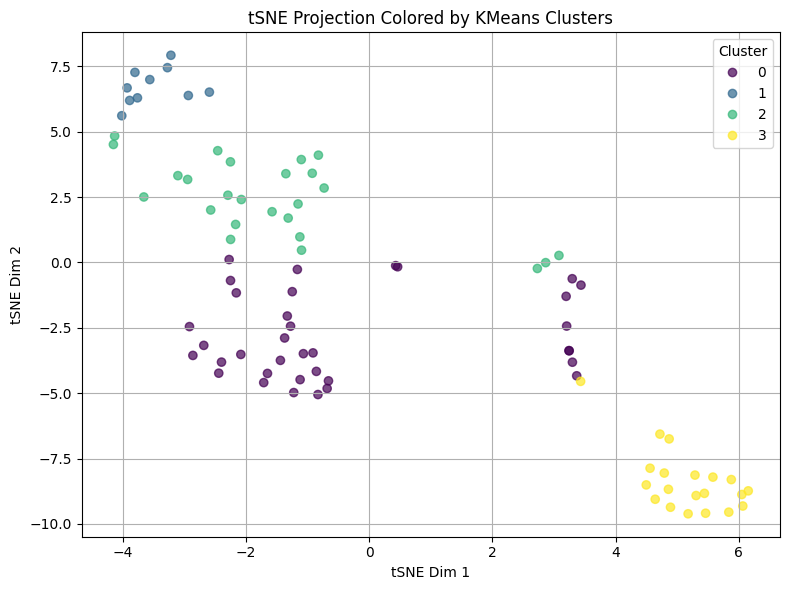

In [ ]:
tSNE = TSNE(n_components=2, random_state=42, perplexity=22)
tSNE_result = tSNE.fit_transform(pca_result)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(tSNE_result[:, 0], tSNE_result[:,1], c=kmeans_labels, alpha=0.7)
plt.title("tSNE Projection Colored by KMeans Clusters")
plt.xlabel("tSNE Dim 1")
plt.ylabel("tSNE Dim 2")
plt.grid(True)
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.tight_layout()
plt.show()

### Checking Winter (4) on a leap year with the dates

In [ ]:
df = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\discharge_table_complete_seasons.csv', index_col=0, parse_dates=True)
complete_seasons = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\complete_seasons.csv', index_col=0, dtype=str)

display(df.head())
display(df.info())

10000009  10000010  10000011  10000014  10000016  10000017  \
2001-01-01  1.002974  0.756018  0.649853  0.962598  0.625556       NaN   
2001-01-02  1.426323  0.899791  0.978229  1.186935  0.983393       NaN   
2001-01-03  2.759233  1.304584  1.882787  1.893259  1.558488       NaN   
2001-01-04  2.321638  1.142382  1.593618  1.661372  1.010999       NaN   
2001-01-05  2.050273  1.142149  1.865694  1.517573  1.099160       NaN   

            1000102  1000219  1000228  1000315  ...  9000173  9000293  \
2001-01-01      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-02      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-03      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-04      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-05      NaN      NaN      NaN      NaN  ...      NaN      NaN   

            9000451  9001110  season  season_year  22000047  24000034  \
2001-01-01      NaN      NaN       4         2001  0.841516       NaN   
2001-01-02      NaN      NaN       4         2001  0.952326       NaN   
2001-01-03      NaN      NaN       4         2001  0.986051       NaN   
2001-01-04      NaN      NaN       4         2001  0.896118       NaN   
2001-01-05      NaN      NaN       4         2001  0.891301       NaN   

            25000592  26000084  
2001-01-01       NaN       NaN  
2001-01-02       NaN       NaN  
2001-01-03       NaN       NaN  
2001-01-04       NaN       NaN  
2001-01-05       NaN       NaN  

[5 rows x 572 columns]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8035 entries, 2001-01-01 to 2022-12-31
Columns: 572 entries, 10000009 to 26000084
dtypes: float64(570), int64(2)
memory usage: 35.1 MB


None

In [ ]:
season = 4
season_year = 2004
season_key = f"{season_year}_{season}" 
cids = complete_seasons.loc[season_key].dropna().values
season_df = df[(df["season"] == season) & (df["season_year"] == season_year)]
#Sprint(season_df)
#print((season_df).columns)
season_df = season_df[cids]
display(season_df.info())
season_df.to_csv("season_df.csv", index = True)
print(season_df)
print("season_df.csv")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 91 entries, 2004-01-01 to 2004-12-31
Columns: 286 entries, 10000009 to 22000047
dtypes: float64(286)
memory usage: 204.0 KB


None

            10000009  10000010  10000011  10000014  10000016  11000011  \
2004-01-01  0.942958  0.713549  0.783396  0.984974  0.490971  1.679079   
2004-01-02  0.846848  0.664079  0.657984  0.932536  0.471459  1.626201   
2004-01-03  0.777079  0.631390  0.586870  0.890846  0.458444  1.569800   
2004-01-04  0.753032  0.603466  0.549295  0.869535  0.452599  1.461291   
2004-01-05  0.716668  0.580246  0.503097  0.843095  0.439290  1.409917   
...              ...       ...       ...       ...       ...       ...   
2004-12-27  1.760482  0.819894  0.993936  1.236013  0.681884  1.779724   
2004-12-28  1.366157  0.744321  0.754568  1.108504  0.651860  1.752514   
2004-12-29  1.244613  0.715655  0.692571  1.060429  0.620657  1.759572   
2004-12-30  1.330026  0.801629  0.822972  1.150306  0.783501  1.716153   
2004-12-31  1.650124  0.860947  0.983927  1.272730  0.780074  1.721456   

            11000016  13000011  13000019  14000016  ...  64000033  66000014  \
2004-01-01  1.278384  0.740774  

### Winter (4) with loop method for more accurate representation

In [65]:
df = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\discharge_table_complete_seasons.csv', index_col=0, parse_dates=True)
complete_seasons = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\complete_seasons.csv', index_col=0, dtype=str)

display(df.head())
display(df.info())

10000009  10000010  10000011  10000014  10000016  10000017  \
2001-01-01  1.002974  0.756018  0.649853  0.962598  0.625556       NaN   
2001-01-02  1.426323  0.899791  0.978229  1.186935  0.983393       NaN   
2001-01-03  2.759233  1.304584  1.882787  1.893259  1.558488       NaN   
2001-01-04  2.321638  1.142382  1.593618  1.661372  1.010999       NaN   
2001-01-05  2.050273  1.142149  1.865694  1.517573  1.099160       NaN   

            1000102  1000219  1000228  1000315  ...  9000173  9000293  \
2001-01-01      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-02      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-03      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-04      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-05      NaN      NaN      NaN      NaN  ...      NaN      NaN   

            9000451  9001110  season  season_year  22000047  24000034  \
2001-01-01      NaN      NaN       4         2000  0.841516       NaN   
2001-01-02      NaN      NaN       4         2000  0.952326       NaN   
2001-01-03      NaN      NaN       4         2000  0.986051       NaN   
2001-01-04      NaN      NaN       4         2000  0.896118       NaN   
2001-01-05      NaN      NaN       4         2000  0.891301       NaN   

            25000592  26000084  
2001-01-01       NaN       NaN  
2001-01-02       NaN       NaN  
2001-01-03       NaN       NaN  
2001-01-04       NaN       NaN  
2001-01-05       NaN       NaN  

[5 rows x 572 columns]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8035 entries, 2001-01-01 to 2022-12-31
Columns: 572 entries, 10000009 to 26000084
dtypes: float64(570), int64(2)
memory usage: 35.1 MB


None

In [66]:
season = 4
season_year = 2022 # by definition of meteorological winter, this is winter 2021
season_key = f"{season_year}_{season}" 
cids = complete_seasons.loc[season_key].dropna().values
season_df = df[(df["season"] == season) & (df["season_year"] == season_year)]
#Sprint(season_df)
#print((season_df).columns)
season_df = season_df[cids] #this is where i lose dates
display(season_df.info())
season_df.to_csv("season_df.csv", index = True)
print(season_df)
print("season_df.csv")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 31 entries, 2022-12-01 to 2022-12-31
Columns: 345 entries, 10000009 to 9000451
dtypes: float64(345)
memory usage: 83.8 KB


None

            10000009  10000010  10000011  10000014  10000016  10000017  \
2022-12-01  0.802051  0.521889  0.304175  0.751133  0.450587  0.488565   
2022-12-02  0.812978  0.520797  0.308248  0.751134  0.448455  0.485879   
2022-12-03  0.849815  0.512442  0.303399  0.759342  0.437480  0.472050   
2022-12-04  0.890209  0.507140  0.297142  0.766732  0.428558  0.460809   
2022-12-05  0.866147  0.497528  0.290802  0.747421  0.420870  0.451122   
2022-12-06  0.845840  0.496839  0.289265  0.752962  0.418912  0.448654   
2022-12-07  0.838122  0.506499  0.286776  0.776166  0.427046  0.458903   
2022-12-08  0.810996  0.493101  0.271625  0.750623  0.400749  0.425769   
2022-12-09  0.795549  0.490929  0.259586  0.742561  0.392359  0.415198   
2022-12-10  0.788964  0.486414  0.247101  0.738132  0.379694  0.399240   
2022-12-11  0.769872  0.479006  0.242971  0.709887  0.365186  0.380961   
2022-12-12  0.740097  0.473176  0.239356  0.696646  0.354624  0.367652   
2022-12-13  0.711194  0.465160  0.2334

          2022-12-01  2022-12-02  2022-12-03  2022-12-04  2022-12-05  \
10000009    0.329210    0.434778    0.591087    0.749579    0.749354   
10000010   -0.182371   -0.129002   -0.093369   -0.069602   -0.062682   
10000011   -0.579922   -0.539127   -0.517473   -0.518677   -0.518082   
10000014    0.236234    0.315446    0.407537    0.485527    0.487812   
10000016   -0.312570   -0.268589   -0.245451   -0.237647   -0.231552   
...              ...         ...         ...         ...         ...   
8000001     0.620760    0.689945    0.737716    0.721490    0.679639   
9000015     2.239556    1.936901    1.806099    1.733978    1.684105   
9000172     0.202417    0.232551    0.271799    0.278691    0.286912   
9000293     2.541248    2.177771    1.821534    1.568492    1.427803   
9000451     0.446072    0.238051    0.103954    0.009033   -0.067549   

          2022-12-06  2022-12-07  2022-12-08  2022-12-09  2022-12-10  ...  \
10000009    0.724870    0.724944    0.714714    0.698975  

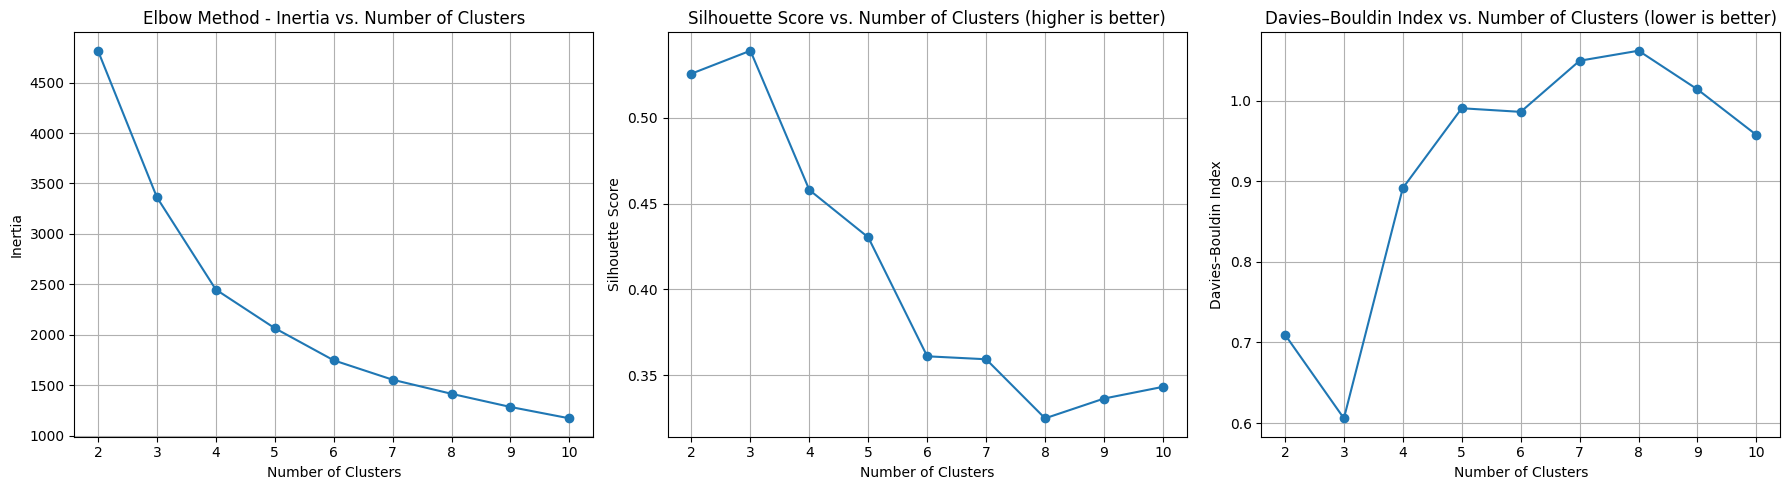

In [67]:
# Transpose the data to have catchments as rows and days as features
data = season_df.T.copy()
#print("data is: " + {data})
# Normalize each catchment's time series
# scaler = StandardScaler()
# data_scaled = scaler.fit_transform(data)
data_scaled = (data - data.mean()) / data.std(ddof=0)
print(data_scaled)
# Try different numbers of clusters and calculate the inertia, silhouette, and Davies–Bouldin
inertias = []
silhouette_scores = []
dbi_scores = []  # Davies–Bouldin Index
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, labels))
    dbi_scores.append(davies_bouldin_score(data_scaled, labels))

# Plot elbow method (inertia)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot elbow method (inertia)
axes[0].plot(cluster_range, inertias, marker='o')
axes[0].set_title('Elbow Method - Inertia vs. Number of Clusters')
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('Inertia')
axes[0].grid(True)

# Plot silhouette score
axes[1].plot(cluster_range, silhouette_scores, marker='o')
axes[1].set_title('Silhouette Score vs. Number of Clusters (higher is better)')
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('Silhouette Score')
axes[1].grid(True)

# Plot Davies–Bouldin Index
axes[2].plot(cluster_range, dbi_scores, marker='o')
axes[2].set_title('Davies–Bouldin Index vs. Number of Clusters (lower is better)')
axes[2].set_xlabel('Number of Clusters')
axes[2].set_ylabel('Davies–Bouldin Index')
axes[2].grid(True)

plt.tight_layout()
plt.show()

Cluster
10000009        1
10000010        0
10000011        0
10000014        1
10000016        0

            10000009  10000010  10000011  10000014  10000016  10000017  \
2022-12-01  0.802051  0.521889  0.304175  0.751133  0.450587  0.488565   
2022-12-02  0.812978  0.520797  0.308248  0.751134  0.448455  0.485879   
2022-12-03  0.849815  0.512442  0.303399  0.759342  0.437480  0.472050   
2022-12-04  0.890209  0.507140  0.297142  0.766732  0.428558  0.460809   
2022-12-05  0.866147  0.497528  0.290802  0.747421  0.420870  0.451122   
2022-12-06  0.845840  0.496839  0.289265  0.752962  0.418912  0.448654   
2022-12-07  0.838122  0.506499  0.286776  0.776166  0.427046  0.458903   
2022-12-08  0.810996  0.493101  0.271625  0.750623  0.400749  0.425769   
2022-12-09  0.795549  0.490929  0.259586  0.742561  0.392359  0.415198   
2022-12-10  0.788964  0.486414  0.247101  0.738132  0.379694  0.399240   
2022-12-11  0.769872  0.479006  0.242971  0.709887  0.365186  0.380961   
2022-12-12  0.740097  0.473176  0.239356  0.696646  0.354624  0.367652   
2022-12-13  0.711194  0.465160  0.2334

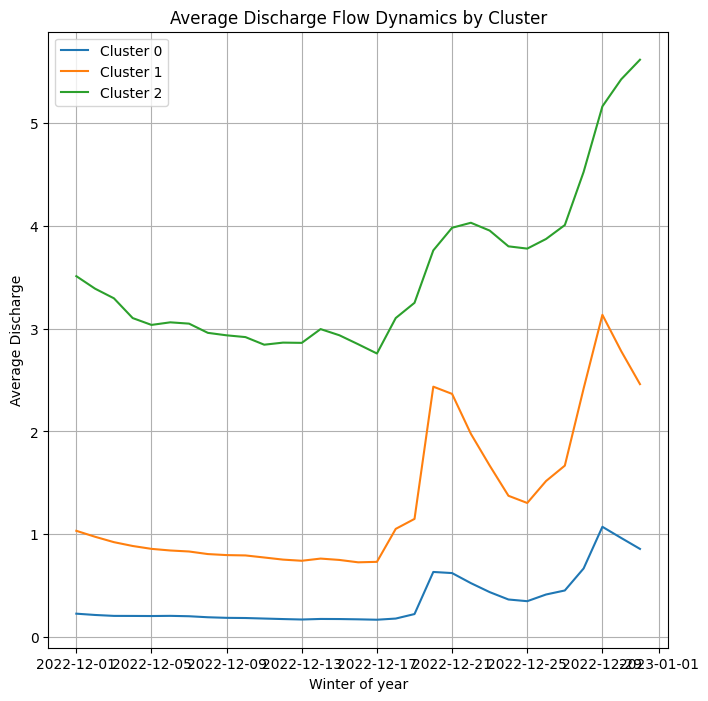

In [68]:
kmeans_final = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_final = kmeans_final.fit_predict(data_scaled)

# Assign cluster labels to each catchment
clustered_data = pd.DataFrame(index=data.index)
clustered_data['Cluster'] = labels_final
# Show the first few rows of the clustered catchments
display(clustered_data.head())

# Prepare for visualization: average discharge pattern per cluster
cluster_means = season_df.T.copy()
print(season_df.copy())
cluster_means['Cluster'] = labels_final
cluster_avg = cluster_means.groupby('Cluster').mean().T

# Plot the average discharge flow over the seaason for each cluster
plt.figure(figsize=(8, 8))
for cluster in cluster_avg.columns:
    plt.plot(cluster_avg.index, cluster_avg[cluster], label=f'Cluster {cluster}')
plt.title('Average Discharge Flow Dynamics by Cluster')
plt.xlabel('Winter of year')
plt.ylabel('Average Discharge')
plt.legend()
plt.grid(True)
plt.show()

In [69]:
from pathlib import Path

out_path = Path(r'C:\Users\kscar\Documents\Github\02807_Project\output\season_clustering')
out_path.mkdir(parents=True, exist_ok=True)
pd.DataFrame(labels_final, index=data.index, columns=['Cluster']).to_csv(out_path / f'KMeans_clustering_season_{str(season)}_seasonYear_{str(season_year)}.csv', index=True)

In [70]:
df = pd.read_csv("season_df.csv", index_col=0, parse_dates=True)
df

10000009  10000010  10000011  10000014  10000016  10000017  \
2022-12-01  0.802051  0.521889  0.304175  0.751133  0.450587  0.488565   
2022-12-02  0.812978  0.520797  0.308248  0.751134  0.448455  0.485879   
2022-12-03  0.849815  0.512442  0.303399  0.759342  0.437480  0.472050   
2022-12-04  0.890209  0.507140  0.297142  0.766732  0.428558  0.460809   
2022-12-05  0.866147  0.497528  0.290802  0.747421  0.420870  0.451122   
2022-12-06  0.845840  0.496839  0.289265  0.752962  0.418912  0.448654   
2022-12-07  0.838122  0.506499  0.286776  0.776166  0.427046  0.458903   
2022-12-08  0.810996  0.493101  0.271625  0.750623  0.400749  0.425769   
2022-12-09  0.795549  0.490929  0.259586  0.742561  0.392359  0.415198   
2022-12-10  0.788964  0.486414  0.247101  0.738132  0.379694  0.399240   
2022-12-11  0.769872  0.479006  0.242971  0.709887  0.365186  0.380961   
2022-12-12  0.740097  0.473176  0.239356  0.696646  0.354624  0.367652   
2022-12-13  0.711194  0.465160  0.233412  0.681548  0.341819  0.351519   
2022-12-14  0.711957  0.472147  0.236937  0.689495  0.341824  0.351524   
2022-12-15  0.712912  0.468057  0.262183  0.686528  0.327388  0.333335   
2022-12-16  0.778522  0.461856  0.216926  0.636659  0.278947  0.272300   
2022-12-17  0.739655  0.469790  0.230023  0.663028  0.318128  0.321667   
2022-12-18  0.733764  0.521651  0.242765  0.716779  0.357595  0.371396   
2022-12-19  0.848194  0.628330  0.358854  0.822967  0.433718  0.467310   
2022-12-20  1.577409  1.187736  1.551022  1.505425  0.894290  1.047627   
2022-12-21  2.385904  0.980775  1.043616  1.498717  0.737081  0.849545   
2022-12-22  1.647176  0.744145  0.608561  1.193077  0.674498  0.770691   
2022-12-23  1.236432  0.670044  0.469415  1.078153  0.642319  0.730145   
2022-12-24  1.000801  0.583577  0.372237  0.902295  0.553755  0.618555   
2022-12-25  0.905085  0.586890  0.347391  0.855259  0.563451  0.630772   
2022-12-26  1.027614  0.672751  0.426704  0.986161  0.667896  0.762373   
2022-12-27  1.197199  0.711026  0.506273  1.099073  0.673309  0.769193   
2022-12-28  1.509808  1.075519  1.245630  1.523981  1.030305  1.219004   
2022-12-29  2.297329  1.251847  1.374702  1.833015  1.052660  1.247172   
2022-12-30  2.387611  1.059313  1.047939  1.682578  0.908464  1.065486   
2022-12-31  1.981100  0.855645  0.719577  1.358867  0.792343  0.919174   

             1000102   1000315  11000011  11000016  ...  66000034  67000017  \
2022-12-01  0.689670  0.705105  1.685505  2.147355  ...  0.124996  0.103313   
2022-12-02  0.655704  0.675581  1.684938  1.739858  ...  0.119097  0.103305   
2022-12-03  0.624622  0.648564  1.661966  1.510291  ...  0.117310  0.129271   
2022-12-04  0.580080  0.609847  1.625574  1.363297  ...  0.125090  0.183469   
2022-12-05  0.544555  0.578968  1.573660  1.259770  ...  0.138023  0.277514   
2022-12-06  0.532923  0.568857  1.523816  1.232539  ...  0.231400  0.415000   
2022-12-07  0.585966  0.614963  1.478968  1.174932  ...  0.339016  0.523096   
2022-12-08  0.557348  0.590087  1.430357  1.096736  ...  0.318733  0.423954   
2022-12-09  0.511817  0.550511  1.395258  1.037642  ...  0.257059  0.325455   
2022-12-10  0.468518  0.512874  1.354111  0.987077  ...  0.217600  0.293076   
2022-12-11  0.451262  0.497875  1.301791  0.952017  ...  0.186036  0.278650   
2022-12-12  0.437312  0.485749  1.242758  0.906042  ...  0.235003  0.280763   
2022-12-13  0.410443  0.462394  1.201485  0.868379  ...  0.204767  0.265583   
2022-12-14  0.436193  0.484777  1.173058  0.875077  ...  0.176903  0.247440   
2022-12-15  0.363665  0.421733  1.146469  0.838418  ...  0.171185  0.209143   
2022-12-16  0.326096  0.389078  1.111025  0.793681  ...  0.098941  0.211218   
2022-12-17  0.311272  0.376192  1.086436  0.799418  ...  0.134872  0.191178   
2022-12-18  0.444065  0.491619  1.150517  1.825665  ...  0.115254  0.164542   
2022-12-19  0.852077  0.846273  1.208716  1.899806  ...  0.137781  0.168825   
2022-12-20  5.898739  5.232957  1.366629  3.561944  ...  1.0558

<Axes: >

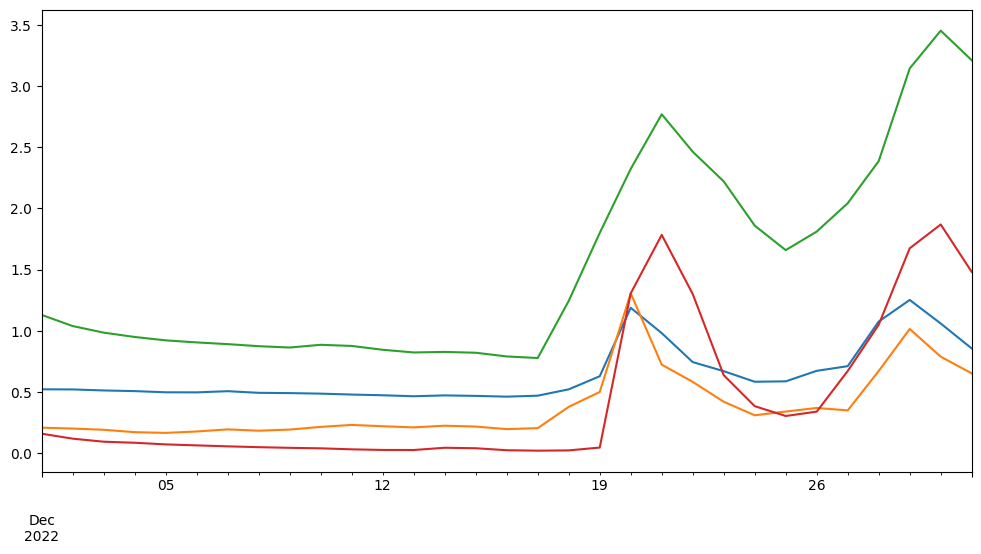

In [71]:
df.T.loc[df.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))


<Axes: >

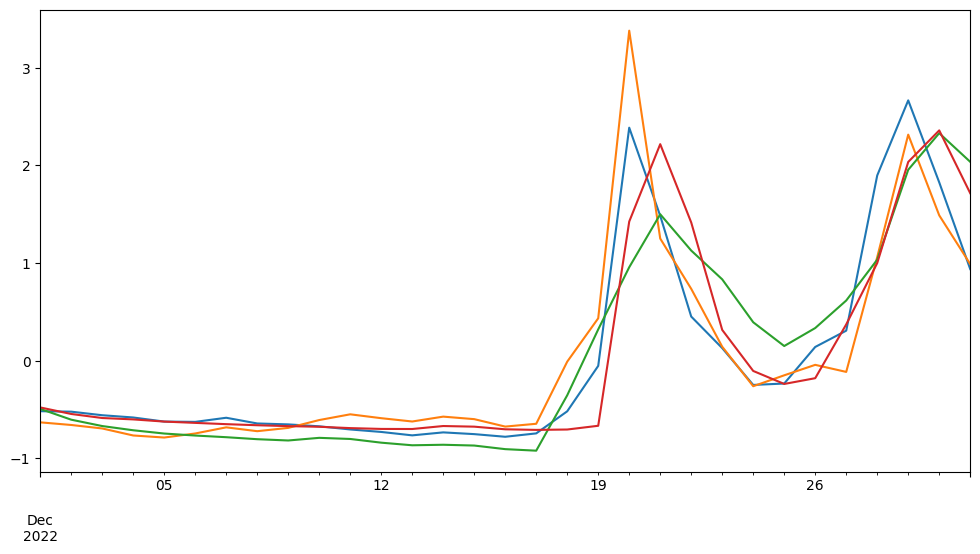

In [72]:
#1st method of scaling
df_scaled = (df-df.mean())/df.std(ddof=0)

#2nd method of scaling
df_scaled.T.loc[df_scaled.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))

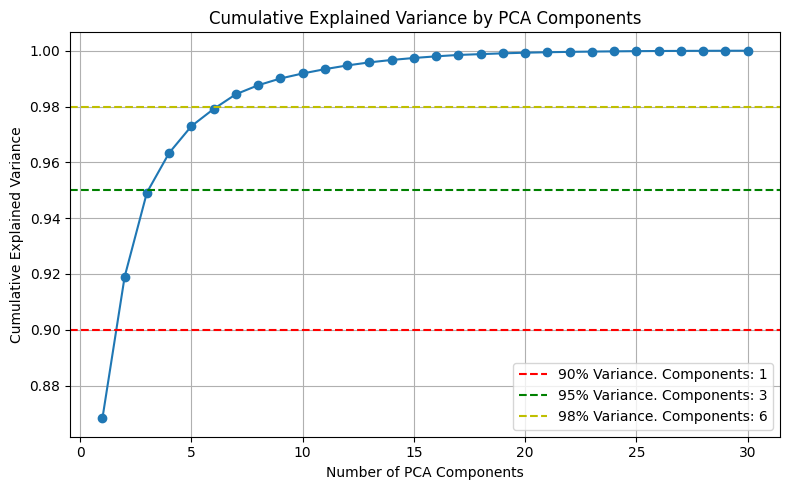

In [73]:
max_components = 30
pca_full = PCA(n_components=max_components) #remember to import PCA 
pca_full.fit(df_scaled)

explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, max_components + 1), cumulative_variance, marker='o')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of PCA Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.axhline(y=0.9, color='r', linestyle='--', label=f'90% Variance. Components: {sum(~(cumulative_variance > 0.90))}')
plt.axhline(y=0.95, color='g', linestyle='--', label=f'95% Variance. Components: {sum(~(cumulative_variance > 0.95))}')
plt.axhline(y=0.98, color='y', linestyle='--', label=f'98% Variance. Components: {sum(~(cumulative_variance > 0.98))}')
plt.legend()
plt.tight_layout()
plt.show()

In [74]:
pca = PCA(n_components=21)
pca_result = pca.fit_transform(df_scaled)
pca_result

array([[-8.43132667e+00, -3.96001605e-02,  1.25375531e-01,
        -3.07342517e-01, -2.54895703e+00, -3.27728718e+00,
        -2.13843221e-01, -5.10822585e-01,  1.75216788e+00,
         6.34778259e-01, -1.83344793e-01,  6.36961341e-01,
        -2.13283060e-01, -1.28876767e-01, -3.51759221e-01,
        -8.24634033e-01,  1.14344057e+00,  3.42946447e-01,
        -4.66608832e-01,  2.87076867e-01, -1.79862088e-01],
       [-9.42999741e+00, -3.73604543e-01,  5.15290591e-01,
        -6.32826456e-01, -3.02127845e+00, -2.71784038e+00,
        -5.15884741e-01, -2.61118293e-01,  1.47504552e+00,
         2.09931568e-01, -2.99924874e-03,  6.73213873e-01,
        -3.91203905e-02,  2.74678196e-01,  3.96241713e-01,
         4.30969306e-01, -4.21627262e-01, -2.55622452e-01,
         5.49538556e-01, -2.73099098e-01,  2.59685663e-01],
       [-1.02936174e+01, -5.49797287e-01,  6.80987016e-01,
        -6.37849353e-01, -2.44202525e+00, -2.21880572e+00,
        -2.39781917e-01, -1.54926734e-02,  5.14797960e

C:\Users\kscar\AppData\Local\Temp\ipykernel_53928\1787641122.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


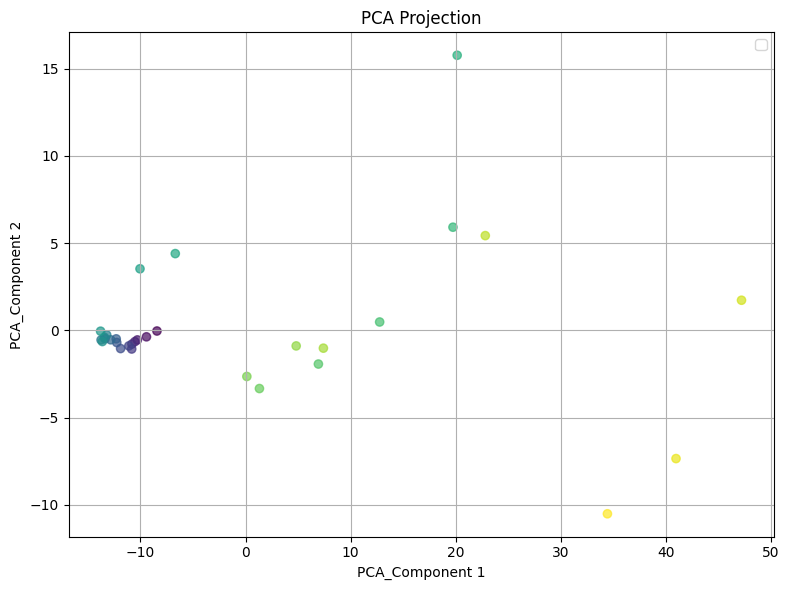

In [75]:
plt.figure(figsize=(8,6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df.index, alpha=0.7)
plt.title("PCA Projection")
plt.xlabel("PCA_Component 1")
plt.ylabel("PCA_Component 2")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


C:\Users\kscar\AppData\Local\Temp\ipykernel_53928\2567467783.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


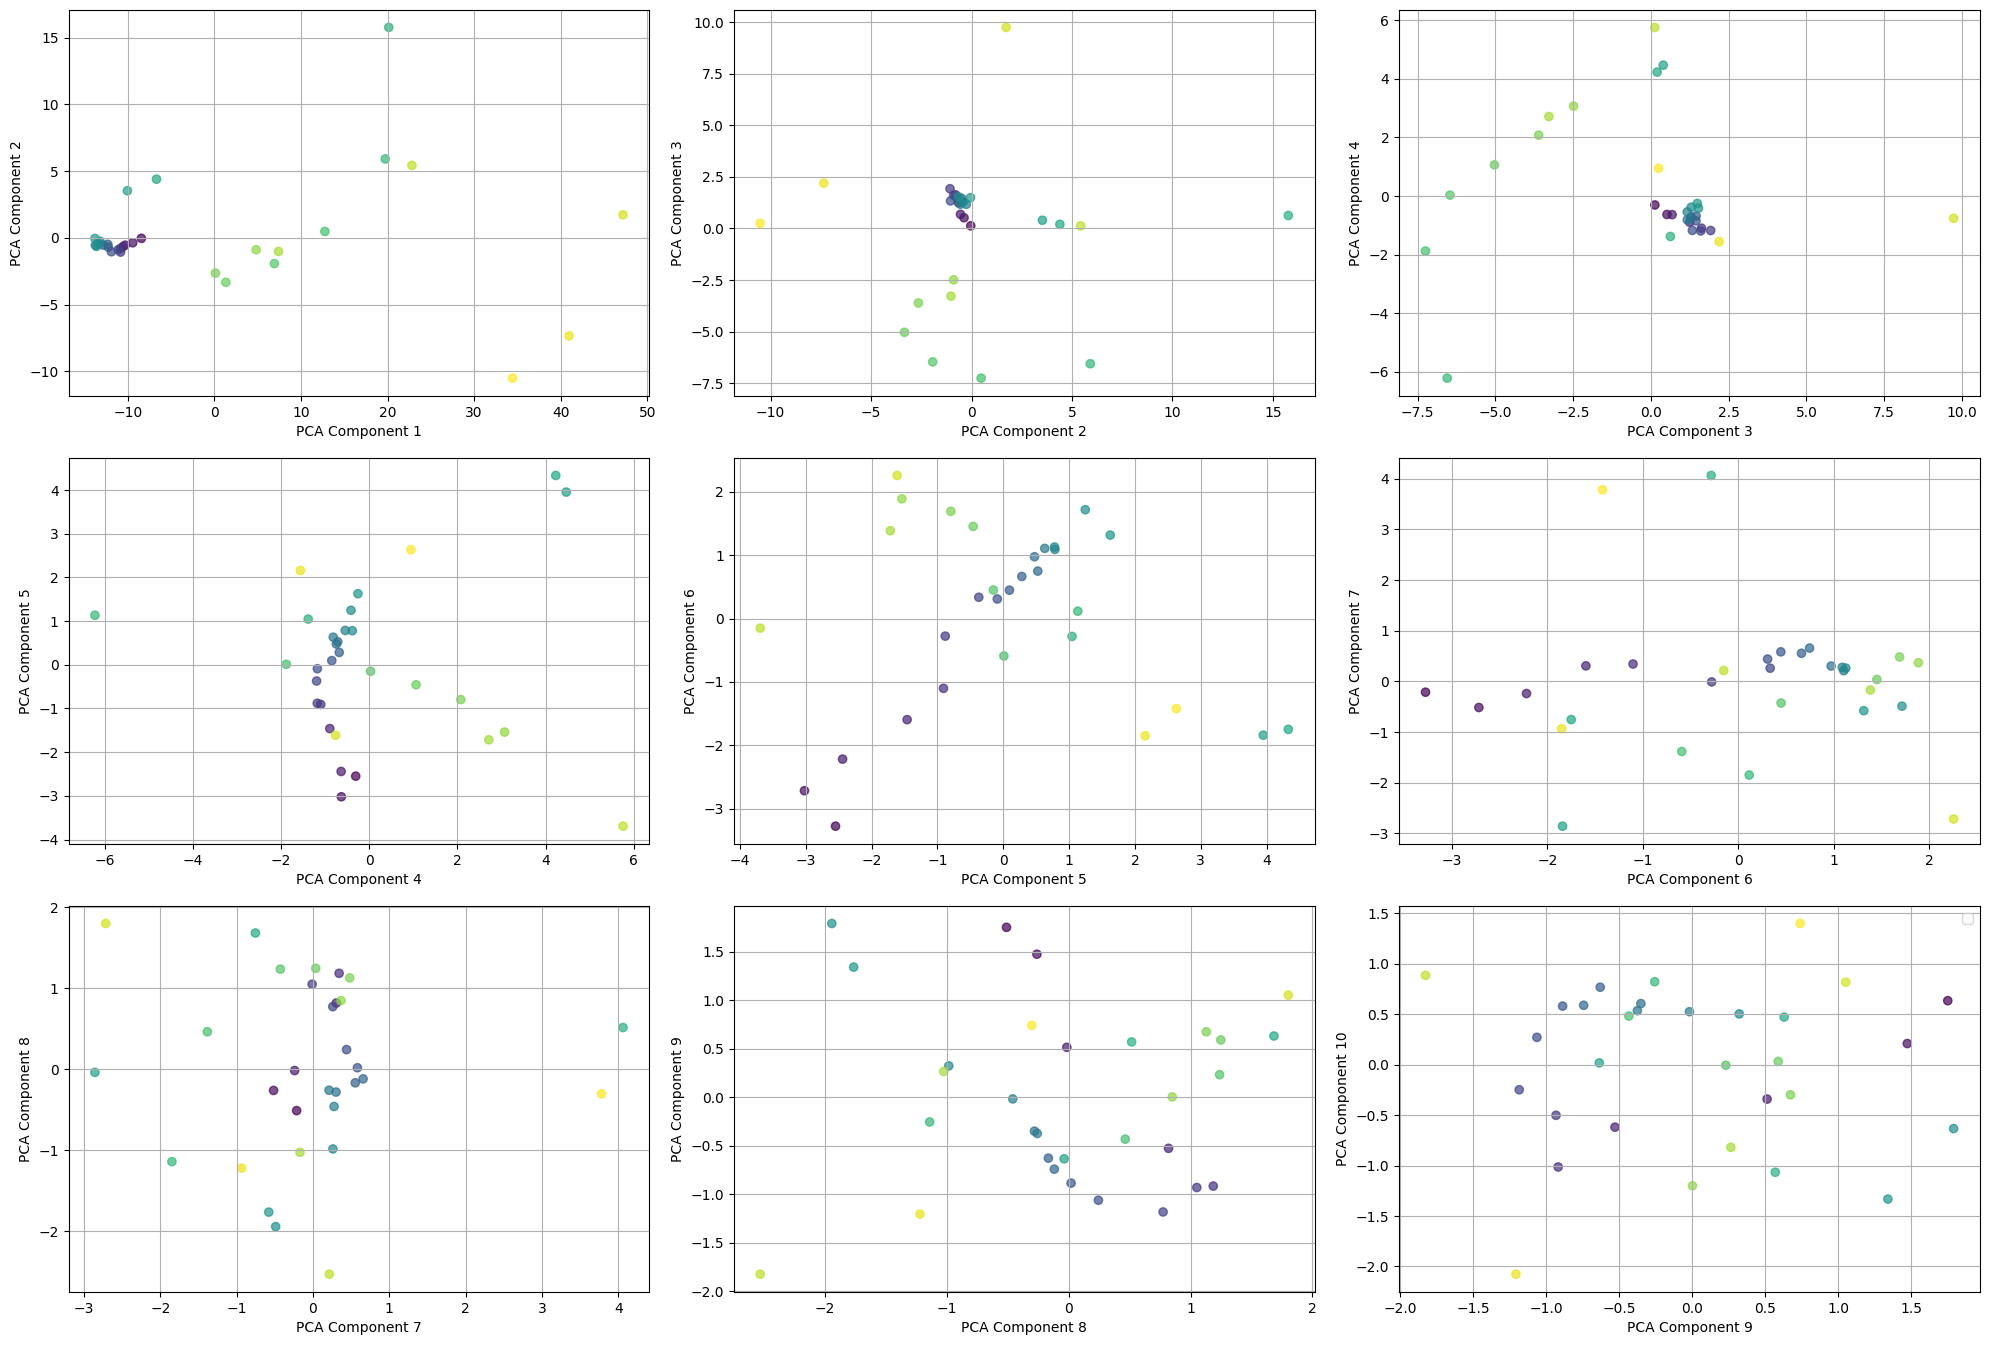

In [76]:
plt.figure(figsize=(20,40))
for i in range(9):
    plt.subplot(9, 3, i+1)
    plt.scatter(pca_result[:, i], pca_result[:, i+1], c=df.index, alpha=0.7)
    plt.xlabel(f"PCA Component {i+1}")
    plt.ylabel(f"PCA Component {i+2}")
    plt.grid(True)
    plt.tight_layout()
plt.legend()
plt.show()

In [78]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_result)

kmeans_silhouette = silhouette_score(pca_result, kmeans_labels)
kmeans_db_index = davies_bouldin_score(pca_result, kmeans_labels)
print(f"KMeans Silhouette Score is {kmeans_silhouette:.3f}")
print(f"KMeans Davies-Bouldin Index is {kmeans_db_index:.3f}")

KMeans Silhouette Score is 0.597
KMeans Davies-Bouldin Index is 0.669


<Axes: xlabel='k'>

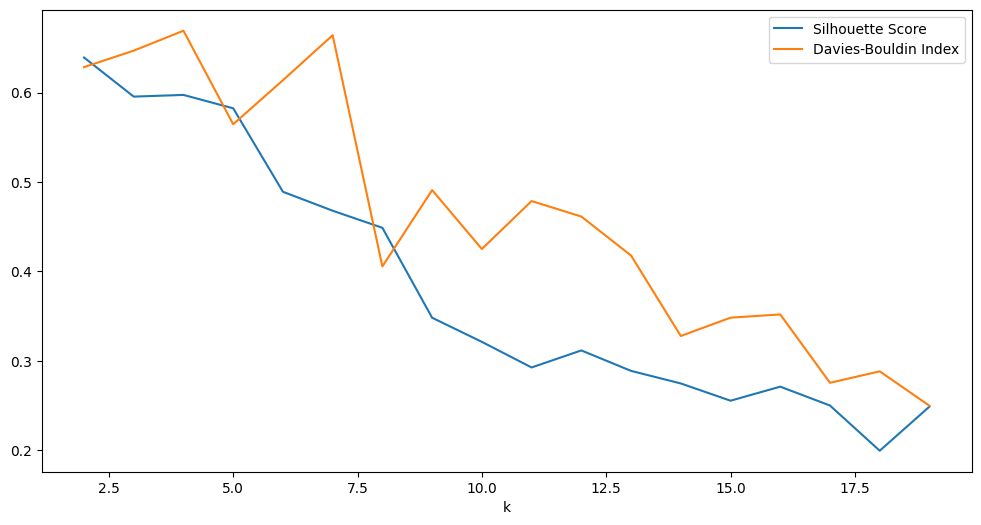

In [79]:
eval_results=[]

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(pca_result)

    db_index = davies_bouldin_score(pca_result, labels)
    silhouette = silhouette_score(pca_result, labels)

    eval_results.append({"k": k, "Silhouette Score":  silhouette, "Davies-Bouldin Index": db_index})
eval_df = pd.DataFrame(eval_results)
eval_df.plot(x="k", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.50            3         0     31               NaN   
1    0.76            3         0     31               NaN   
2    1.01            3         0     31               NaN   
3    1.27            3         1     27               NaN   
4    1.52            3         1     23               NaN   
5    1.78            3         1     23               NaN   
6    2.03            3         1     21               NaN   
7    2.29            3         1     21               NaN   
8    2.54            3         1     21               NaN   
9    2.80            3         1     17               NaN   
10   3.05            3         1     16               NaN   
11   3.31            3         1     16               NaN   
12   3.56            3         1     14               NaN   
13   3.82            3         1     14               NaN   
14   4.07            3         1     14               NaN   
15   4.33            3         1     14               NaN   
16   4.58            3         1     14               NaN   
17   4.84            3         1     14               NaN   
18   5.09            3         1     14               NaN   
19   5.35            3         1     14               NaN   
20   5.60            3         1     14               NaN   
21   5.86            3         1     14               NaN   
22   6.11            3         1     14               NaN   
23   6.37            3         2      9          0.458641   
24   6.62            3         2      9          0.458641   
25   6.88            3         2      9          0.458641   
26   7.13            3         2      9          0.458641   
27   7.39            3         2      8          0.481522   
28   7.64            3         2      8          0.481522   
29   7.90            3         2      8          0.481522   
30   8.15            3         2      8          0.481522   
31   8.41            3         2      8          0.481522   
32   8.66            3         2      8          0.481522   
33   8.92            3         2      8          0.481522   
34   9.17            3         2      8          0.481522   
35   9.43            3         2      6          0.565903   
36   9.68            3         2      6          0.565903   
37   9.94            3         2      6          0.565903   
38  10.19            3         2      6          0.565903   
39  10.45            3         2      6          0.565903   
40  10.70            3         2      6          0.565903   
41  10.96            3         2      5          0.571553   
42  11.21            3         2      5          0.571553   
43  11.47            3         2      5          0.571553   
44  11.72            3         2      5          0.571553   
45  11.98            3         1      5               NaN   
46  12.23            3         1      5               NaN   
47  12.49            3         1      5               NaN   
48  12.74            3         1      5               NaN   
49  13.00            3         1      5               NaN   

    Davies-Bouldin Index  
0                    NaN  
1                    NaN  
2                    NaN  
3                    NaN  
4                    NaN  
5                    NaN  
6                    NaN  
7                    NaN  
8                    NaN  
9                    NaN  
10                   NaN  
11                   NaN  
12                   NaN  
13                   NaN  
14                   NaN  
15                   NaN  
16                   NaN  
17                   NaN  
18                   NaN  
19                   NaN  
20                   NaN  
21                   NaN  
22                   NaN  
23              1.146440  
24              1.146440  
25              1.146440  
26              1.146440  
27              1.241083  
28              1.241083  
29              1.241083  
30              1.241083  
31              1.241083  
32 

<Axes: xlabel='eps'>

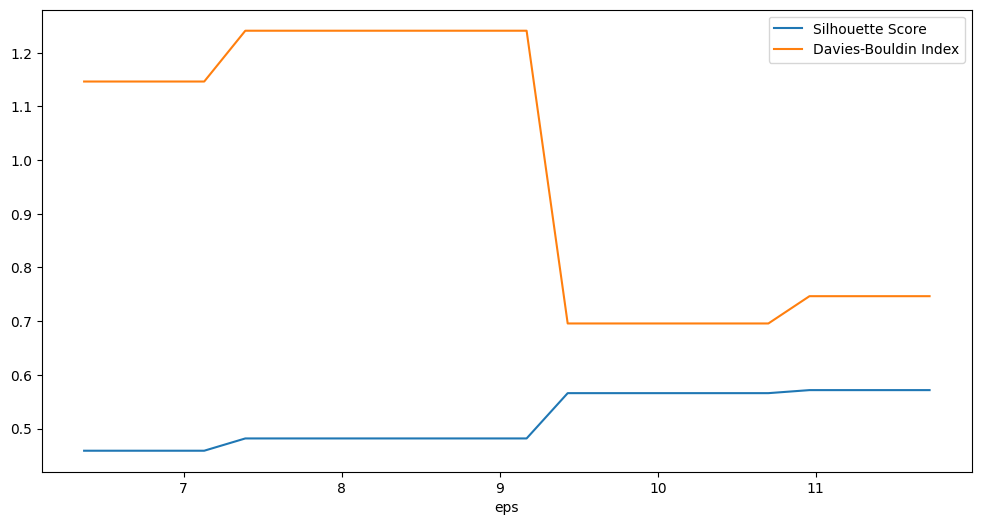

In [80]:
eps_values = np.linspace(0.5, 13.0, 50)
min_samples = 3

dbscan_results = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1:
        silhouette = silhouette_score(pca_result, labels)
        db_index = davies_bouldin_score(pca_result, labels)
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

dbscan_eval_df = pd.DataFrame(dbscan_results)
display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

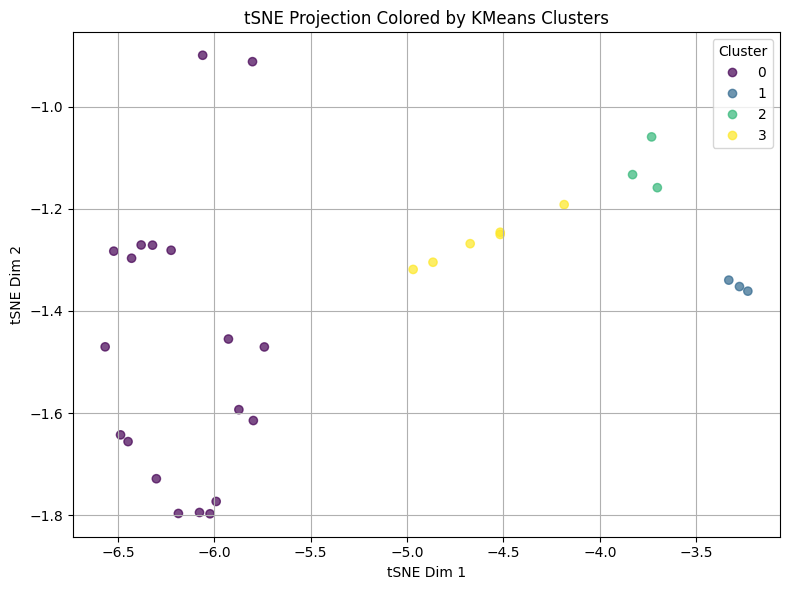

In [81]:
tSNE = TSNE(n_components=2, random_state=42, perplexity=22)
tSNE_result = tSNE.fit_transform(pca_result)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(tSNE_result[:, 0], tSNE_result[:,1], c=kmeans_labels, alpha=0.7)
plt.title("tSNE Projection Colored by KMeans Clusters")
plt.xlabel("tSNE Dim 1")
plt.ylabel("tSNE Dim 2")
plt.grid(True)
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.tight_layout()
plt.show()

### Technically Winter 2021

In [ ]:
df = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\discharge_table_complete_seasons.csv', index_col=0, parse_dates=True)
complete_seasons = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\complete_seasons.csv', index_col=0, dtype=str)

display(df.head())
display(df.info())

10000009  10000010  10000011  10000014  10000016  10000017  \
2001-01-01  1.002974  0.756018  0.649853  0.962598  0.625556       NaN   
2001-01-02  1.426323  0.899791  0.978229  1.186935  0.983393       NaN   
2001-01-03  2.759233  1.304584  1.882787  1.893259  1.558488       NaN   
2001-01-04  2.321638  1.142382  1.593618  1.661372  1.010999       NaN   
2001-01-05  2.050273  1.142149  1.865694  1.517573  1.099160       NaN   

            1000102  1000219  1000228  1000315  ...  9000173  9000293  \
2001-01-01      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-02      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-03      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-04      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-05      NaN      NaN      NaN      NaN  ...      NaN      NaN   

            9000451  9001110  season  season_year  22000047  24000034  \
2001-01-01      NaN      NaN       4         2000  0.841516       NaN   
2001-01-02      NaN      NaN       4         2000  0.952326       NaN   
2001-01-03      NaN      NaN       4         2000  0.986051       NaN   
2001-01-04      NaN      NaN       4         2000  0.896118       NaN   
2001-01-05      NaN      NaN       4         2000  0.891301       NaN   

            25000592  26000084  
2001-01-01       NaN       NaN  
2001-01-02       NaN       NaN  
2001-01-03       NaN       NaN  
2001-01-04       NaN       NaN  
2001-01-05       NaN       NaN  

[5 rows x 572 columns]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8035 entries, 2001-01-01 to 2022-12-31
Columns: 572 entries, 10000009 to 26000084
dtypes: float64(570), int64(2)
memory usage: 35.1 MB


None

In [ ]:
season = 4
season_year = 2021 # by definition of meteorological winter, this is winter 2021
season_key = f"{season_year}_{season}" 
cids = complete_seasons.loc[season_key].dropna().values
season_df = df[(df["season"] == season) & (df["season_year"] == season_year)]
#Sprint(season_df)
#print((season_df).columns)
season_df = season_df[cids] #this is where i lose dates
display(season_df.info())
season_df.to_csv("season_df.csv", index = True)
print(season_df)
print("season_df.csv")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 90 entries, 2021-12-01 to 2022-02-28
Columns: 348 entries, 10000009 to 9000451
dtypes: float64(348)
memory usage: 245.4 KB


None

            10000009  10000010  10000011  10000014  10000016  10000017  \
2021-12-01  1.928948  1.030860  1.953335  1.325431  0.734886  0.766920   
2021-12-02  1.796260  1.033130  3.206335  1.366118  0.776828  0.802402   
2021-12-03  1.634320  0.970354  1.639769  1.231012  0.641523  0.687935   
2021-12-04  1.543636  0.911631  1.167350  1.182046  0.643648  0.689733   
2021-12-05  1.669796  0.988806  1.376338  1.267309  0.742365  0.773247   
...              ...       ...       ...       ...       ...       ...   
2022-02-24  1.949857  1.379635  1.815340  1.778936  1.026726  1.214495   
2022-02-25  1.848504  1.260267  1.553090  1.627780  0.927669  1.089684   
2022-02-26  1.514385  1.101981  1.252561  1.421129  0.796245  0.924090   
2022-02-27  1.279953  1.035189  1.061757  1.292749  0.750868  0.866916   
2022-02-28  1.180189  1.005659  0.956588  1.213736  0.727019  0.836867   

             1000102   1000315  11000011  11000016  ...   66000034   67000017  \
2021-12-01  1.250828  1.192878

          2021-12-01  2021-12-02  2021-12-03  2021-12-04  2021-12-05  \
10000009    0.155507   -0.279391   -0.245268   -0.435086   -0.258206   
10000010   -0.575889   -0.807122   -0.848331   -0.857435   -0.714301   
10000011    0.175368    0.695727   -0.240319   -0.686546   -0.454750   
10000014   -0.335992   -0.576849   -0.611582   -0.676725   -0.527773   
10000016   -0.816928   -0.984364   -1.146999   -1.036519   -0.879355   
...              ...         ...         ...         ...         ...   
8000001     0.000963   -0.264320   -0.009889   -0.201640    0.056130   
9000015    -0.365301   -0.624625   -0.106179   -0.113434   -0.133200   
9000172     0.096185   -0.249603   -0.332416   -0.524874   -0.522258   
9000293    -0.038386   -0.172213    1.361304    1.393049    0.968547   
9000451    -0.681755   -1.157577   -1.097766   -0.681279   -0.513750   

          2021-12-06  2021-12-07  2021-12-08  2021-12-09  2021-12-10  ...  \
10000009    0.026437   -0.142511   -0.204561    0.107934  

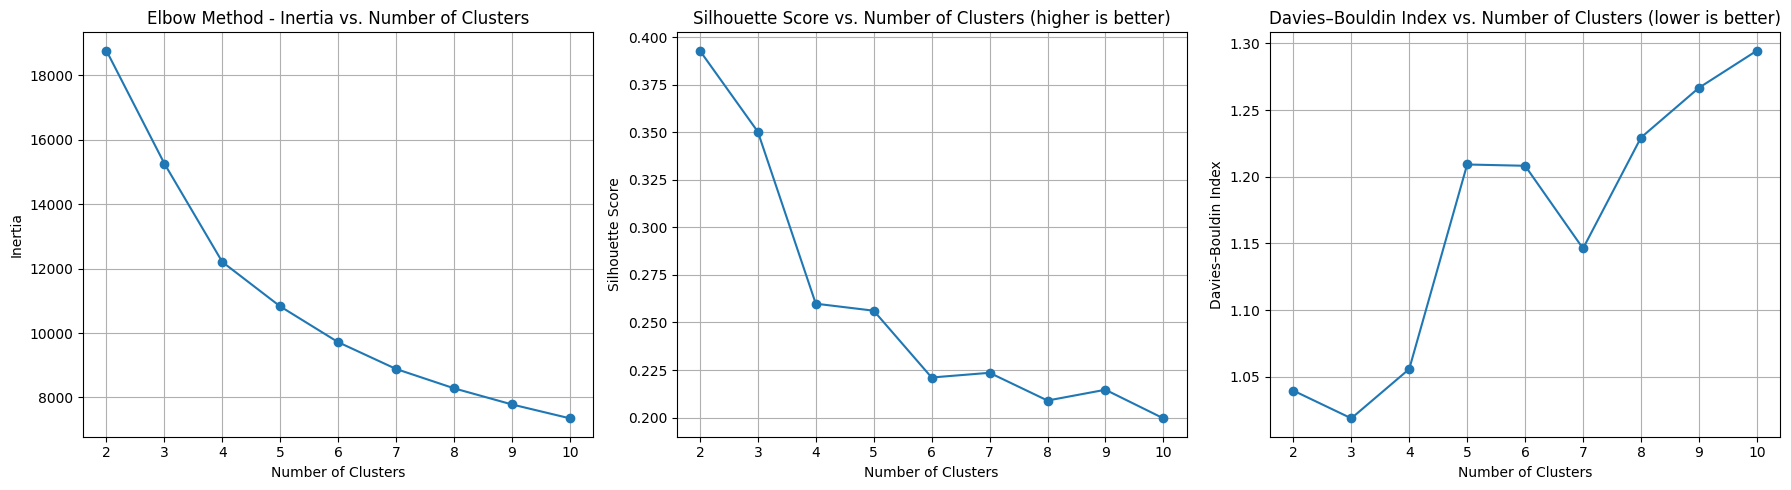

In [ ]:
# Transpose the data to have catchments as rows and days as features
data = season_df.T.copy()
#print("data is: " + {data})
# Normalize each catchment's time series
# scaler = StandardScaler()
# data_scaled = scaler.fit_transform(data)
data_scaled = (data - data.mean()) / data.std(ddof=0)
print(data_scaled)
# Try different numbers of clusters and calculate the inertia, silhouette, and Davies–Bouldin
inertias = []
silhouette_scores = []
dbi_scores = []  # Davies–Bouldin Index
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, labels))
    dbi_scores.append(davies_bouldin_score(data_scaled, labels))

# Plot elbow method (inertia)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot elbow method (inertia)
axes[0].plot(cluster_range, inertias, marker='o')
axes[0].set_title('Elbow Method - Inertia vs. Number of Clusters')
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('Inertia')
axes[0].grid(True)

# Plot silhouette score
axes[1].plot(cluster_range, silhouette_scores, marker='o')
axes[1].set_title('Silhouette Score vs. Number of Clusters (higher is better)')
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('Silhouette Score')
axes[1].grid(True)

# Plot Davies–Bouldin Index
axes[2].plot(cluster_range, dbi_scores, marker='o')
axes[2].set_title('Davies–Bouldin Index vs. Number of Clusters (lower is better)')
axes[2].set_xlabel('Number of Clusters')
axes[2].set_ylabel('Davies–Bouldin Index')
axes[2].grid(True)

plt.tight_layout()
plt.show()

Cluster
10000009        1
10000010        1
10000011        1
10000014        1
10000016        1

            10000009  10000010  10000011  10000014  10000016  10000017  \
2021-12-01  1.928948  1.030860  1.953335  1.325431  0.734886  0.766920   
2021-12-02  1.796260  1.033130  3.206335  1.366118  0.776828  0.802402   
2021-12-03  1.634320  0.970354  1.639769  1.231012  0.641523  0.687935   
2021-12-04  1.543636  0.911631  1.167350  1.182046  0.643648  0.689733   
2021-12-05  1.669796  0.988806  1.376338  1.267309  0.742365  0.773247   
...              ...       ...       ...       ...       ...       ...   
2022-02-24  1.949857  1.379635  1.815340  1.778936  1.026726  1.214495   
2022-02-25  1.848504  1.260267  1.553090  1.627780  0.927669  1.089684   
2022-02-26  1.514385  1.101981  1.252561  1.421129  0.796245  0.924090   
2022-02-27  1.279953  1.035189  1.061757  1.292749  0.750868  0.866916   
2022-02-28  1.180189  1.005659  0.956588  1.213736  0.727019  0.836867   

             1000102   1000315  11000011  11000016  ...   66000034   67000017  \
2021-12-01  1.250828  1.192878

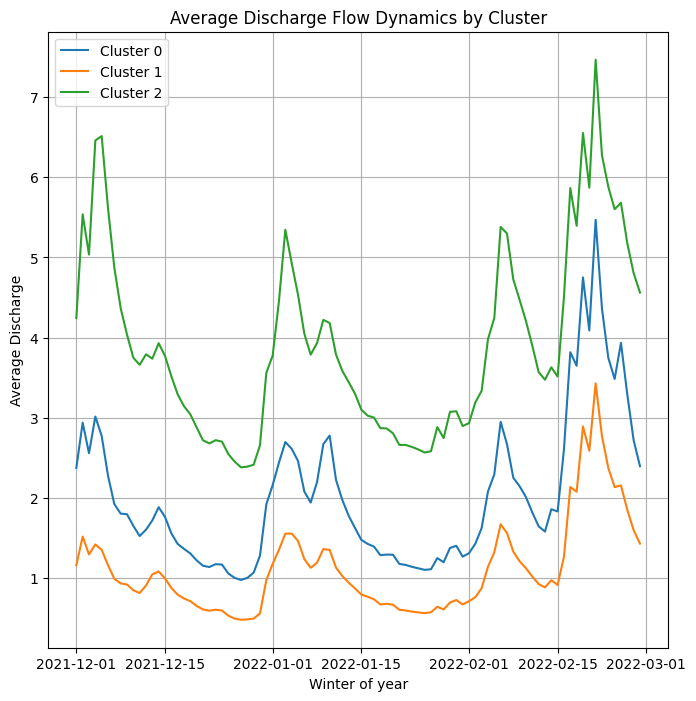

In [ ]:
kmeans_final = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_final = kmeans_final.fit_predict(data_scaled)

# Assign cluster labels to each catchment
clustered_data = pd.DataFrame(index=data.index)
clustered_data['Cluster'] = labels_final
# Show the first few rows of the clustered catchments
display(clustered_data.head())

# Prepare for visualization: average discharge pattern per cluster
cluster_means = season_df.T.copy()
print(season_df.copy())
cluster_means['Cluster'] = labels_final
cluster_avg = cluster_means.groupby('Cluster').mean().T

# Plot the average discharge flow over the seaason for each cluster
plt.figure(figsize=(8, 8))
for cluster in cluster_avg.columns:
    plt.plot(cluster_avg.index, cluster_avg[cluster], label=f'Cluster {cluster}')
plt.title('Average Discharge Flow Dynamics by Cluster')
plt.xlabel('Winter of year')
plt.ylabel('Average Discharge')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from pathlib import Path

out_path = Path(r'C:\Users\kscar\Documents\Github\02807_Project\output\season_clustering')
out_path.mkdir(parents=True, exist_ok=True)
pd.DataFrame(labels_final, index=data.index, columns=['Cluster']).to_csv(out_path / f'KMeans_clustering_season_{str(season)}_seasonYear_{str(season_year)}.csv', index=True)

In [ ]:
df = pd.read_csv("season_df.csv", index_col=0, parse_dates=True)
df

10000009  10000010  10000011  10000014  10000016  10000017  \
2021-12-01  1.928948  1.030860  1.953335  1.325431  0.734886  0.766920   
2021-12-02  1.796260  1.033130  3.206335  1.366118  0.776828  0.802402   
2021-12-03  1.634320  0.970354  1.639769  1.231012  0.641523  0.687935   
2021-12-04  1.543636  0.911631  1.167350  1.182046  0.643648  0.689733   
2021-12-05  1.669796  0.988806  1.376338  1.267309  0.742365  0.773247   
...              ...       ...       ...       ...       ...       ...   
2022-02-24  1.949857  1.379635  1.815340  1.778936  1.026726  1.214495   
2022-02-25  1.848504  1.260267  1.553090  1.627780  0.927669  1.089684   
2022-02-26  1.514385  1.101981  1.252561  1.421129  0.796245  0.924090   
2022-02-27  1.279953  1.035189  1.061757  1.292749  0.750868  0.866916   
2022-02-28  1.180189  1.005659  0.956588  1.213736  0.727019  0.836867   

             1000102   1000315  11000011  11000016  ...   66000034   67000017  \
2021-12-01  1.250828  1.192878  1.358018  1.693993  ...   3.104174   4.147723   
2021-12-02  1.168013  1.120893  1.404086  1.909746  ...   6.322463   9.462895   
2021-12-03  1.115942  1.075631  1.485400  1.965930  ...   4.437461   7.547864   
2021-12-04  1.084381  1.048198  1.590201  2.209178  ...   7.557746   9.560768   
2021-12-05  1.101003  1.062646  1.672648  2.353239  ...  10.246450  12.170390   
...              ...       ...       ...       ...  ...        ...        ...   
2022-02-24  2.116976  1.945755  2.891755  3.187126  ...   2.389067   2.996490   
2022-02-25  1.821831  1.689207  2.920767  2.894182  ...   1.890383   2.399317   
2022-02-26  1.325430  1.257723  2.881222  2.457111  ...   1.445397   1.946775   
2022-02-27  1.118475  1.077833  2.785020  2.180007  ...   1.200180   1.650168   
2022-02-28  0.961915  0.941747  2.674545  1.989429  ...   1.073096   1.469682   

             67000019   7000003   7000333   8000001   9000015   9000172  \
2021-12-01   5.387238  1.332887  1.139284  1.739181  1.289443  1.856105   
2021-12-02  11.592951  1.069387  1.250300  1.818053  1.297032  1.839335   
2021-12-03   9.645351  1.236809  1.266468  1.893470  1.787455  1.538371   
2021-12-04  14.959752  1.292988  1.160760  1.892968  2.024959  1.409278   
2021-12-05  15.566713  1.362794  1.202051  2.139127  1.856441  1.275543   
...               ...       ...       ...       ...       ...       ...   
2022-02-24   4.774474  3.410220  1.571399  3.277485  3.910094  1.798619   
2022-02-25   4.006872  3.084911  1.400696  2.884487  3.919293  1.589647   
2022-02-26   3.094948  2.655577  1.186617  2.381022  3.425093  1.344564   
2022-02-27   2.445914  2.276428  1.082096  2.034332  2.307460  1.219551   
2022-02-28   2.007492  2.000565  1.015441  1.813290  2.085146  1.141207   

             9000293   9000451  
2021-12-01  1.690865  0.900866  
2021-12-02  1.951245  0.526353  
2021-12-03  3.403140  0.695728  
2021-12-04  4.279274  1.175232  
2021-12-05  3.501445  1.288245  
...              ...       ...  
2022-02-24  2.340231  2.337913  
2022-02-25  2.184952  2.250883  
2022-02-26  2.056211  2.007127  
2022-02-27  1.971703  1.775796  
2022-02-28  1.878374  1.561882  

[90 rows x 348 columns]

<Axes: >

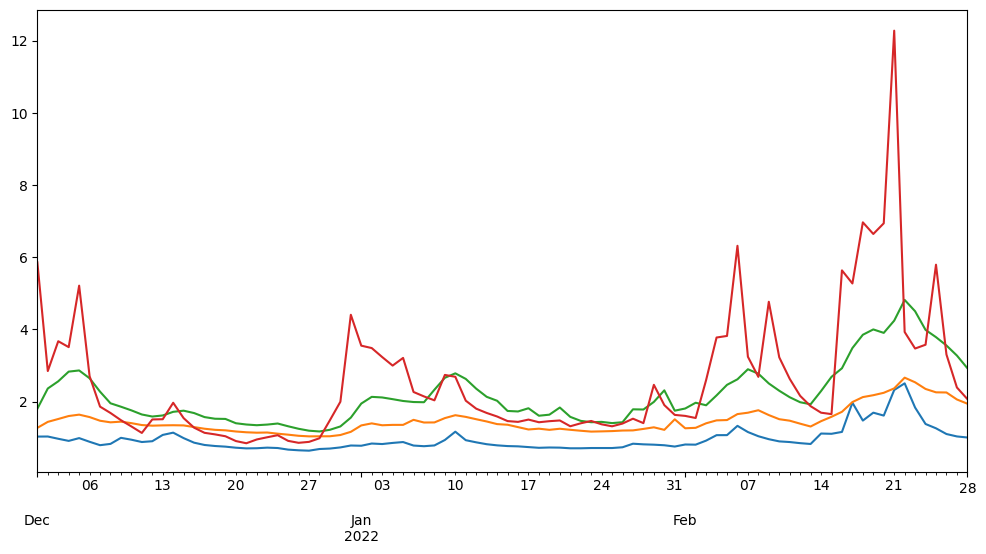

In [ ]:
df.T.loc[df.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))


<Axes: >

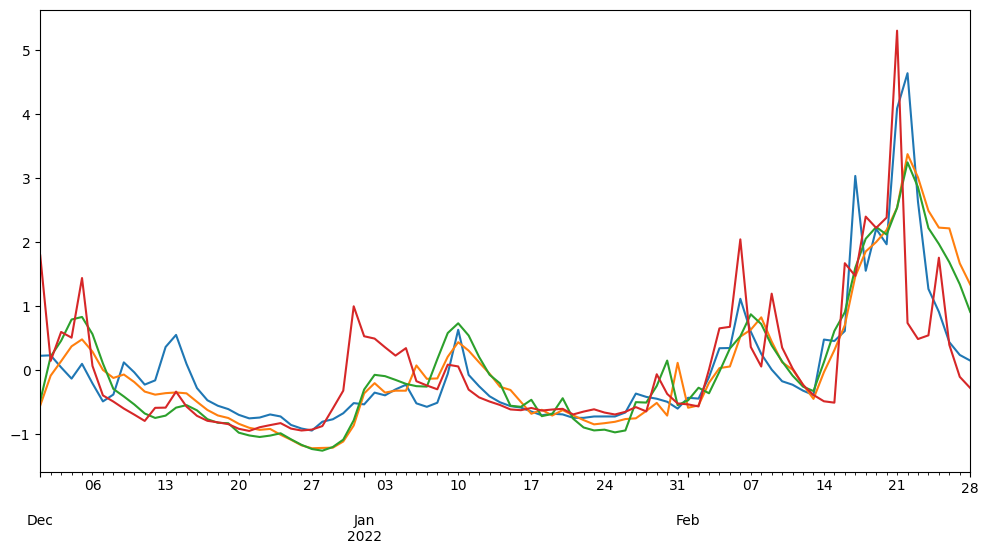

In [ ]:
#1st method of scaling
df_scaled = (df-df.mean())/df.std(ddof=0)

#2nd method of scaling
df_scaled.T.loc[df_scaled.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))

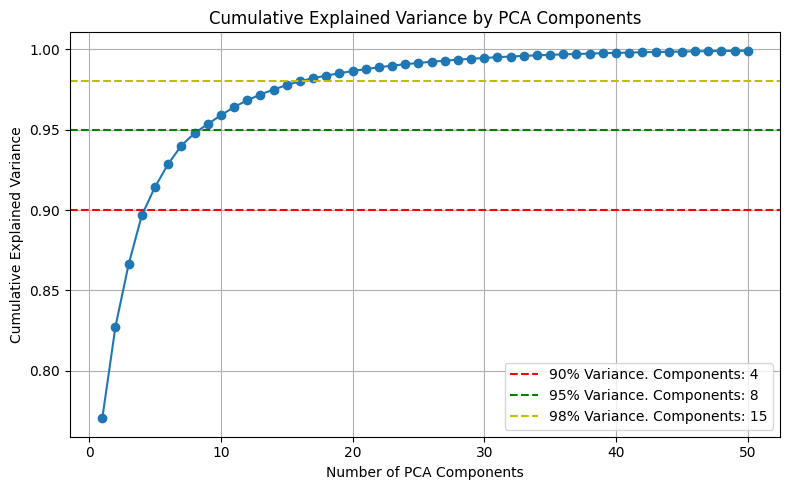

In [ ]:
max_components = 50
pca_full = PCA(n_components=max_components) #remember to import PCA 
pca_full.fit(df_scaled)

explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, max_components + 1), cumulative_variance, marker='o')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of PCA Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.axhline(y=0.9, color='r', linestyle='--', label=f'90% Variance. Components: {sum(~(cumulative_variance > 0.90))}')
plt.axhline(y=0.95, color='g', linestyle='--', label=f'95% Variance. Components: {sum(~(cumulative_variance > 0.95))}')
plt.axhline(y=0.98, color='y', linestyle='--', label=f'98% Variance. Components: {sum(~(cumulative_variance > 0.98))}')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
pca = PCA(n_components=21)
pca_result = pca.fit_transform(df_scaled)
pca_result

array([[  1.56562438, -11.10396867,   2.83673941, ...,   1.02093879,
         -0.53827385,  -0.04904564],
       [ 11.95445016, -11.07531282,   9.74186782, ...,   0.16124715,
          0.56575256,  -0.30970277],
       [  6.16041681,  -5.53430017,   7.3720552 , ...,   0.0476066 ,
          1.98492916,  -0.02519981],
       ...,
       [ 23.53464859,  12.08633544,   1.41206347, ...,   1.13467761,
         -0.17562278,  -0.16484598],
       [ 15.37144714,  12.83305053,   0.62295447, ...,   0.28258085,
          0.18423194,  -0.80920396],
       [ 10.29019422,  12.03531505,  -0.29585451, ...,   1.16669954,
          0.64918433,  -1.48089709]], shape=(90, 21))

C:\Users\kscar\AppData\Local\Temp\ipykernel_36444\1787641122.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


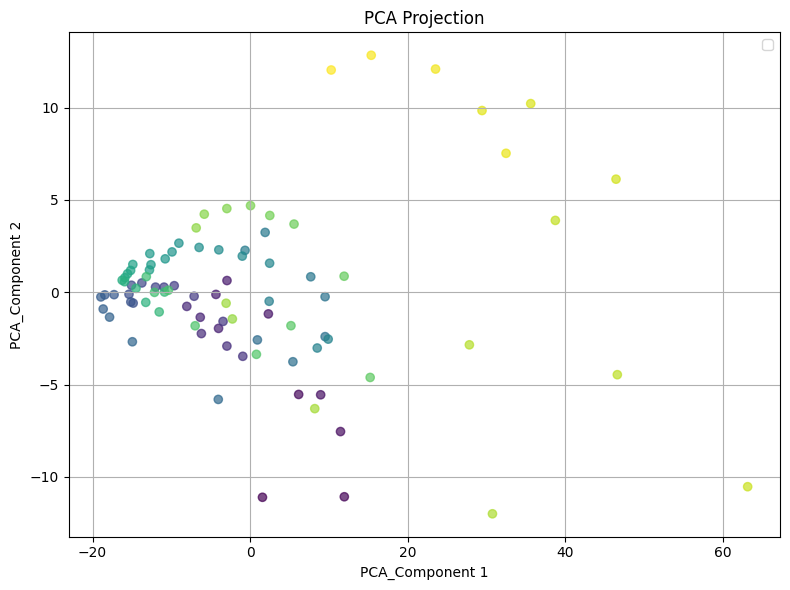

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df.index, alpha=0.7)
plt.title("PCA Projection")
plt.xlabel("PCA_Component 1")
plt.ylabel("PCA_Component 2")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


C:\Users\kscar\AppData\Local\Temp\ipykernel_36444\2567467783.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


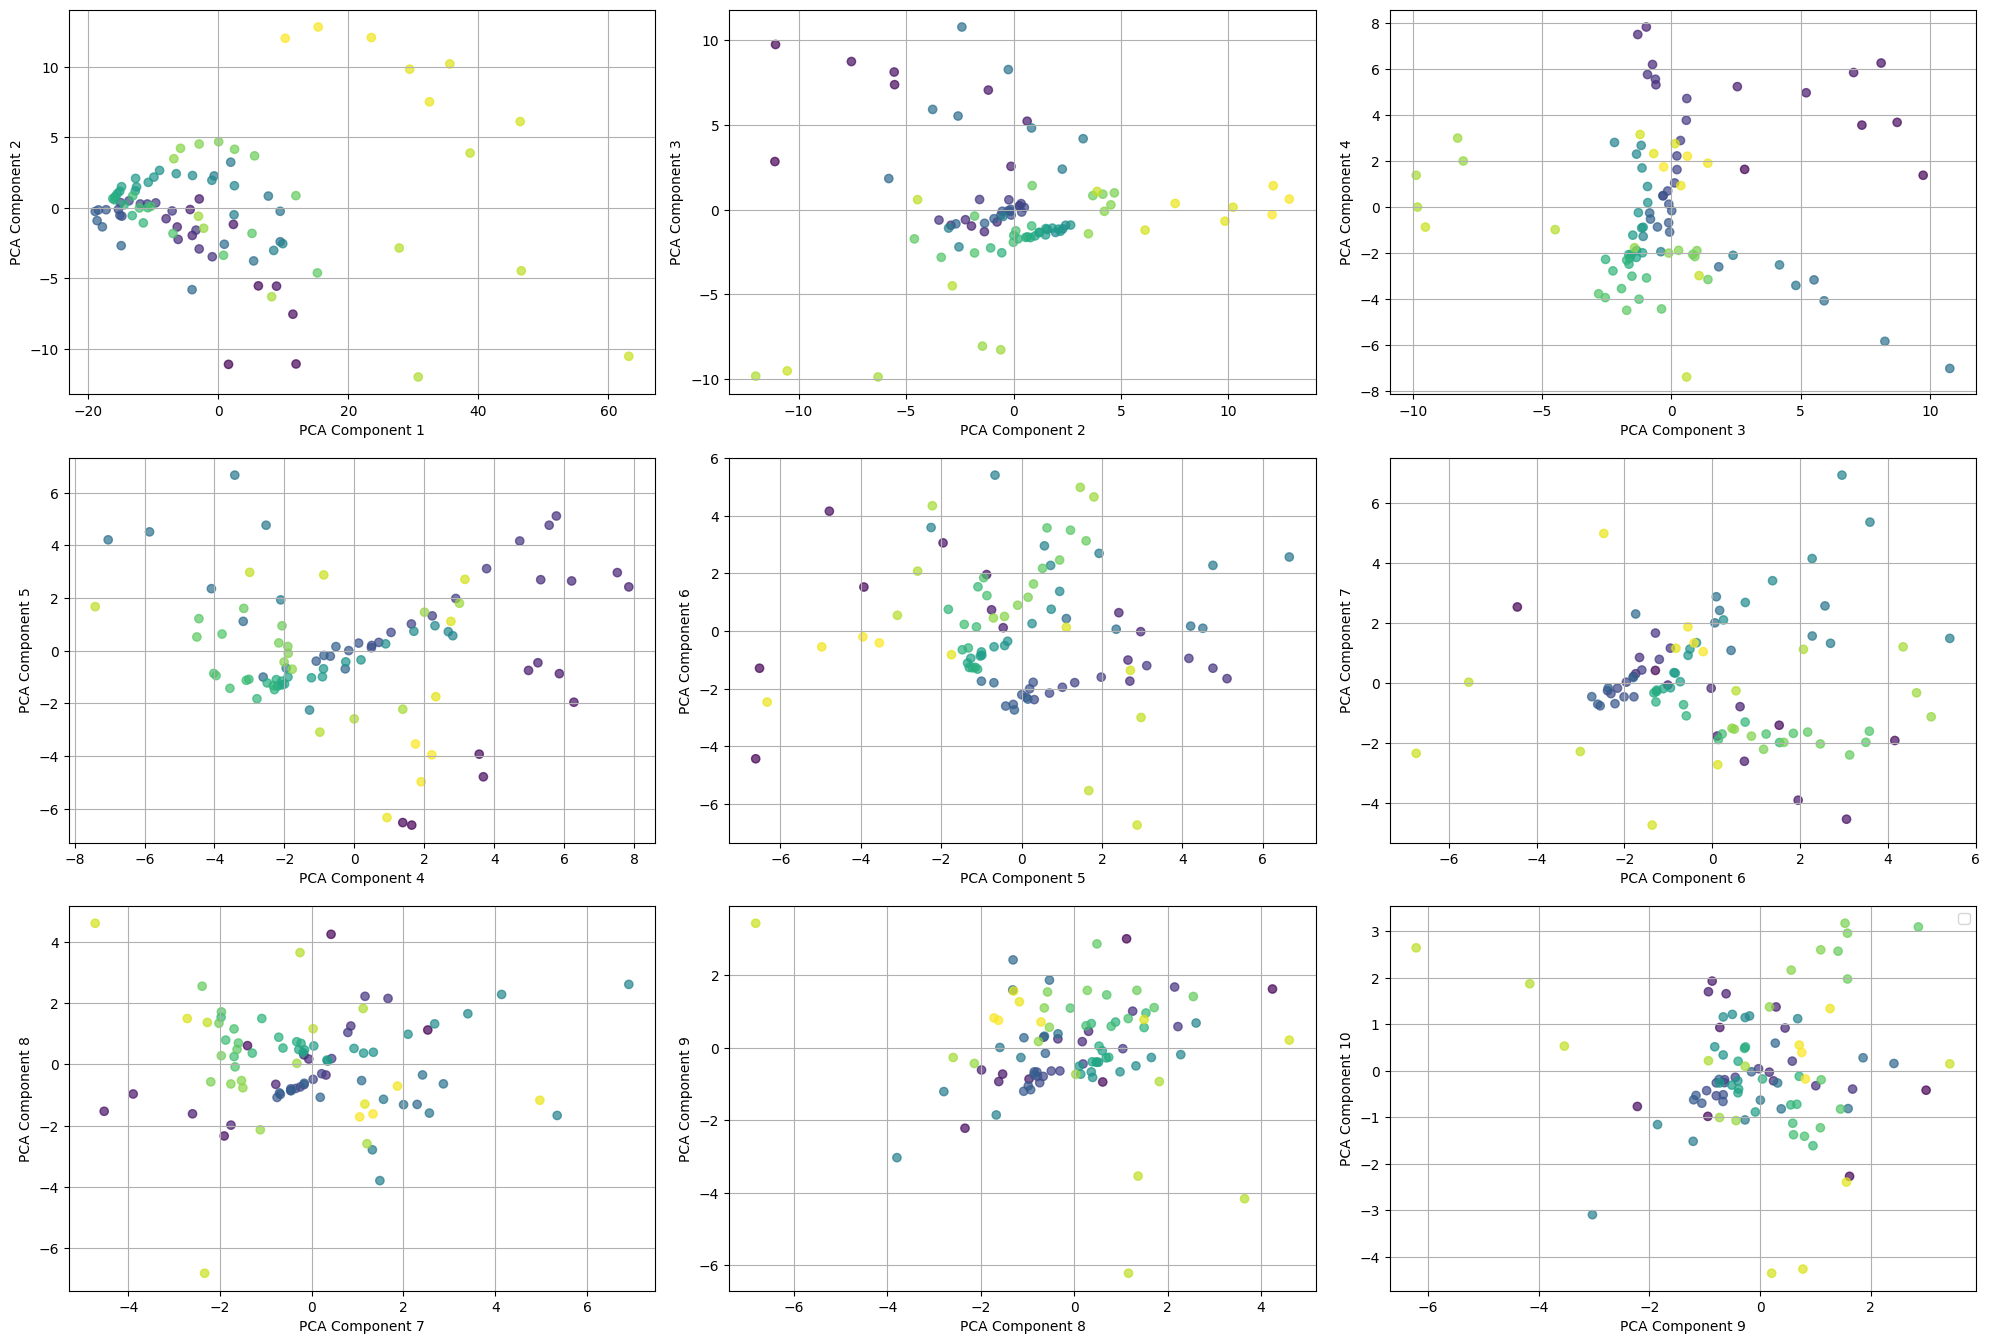

In [ ]:
plt.figure(figsize=(20,40))
for i in range(9):
    plt.subplot(9, 3, i+1)
    plt.scatter(pca_result[:, i], pca_result[:, i+1], c=df.index, alpha=0.7)
    plt.xlabel(f"PCA Component {i+1}")
    plt.ylabel(f"PCA Component {i+2}")
    plt.grid(True)
    plt.tight_layout()
plt.legend()
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_result)

kmeans_silhouette = silhouette_score(pca_result, kmeans_labels)
kmeans_db_index = davies_bouldin_score(pca_result, kmeans_labels)
print(f"KMeans Silhouette Score is {kmeans_silhouette:.3f}")
print(f"KMeans Davies-Bouldin Index is {kmeans_db_index:.3f}")

KMeans Silhouette Score is 0.363
KMeans Davies-Bouldin Index is 1.405


<Axes: xlabel='k'>

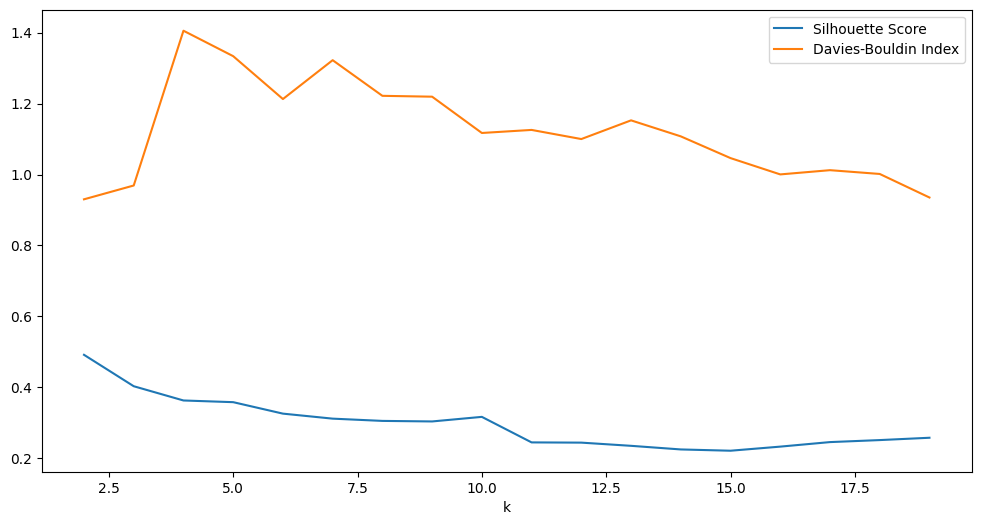

In [ ]:
eval_results=[]

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(pca_result)

    db_index = davies_bouldin_score(pca_result, labels)
    silhouette = silhouette_score(pca_result, labels)

    eval_results.append({"k": k, "Silhouette Score":  silhouette, "Davies-Bouldin Index": db_index})
eval_df = pd.DataFrame(eval_results)
eval_df.plot(x="k", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.50            3         0     90               NaN   
1    0.76            3         0     90               NaN   
2    1.01            3         2     84         -0.164364   
3    1.27            3         2     80         -0.101229   
4    1.52            3         3     77         -0.058780   
5    1.78            3         3     74         -0.019312   
6    2.03            3         6     65         -0.027219   
7    2.29            3         5     65         -0.034729   
8    2.54            3         2     64          0.036054   
9    2.80            3         3     60          0.053057   
10   3.05            3         3     59          0.058668   
11   3.31            3         5     50          0.015213   
12   3.56            3         5     46          0.005516   
13   3.82            3         4     45          0.037162   
14   4.07            3         4     43          0.043900   
15   4.33            3         5     39          0.052879   
16   4.58            3         4     39          0.034764   
17   4.84            3         2     38          0.129103   
18   5.09            3         2     38          0.129103   
19   5.35            3         2     38          0.129103   
20   5.60            3         1     38               NaN   
21   5.86            3         1     38               NaN   
22   6.11            3         1     38               NaN   
23   6.37            3         1     36               NaN   
24   6.62            3         2     32          0.263931   
25   6.88            3         2     32          0.263931   
26   7.13            3         2     29          0.228780   
27   7.39            3         2     29          0.228780   
28   7.64            3         2     26          0.216733   
29   7.90            3         2     26          0.216733   
30   8.15            3         2     24          0.229056   
31   8.41            3         1     23               NaN   
32   8.66            3         1     22               NaN   
33   8.92            3         1     19               NaN   
34   9.17            3         2     16          0.353574   
35   9.43            3         2     14          0.353802   
36   9.68            3         2     14          0.353802   
37   9.94            3         2     11          0.442039   
38  10.19            3         2     11          0.442039   
39  10.45            3         2     11          0.442039   
40  10.70            3         2     11          0.442039   
41  10.96            3         2     11          0.442039   
42  11.21            3         2      9          0.467460   
43  11.47            3         2      9          0.467460   
44  11.72            3         2      9          0.467460   
45  11.98            3         2      9          0.467460   
46  12.23            3         2      8          0.468018   
47  12.49            3         2      8          0.468018   
48  12.74            3         2      7          0.483668   
49  13.00            3         2      7          0.483668   

    Davies-Bouldin Index  
0                    NaN  
1                    NaN  
2               0.973283  
3               0.954922  
4               0.881478  
5               0.864200  
6               0.932537  
7               0.938126  
8               1.104891  
9               1.040846  
10              1.054456  
11              1.179439  
12              1.339918  
13              1.342353  
14              1.387409  
15              1.317416  
16              1.568409  
17              1.240925  
18              1.240925  
19              1.240925  
20                   NaN  
21                   NaN  
22                   NaN  
23                   NaN  
24              1.471287  
25              1.471287  
26              1.503375  
27              1.503375  
28              1.458080  
29              1.458080  
30              1.364975  
31                   NaN  
32 

<Axes: xlabel='eps'>

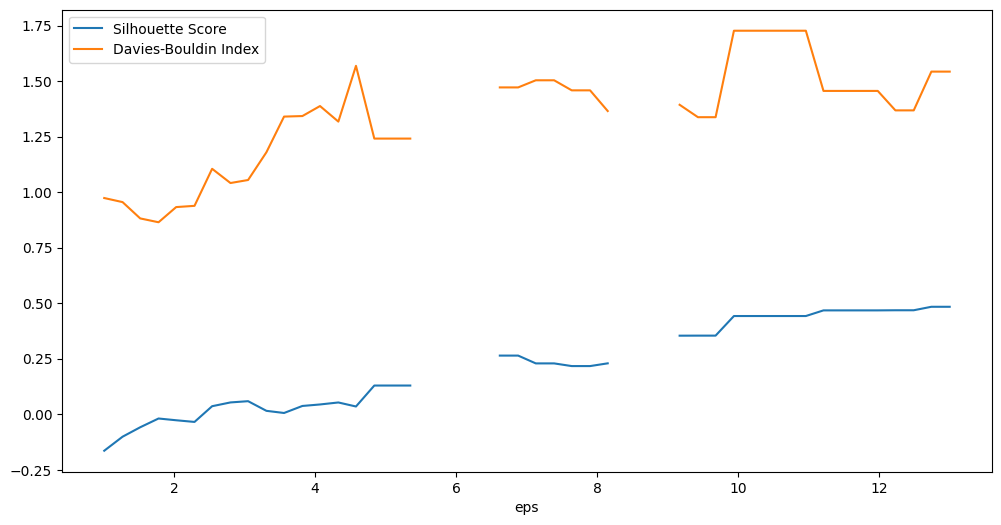

In [ ]:
eps_values = np.linspace(0.5, 13.0, 50)
min_samples = 3

dbscan_results = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1:
        silhouette = silhouette_score(pca_result, labels)
        db_index = davies_bouldin_score(pca_result, labels)
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

dbscan_eval_df = pd.DataFrame(dbscan_results)
display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

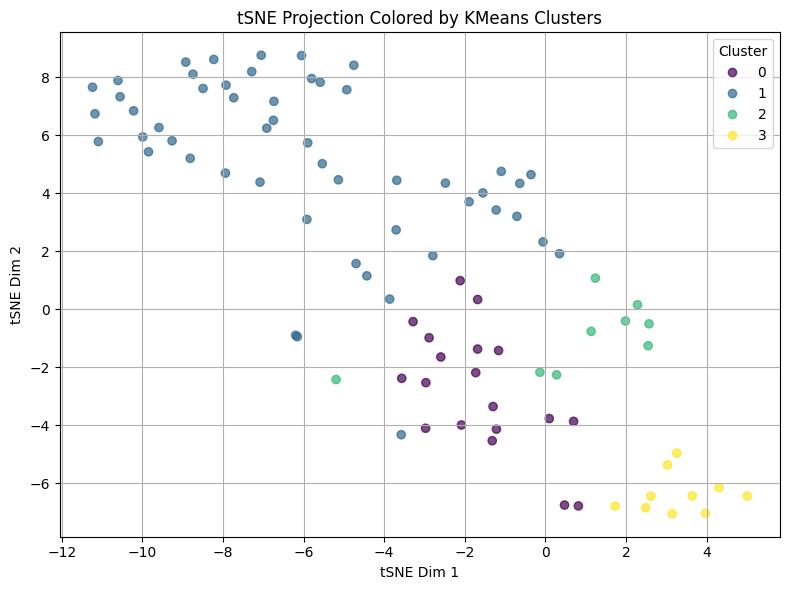

In [ ]:
tSNE = TSNE(n_components=2, random_state=42, perplexity=22)
tSNE_result = tSNE.fit_transform(pca_result)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(tSNE_result[:, 0], tSNE_result[:,1], c=kmeans_labels, alpha=0.7)
plt.title("tSNE Projection Colored by KMeans Clusters")
plt.xlabel("tSNE Dim 1")
plt.ylabel("tSNE Dim 2")
plt.grid(True)
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.tight_layout()
plt.show()

In [ ]:
#For dbscan spatial plotting

data = season_df.T.copy()
data_scaled = (data - data.mean()) / data.std(ddof=0)

pca = PCA(n_components=5)
pca_result = pca.fit_transform(data_scaled)

obs_ids = data.index

eps_values = np.linspace(0.05, 1.0, 200)
min_samples = 2

dbscan_results = []

#addtions
dbscan_lavels = None
best_eps = None
best_silhouette = -999

#x = pca_result.values

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1 and n_noise < len(labels):
        mask = labels != -1
        silhouette = silhouette_score(pca_result[mask], labels[mask])
        db_index = davies_bouldin_score(pca_result[mask], labels[mask])
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

    if silhouette is not None and silhouette > best_silhouette:
        best_silhouette = silhouette
        best_labels = labels.copy()
        best_eps = eps

#saving for dbscan for spatial plotting
dbscan_eval_df = pd.DataFrame(dbscan_results)
dbscan_eval_df.to_csv(out_path / f"DBSCAN_Scores_season{str(season)}_seasonYear_{str(season_year)}.csv", index=False)

# print(f"eps={eps:.2f}, clusters={n_clusters}, noise={n_noise}")
# print("obs_ids length:", len(obs_ids))
# print("best_labels length:", len(best_labels))
# print("pca_result rows:", pca_result.shape[0])
# print("data_scaled rows:", data_scaled.shape[0])
# print("season_df.T rows:", season_df.T.shape[0])

# print("NaNs in data:", data.isna().sum().sum())
# print("NaNs in data_scaled:", data_scaled.isna().sum().sum())

#Use this file here 
dbscan_labels_df = pd.DataFrame({
    "obsstednr": obs_ids, #pca_result.index.to_list(), 
    "Cluster":best_labels,
    "eps_used": best_eps,
    "min_samples": min_samples})
dbscan_labels_df.to_csv(out_path / f"DBSCAN_Cluster_labels_season_{str(season)}_seasonYear{str(season_year)}.csv", index=False)
# from pathlib import Path



display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))